# CAR VALUATION SYSTEM PROJECT

## BUSINESS UNDERSTANDING

### Project Overview
The Car Valuation System aims to develop a data-driven model that accurately estimates or predicts the market value of used cars based on various features such as make, model, age, mileage, fuel type, and more. By applying data science and  machine learning techniques, the system will provide a solution for determining the value of used cars, which is valuable for sellers, buyers, car dealerships, and financial institutions.

### Business Problem
The primary goal of this project is to develop a strong reliable predictive model for car valuation that the stakeholders can trust for accurate pricing estimates, thereby reducing uncertainties and developing informed decision-making.
The price of used cars is influenced by several factors including car's age, condition, location, and demand for specific models. This can create challenges for stakeholders in that:
- Buyers: They may overpay for a car due to lack of enough information about its true market value.
- Sellers: They may price their vehicles too low, leading to loss of potential profit.
- Dealerships: They need an efficient way to assess car values for pricing and providing fair trade-in offers.
- Financial Institutions: They rely on accurate car valuations for loan approvals and insurance policies.

### Project Objectives
- Build a predictive model that inputs various car features and returns an estimated market price.
- Include data from different cities to ensure the model accounts for different regional pricing variations.
- Evaluate and validate the model using standard regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) score to ensure the accuracy and reliability of the predictions.
- Provide recommendations for businesses for price optimization and market strategies.
- Deploy the model in a user-friendly platform (e.g., web application) where users can receive real-time car price estimations.

### Stakeholders
- **Individual Sellers**: People who wish to sell their used cars and need an estimate of their vehicle’s worth.
- **Car Buyers**: People looking to purchase used cars who need to know if the listed price is fair.
- **Car Dealerships**: Businesses that need a reliable tool for pricing to maintain profitability and customer satisfaction.
- **Financial Institutions and Insurance Companies**: Organizations that provide car loans or insurance policies and require accurate car  
valuations for underwriting and risk assessment.
- **Online Car Marketplaces**: Platforms that list used cars and could use the system to display fair price estimates for users.

## DATA UNDERSTANDING

### Data Overview
We aim to build this System by utilizing a dataset that comprises of car data from various regions and cities in India like Ahmedabad, Bangalore, Chennai, Gurgaon, Hyderabad, Jaipur, Kolkata, Mumbai, and Pune.

### Data Sources and Collection
The data used for this car valuation system project was sourced from Cardekho(http://Cardekho.com), a leading automotive website that provides detailed information on car listings, specifications, pricing, and more.
Web scraping was done in observance with the site's terms of service, and the data was structured into a CSV file for easy access and manipulation.


### Data Description
The dataset contains the following features:

- `Brand`: The manufacturer or brand of the vehicle (e.g., Toyota, Ford).
- `Make_Year`: The year the vehicle was manufactured.
- `Fuel`: The type of fuel the vehicle uses (e.g., Petrol, Diesel, Electric).
- `KMs_Driven`: The total kilometers driven by the vehicle.
- `Engine_Displacement`: The engine capacity measured in liters or cubic centimeters (cc).
- `No_Of_Owner`: The number of previous owners the vehicle has had.
- `Transmission`: Type of transmission (e.g., Manual, Automatic).
- `Mileage`: The distance the vehicle can travel per unit of fuel (usually measured in km/l).
- `Max_Power`: The maximum power output of the engine (measured in horsepower or kilowatts).
- `Torque`: The twisting force produced by the engine (measured in Nm).
- `Seats`: The number of seats in the vehicle.
- `Color`: The color of the vehicle.
- `Gear_Box`: The type of gearbox (could be automatic or manual).
- `Drive_Type`: The drivetrain configuration (e.g., Front-Wheel Drive, Rear-Wheel Drive, All-Wheel Drive).
- `Steering_Type`: The type of steering system (e.g., Power Steering, Manual Steering).
- `Front_Brake_Type`: The type of brakes used on the front wheels (e.g., Disc, Drum).
- `Rear_Brake_Type`: The type of brakes used on the rear wheels (e.g., Disc, Drum).
- `Acceleration`: The time taken to accelerate from 0 to 100 km/h (measured in seconds).
- `Price`: The selling price of the vehicle(The Target Variable).

### Data Exploration

In [703]:
# Importing Required libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

In [704]:
# Load each city into its own DataFrame
bangalore = pd.read_csv('banglore.csv')
Chennai = pd.read_csv('chennai.csv')
gurgaon = pd.read_csv('gurgaon.csv')
Hyderabad = pd.read_csv('hyderabad.csv')
Jaipur = pd.read_csv('jaipur.csv')
Kolkata = pd.read_csv('kolkata.csv')
mumbai = pd.read_csv('mumbai.csv')
Pune = pd.read_csv('pune.csv')
ahmedabad = pd.read_csv('ahmedabad.csv')

# Add a 'City' column to each DataFrame
bangalore['City'] = 'bangalore'
Chennai['City'] = 'chennai'
gurgaon['City'] = 'gurgaon'
Hyderabad['City'] = 'hyderabad'
Jaipur['City'] = 'jaipur'
Kolkata['City'] = 'kolkata'
mumbai['City'] = 'mumbai'
Pune['City'] = 'pune'
ahmedabad['City'] = 'ahmedabad'


In [705]:
# Checking the shape
print(Jaipur.shape)

print(ahmedabad.shape)

print (mumbai.shape)

print(bangalore.shape)

print(gurgaon.shape)

print(Hyderabad.shape)

print(Pune.shape)

print(Kolkata.shape)

print(Chennai.shape)

(438, 22)
(450, 22)
(648, 22)
(500, 22)
(1005, 22)
(675, 22)
(240, 22)
(611, 22)
(630, 22)


In [706]:
# Making a list of data to concatinate
Frames=[ahmedabad,mumbai, bangalore, gurgaon, Jaipur, Hyderabad, Pune, Kolkata, Chennai]

In [707]:
# Storing all the car data in 
data=pd.concat(Frames, ignore_index=True)

In [708]:
data.head(3)

Unnamed: 0                    Brand  Make_Year    Fuel  KMs_Driven  \
0           0  2020 Maruti Swift Dzire       2019  Petrol  11,935 Kms   
1           1      2016 Nissan Terrano       2016  Diesel  74,555 Kms   
2           2  2020 Maruti Swift Dzire       2019  Petrol   9,379 Kms   

  Engine_Displacement No_Of_Owner Transmission     Mileage Max_Power Torque  \
0             1197 cc   1st Owner       Manual  21.21 kmpl  81.80bhp  113Nm   
1             1461 cc   2nd Owner       Manual  20.45 kmpl   83.8bhp  200Nm   
2             1197 cc   1st Owner       Manual  21.21 kmpl  81.80bhp  113Nm   

   Seats  Color Gear_Box Drive_Type Steering_Type Front_Brake_Type  \
0      5   Grey  5 Speed        FWD         Power             Disc   
1      5  Black  5 Speed        FWD         Power             Disc   
2      5  White  5 Speed        FWD         Power             Disc   

  Rear_Brake_Type  Acceleration          Engine_Type     Price       City  
0            Drum  12.6 Seconds  K Series VVT Engine  6,80,000  ahmedabad  
1            Drum    14 Seconds    K9K Diesel Engine  4,70,500  ahmedabad  
2            Drum  12.6 Seconds  K Series VVT Engine  6,75,000  ahmedabad

In [709]:
data.tail(3)

Unnamed: 0                         Brand  Make_Year    Fuel  \
5194         627      Renault Scala Diesel RxL       2015  Diesel   
5195         628  Toyota Corolla Altis G HV AT       2013  Petrol   
5196         629         Tata Indica DLS BSIII       2013  Diesel   

        KMs_Driven Engine_Displacement   No_Of_Owner Transmission     Mileage  \
5194    70,000 kms             1461 CC  Second Owner       Manual  21.64 kmpl   
5195    23,900 kms             1798 CC   Third Owner    Automatic  14.53 kmpl   
5196  1,13,000 kms             1405 CC  Second Owner       Manual  17.88 kmpl   

      Max_Power          Torque  Seats   Color Gear_Box Drive_Type  \
5194   84.8 bhp  200Nm@ 2000rpm      5       -  5 Speed        FWD   
5195  138.1 bhp  173Nm@ 4000rpm      5       -  7 Speed        FWD   
5196  48.21 bhp   85Nm@ 2500rpm      5  Silver  5 Speed        FWD   

     Steering_Type Front_Brake_Type Rear_Brake_Type  Acceleration  \
5194         Power  Ventilated Disc            Drum    16 Seconds   
5195         Power  Ventilated Disc      Solid Disc  10.42Seconds   
5196         Power  Ventilated Disc            Drum  16.8 Seconds   

                    Engine_Type      Price     City  
5194          dCi Diesel Engine  4.5 Lakh*  chennai  
5195  DOHC Dual VVT-i Petrol En    8 Lakh*  chennai  
5196                 TDi Engine  1.4 Lakh*  chennai

In [710]:
# Display the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5197 non-null   int64 
 1   Brand                5197 non-null   object
 2   Make_Year            5197 non-null   int64 
 3   Fuel                 5197 non-null   object
 4   KMs_Driven           5197 non-null   object
 5   Engine_Displacement  5197 non-null   object
 6   No_Of_Owner          5197 non-null   object
 7   Transmission         5197 non-null   object
 8   Mileage              5197 non-null   object
 9   Max_Power            5197 non-null   object
 10  Torque               5197 non-null   object
 11  Seats                5197 non-null   int64 
 12  Color                5197 non-null   object
 13  Gear_Box             5189 non-null   object
 14  Drive_Type           5104 non-null   object
 15  Steering_Type        5172 non-null   object
 16  Front_

In [711]:
# Display the shape of the data
data.shape

(5197, 22)

In [712]:
# Display the data types
data.dtypes

Unnamed: 0              int64
Brand                  object
Make_Year               int64
Fuel                   object
KMs_Driven             object
Engine_Displacement    object
No_Of_Owner            object
Transmission           object
Mileage                object
Max_Power              object
Torque                 object
Seats                   int64
Color                  object
Gear_Box               object
Drive_Type             object
Steering_Type          object
Front_Brake_Type       object
Rear_Brake_Type        object
Acceleration           object
Engine_Type            object
Price                  object
City                   object
dtype: object

In [713]:
# Summary Statistics
#data.describe()
data.describe(include='all')


Unnamed: 0               Brand  Make_Year    Fuel  KMs_Driven  \
count       5197.0                5197     5197.0    5197        5197   
unique         NaN                1615        NaN       5        2837   
top            NaN  Maruti Wagon R VXI        NaN  Petrol  60,000 kms   
freq           NaN                  49        NaN    3030          58   
mean         322.5                 NaN     2014.9     NaN         NaN   
std          220.8                 NaN        3.1     NaN         NaN   
min            0.0                 NaN     1995.0     NaN         NaN   
25%          144.0                 NaN     2013.0     NaN         NaN   
50%          294.0                 NaN     2015.0     NaN         NaN   
75%          461.0                 NaN     2017.0     NaN         NaN   
max         1004.0                 NaN     2021.0     NaN         NaN   

       Engine_Displacement  No_Of_Owner Transmission    Mileage Max_Power  \
count                 5197         5197         5197       5197      5197   
unique                 164            8           39        411       452   
top                1197 cc  First Owner       Manual  18.9 kmpl  81.80bhp   
freq                   603         2586         4138        234       135   
mean                   NaN          NaN          NaN        NaN       NaN   
std                    NaN          NaN          NaN        NaN       NaN   
min                    NaN          NaN          NaN        NaN       NaN   
25%                    NaN          NaN          NaN        NaN       NaN   
50%                    NaN          NaN          NaN        NaN       NaN   
75%                    NaN          NaN          NaN        NaN       NaN   
max                    NaN          NaN          NaN        NaN       NaN   

       Torque  Seats  Color Gear_Box Drive_Type Steering_Type  \
count    5197 5197.0   5197     5189       5104          5172   
unique    518    NaN    166       60         15             9   
top      90Nm    NaN  White  5 Speed        FWD         Power   
freq      215    NaN   1299     3655       4220          4691   
mean      NaN    5.2    NaN      NaN        NaN           NaN   
std       NaN    0.7    NaN      NaN        NaN           NaN   
min       NaN    2.0    NaN      NaN        NaN           NaN   
25%       NaN    5.0    NaN      NaN        NaN           NaN   
50%       NaN    5.0    NaN      NaN        NaN           NaN   
75%       NaN    5.0    NaN      NaN        NaN           NaN   
max       NaN    9.0    NaN      NaN        NaN           NaN   

       Front_Brake_Type Rear_Brake_Type Acceleration     Engine_Type    Price  \
count              5173            5173         4660            5144     5197   
unique               19              21          255             288     1273   
top                Disc            Drum            -  In-Line Engine  4 Lakh*   
freq               2960            4318          898             382       49   
mean                NaN             NaN          NaN             NaN      NaN   
std                 NaN             NaN          NaN             NaN      NaN   
min                 NaN             NaN          NaN             NaN      NaN   
25%                 NaN             NaN          NaN             NaN      NaN   
50%                 NaN             NaN          NaN             NaN      NaN   
75%                 NaN             NaN          NaN             NaN      NaN   
max                 NaN             NaN          NaN             NaN      NaN   

           City  
count      5197  
unique        9  
top     gurgaon  
freq       1005  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [714]:
# Set_option to see Maximum columns
pd.set_option('display.max_columns', None)
# Set_option to see Maximum Rows
pd.set_option('display.max_rows', None)

## DATA PREPROCESSING

### Data Cleaning 
- In this Step we will clean our data and make it suitable for model building.

In [715]:
# Drop the Unnamed: 0 column from the data 
data.drop('Unnamed: 0', axis= 1, inplace = True)

In [716]:
# Making a backup copy of the data
backup= data.copy()

In [717]:
# First reset index for the data
df=data.reset_index(drop=True)

In [718]:
df.shape

(5197, 21)

#### Brand Column

In [719]:
# Checking the Unique Values in brand name column 
df['Brand'].value_counts()

Maruti Wagon R VXI                                        49
2016 Hyundai Grand i10                                    34
2015 Hyundai Grand i10                                    33
2014 Maruti Swift                                         32
2018 Renault KWID                                         29
2017 Hyundai Grand i10                                    28
2018 Hyundai i20                                          28
Maruti Alto 800 LXI                                       27
2015 Maruti Swift                                         27
2017 Hyundai i20                                          26
2018 Maruti Baleno                                        25
2013 Hyundai i10                                          25
2017 Maruti Baleno                                        25
2016 Maruti Swift                                         24
2014 Hyundai Grand i10                                    23
2016 Hyundai i20                                          23
2017 Maruti Swift Dzire 

In [720]:
df['Brand']=df['Brand'].str.split(' ').str.slice(0,4).str.join(' ')

#### Year Column

In [721]:
# Checking Unique values present in Year
df['Make_Year'].value_counts()

2017    678
2015    664
2016    633
2018    622
2014    524
2013    497
2012    366
2011    309
2019    304
2020    145
2010    139
2008     94
2009     76
2007     55
2021     43
2006     17
2005     11
2004     10
2000      4
2003      3
2002      2
1995      1
Name: Make_Year, dtype: int64

In [722]:
# Changing Value into Numerical
df['Make_Year']=df['Make_Year'].astype(int)

In [723]:
df['Make_Year'].dtype

dtype('int32')

In [724]:
# Checking Value counts and Unique values present in the Fuel Columns
df['Fuel'].value_counts()

Petrol      3030
Diesel      2132
CNG           18
LPG           16
Electric       1
Name: Fuel, dtype: int64

In [725]:
df['Fuel']=df['Fuel'].astype(str)

#### KMs_Driven Column

In [726]:
# Checking Value count 
df['KMs_Driven'].value_counts()

60,000 kms       58
70,000 kms       55
40,000 kms       49
65,000 kms       48
80,000 kms       47
75,000 kms       47
50,000 kms       43
55,000 kms       41
45,000 kms       38
42,000 kms       35
30,000 kms       34
1,20,000 kms     34
35,000 kms       32
90,000 kms       28
51,000 kms       27
48,000 kms       27
25,000 kms       27
49,000 kms       24
72,000 kms       24
38,000 kms       23
44,000 kms       22
28,000 kms       21
41,000 kms       20
54,000 kms       20
15,000 kms       20
68,000 kms       20
69,000 kms       19
10,000 kms       19
62,000 kms       18
43,000 kms       18
20,000 kms       18
39,000 kms       18
24,000 kms       18
18,000 kms       17
36,000 kms       17
33,000 kms       17
34,000 kms       17
32,000 kms       17
56,000 kms       16
78,000 kms       16
14,000 kms       16
1,00,000 kms     16
5,000 kms        15
76,000 kms       15
85,000 kms       15
59,000 kms       14
82,000 kms       14
1,10,000 kms     14
74,000 kms       14
29,000 kms       14


In [727]:
# We can see Two format as kms and Kms, we will replace it one by one, we also replace comma and change the type to intiger
df['KMs_Driven']= df['KMs_Driven'].str.replace('kms','')
df['KMs_Driven']= df['KMs_Driven'].str.replace('Kms','')
df['KMs_Driven']= df['KMs_Driven'].str.replace(',','').astype(int)

In [728]:
df['KMs_Driven'].head()

0    11935
1    74555
2     9379
3    31824
4    49072
Name: KMs_Driven, dtype: int32

#### Engine_Displacement Column

In [729]:
# Checking Unique Values 
df['Engine_Displacement'].unique()

array(['1197 cc', '1461 cc', '1248 cc', '998 cc', '2494 cc', '1497 cc',
       '1248 CC', '1399 CC', '1396 CC', '1498 cc', '1196 cc', '1582 cc',
       '1197 CC', '998 CC', '1198 CC', '1582 CC', '1995 CC', '1497 CC',
       '1373 CC', '2496 CC', '1498 CC', '2143 CC', '1364 CC', '2755 CC',
       '2967 CC', '999 CC', '796 CC', '1968 CC', '1086 CC', '2494 CC',
       '1956 CC', '1598 CC', '1199 CC', '2179 CC', '1991 CC', '814 CC',
       '2982 CC', '3198 CC', '799 CC', '1461 CC', '2523 CC', '1451 CC',
       '2498 CC', '1591 CC', '2393 CC', '2359 CC', '1798 CC', '2184 CC',
       '1186 CC', '2696 CC', '2354 CC', '2993 CC', '1493 CC', '1984 CC',
       '1196 CC', '1499 CC', '1997 CC', '1999 CC', '1061 CC', '1496 CC',
       '2199 CC', '1462 CC', '1799 CC', '1368 CC', '1298 CC', '995 CC',
       '1495 CC', '1950 CC', '1405 CC', '2149 CC', '1198 cc', '1496 cc',
       '1396 cc', '814 cc', '999 cc', '1086 cc', '1998 CC', '796 cc',
       '799 cc', '1199 cc', '1499 cc', '1373 cc', '1298 cc', 

In [730]:
# We can see two type as CC and cc, other type of data like 'white' and 17 x 7.5J' also present 

In [731]:
# Removing cc  and CC from Engine_Displacement 
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('cc', '')
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('CC', '')
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('White', '1194')
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('Grey', '1194')
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('17 x 7.5J', '1194')

In [732]:
# Changing Type To integer
df['Engine_Displacement']=df['Engine_Displacement'].astype(int)

In [733]:
df['Engine_Displacement'].head()

0    1197
1    1461
2    1197
3    1248
4    1197
Name: Engine_Displacement, dtype: int32

#### No_Of_Owners Column

In [734]:
# Checking Unique values
df['No_Of_Owner'].unique()

array(['1st Owner', '2nd Owner', 'First Owner', 'Second Owner',
       'Third Owner', 'Fourth & Above Owner', '3rd Owner',
       'Test Drive Car'], dtype=object)

In [735]:
# We can see '1st Owner' == 'First Owner', '2nd Owner'=='Second Owner', '3rd Owner'=='Third Owner' , lets replace
df['No_Of_Owner']=df['No_Of_Owner'].str.replace('1st Owner','First Owner')
df['No_Of_Owner']=df['No_Of_Owner'].str.replace('2nd Owner','Second Owner')
df['No_Of_Owner']=df['No_Of_Owner'].str.replace('3rd Owner','Third Owner')

In [736]:
# Removing Owner also from First , second and  third owner
df['No_Of_Owner']=df['No_Of_Owner'].str.replace('Owner','')

#### Transmission Type Column

In [737]:
# Checking Unique Values
df['Transmission'].unique()

array(['Manual', 'Automatic', 'KA53', 'KA01', 'KA05', 'KA04', 'KA03',
       'KA02', 'KA09', 'KA51', 'MH04', 'MH02', 'MH03', 'MH47', 'MH05',
       'MH43', 'MH01', 'DL9C', 'DL2C', 'DL1C', 'HR87', 'UP16', 'HR51',
       'DL8C', 'HR29', 'DL10', 'DL7C', 'HR10', 'HR77', 'DL6C', 'DL12',
       'RJ23', 'RJ14', 'TS08', 'AP23', 'AP09', 'TS10', 'MH12', 'MH11'],
      dtype=object)

In [738]:
# We have RTO Information available in some rows. lets remove and replace it with Manual Type
list1= ['KA53', 'KA01', 'KA05', 'KA04', 'KA03',
       'KA02', 'KA09', 'KA51', 'MH04', 'MH02', 'MH03', 'MH47', 'MH05',
       'MH43', 'MH01', 'DL9C', 'DL2C', 'DL1C', 'HR87', 'UP16', 'HR51',
       'DL8C', 'HR29', 'DL10', 'DL7C', 'HR10', 'HR77', 'DL6C', 'DL12',
       'RJ23', 'RJ14', 'TS08', 'AP23', 'AP09', 'TS10', 'MH12', 'MH11']

In [739]:
#Replacing list1 value with manual
df['Transmission'].replace(to_replace =list1, value ="Manual", inplace=True)

In [740]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [741]:
# Now we have only Two type of values

#### Mileage column 

In [742]:
#Checkign Unique values present in the Mileage column
df['Mileage'].unique()

array(['21.21 kmpl', '20.45 kmpl', '28.4 kmpl', '21.01 kmpl',
       '21.79 kmpl', '23.4 kmpl', '12.99 kmpl', '20.4 kmpl', '17.4 kmpl',
       '26.59 kmpl', '20.51 kmpl', '25.2 kmpl', '20.0 kmpl', '25.1 kmpl',
       '21.19 kmpl', '23.0 kmpl', '19.3 kmpl', '22.27 kmpl', '16.11 kmpl',
       '21.7 kmpl', '22.32 kmpl', '21.4 kmpl', '22.9 kmpl', '19.4 kmpl',
       '17.01 kmpl', '20.68 kmpl', '22.3 kmpl', '23.95 kmpl', '18.5 kmpl',
       '17.0 kmpl', '20.73 kmpl', '9.1 kmpl', '28.09 kmpl', '26.0 kmpl',
       '14.21 kmpl', '21.43 kmpl', '11.36 kmpl', '12.07 kmpl',
       '16.47 kmpl', '27.39 kmpl', '22.0 kmpl', '22.54 kmpl', '19.7 kmpl',
       '24.3 kmpl', '17.32 kmpl', '18.9 kmpl', '22.69 kmpl', '19.81 kmpl',
       '20.54 kmpl', '18.88 kmpl', '20.7 kmpl', '20.3 kmpl', '23.59 kmpl',
       '18.0 kmpl', '18.2 kmpl', '21.74 kmpl', '15.4 kmpl', '18.6 kmpl',
       '12.8 kmpl', '18.1 kmpl', '22.7 kmpl', '21.1 kmpl', '25.8 kmpl',
       '19.67 kmpl', '16.65 kmpl', '12.55 kmpl', '16.6 kmpl',

In [743]:
# We need to remove kmpl, km/hr, km/kg, Third Party insurance and Third Party and Comprehensive , 1197 CC
df['Mileage']=df['Mileage'].str.replace('km/kg', '')

#replaceing K=kmpl from Mileage
df['Mileage']= df['Mileage'].str.replace('kmpl', '')

df['Mileage']=df['Mileage'].str.replace('Comprehensive', '0')

df['Mileage']=df['Mileage'].str.replace('km/hr', '')

df['Mileage']=df['Mileage'].str.replace('Third Party insurance', '0')

df['Mileage']=df['Mileage'].str.replace('Third Party', '0')

df['Mileage']=df['Mileage'].str.replace('Zero Dep', '0')

df['Mileage']=df['Mileage'].str.replace('1197 CC', '0')

df['Mileage']=df['Mileage'].str.replace(' ', '0').astype('float32')

####  Max_Power column

In [744]:
# Checking Unique values
df['Max_Power'].unique()

array(['81.80bhp', '83.8bhp', '74bhp', '67.05bhp', '100bhp', '117.6bhp',
       '67bhp', '74 bhp', '68 bhp', '88.5 bhp', '88.73 bhp', '90 bhp',
       '73.9 bhp', '108.6bhp', '72.42bhp', '67.04bhp', '126.32bhp',
       '83.1bhp', '81.80 bhp', '67.05 bhp', '86.8 bhp', '126.2 bhp',
       '188 bhp', '82.85 bhp', '118 bhp', '91.1 bhp', 'null bhp',
       '98.6 bhp', '74.02 bhp', '203 bhp', '87.2 bhp', '171.5 bhp',
       '241.4 bhp', '108.62 bhp', '46.3 bhp', '184 bhp', '67.1 bhp',
       '190 bhp', '68.1 bhp', '67.04 bhp', '100.6 bhp', '167.63 bhp',
       '103.6 bhp', '123.37 bhp', '81.86 bhp', '68.05 bhp', '86.7 bhp',
       '88.7 bhp', '67 bhp', '120 bhp', '102 bhp', '147.9 bhp',
       '85.80 bhp', '73.8 bhp', '55.2 bhp', '141 bhp', '126.32 bhp',
       '168.5 bhp', '88.50 bhp', '75 bhp', '197 bhp', '140 bhp',
       '117.3 bhp', '53.26 bhp', '78.9 bhp', '83.8 bhp', '197.2 bhp',
       '63 bhp', '126.3 bhp', '84 bhp', '108.5 bhp', '80 bhp', '112 bhp',
       '121.3 bhp', '201.1 bhp',

In [745]:
#replacing bhp from max_power columns
df['Max_Power']=df['Max_Power'].str.replace('bhp', '')

In [746]:
#making list of the odd values to be replace form Max_power column
list2= ['Silver','814 CC','1197 CC','175nm','1086 CC','80 PS at 5200 rpm','null ',
        '793 CC','Blue','1461 CC', '1396 CC','1198 CC' ,'100PS at 5,500rpm', '85ps', 
        '1591 CC', '1248 CC', '998 CC', '999 CC', '1498 CC', '796 CC', '1199 CC', 
        '55 Bhp','793 CC','118PS at 6,600 rpm','2179 CC','1373 CC', '1497 CC','Golden','4 Speed']

In [747]:
#Replacing list1 value with 0 
df['Max_Power'].replace(to_replace =list2, value ="0", inplace=True)

In [748]:
df['Max_Power']=df['Max_Power'].astype(float)

#### Torque Column

In [749]:
df['Torque'].unique()

array(['113Nm', '200Nm', '190Nm', '90Nm', '145Nm', '190Nm@ 2000rpm',
       '160Nm@ 2000rpm', '200Nm@ 1750rpm', '220Nm@ 1500-2750rpm',
       '22.4 kgm at 1750-2750rpm', '250Nm', '98Nm', '90nm', '259.8Nm',
       '115Nm', '113Nm@ 4200rpm', '90Nm@ 3500rpm', '109Nm@ 4500rpm',
       '259.9Nm@ 1900-2750rpm', '400Nm@ 1750-2500rpm',
       '190Nm@ 1750-3000rpm', '113.7Nm@ 4000rpm', '146Nm at 4800 rpm',
       '130Nm@ 4000rpm', '5', '500Nm@ 1600-1800rpm',
       '205Nm@ 1800-2800rpm', '360Nm@ 1200-3400rpm',
       '550Nm@ 1750-2750rpm', '175nm@ 1750-4000rpm',
       '259.87nm@ 1500-3000rpm', '219.7Nm@ 1500-2750rpm', '62Nm@ 3000rpm',
       '380Nm@ 1750-2500rpm', '99.1Nm@ 4500rpm', '200Nm@ 1200-3600rpm',
       '350Nm@ 1750-2500rpm', '250Nm@ 1500-2500rpm',
       '170Nm@ 1400-4500rpm', '113.75Nm@ 4000rpm', '99.04Nm@ 4500rpm',
       '110Nm@ 4800rpm', '91Nm@ 4250rpm', '280Nm@ 1800-2800rpm',
       '117nm@ 4000rpm', '113.75nm@ 4000rpm', '20.4@ 1400-3400(kgm@ rpm)',
       '327Nm@ 2600rpm', '320

In [750]:
df['Torque']=df['Torque'].str.split(' ').str.get(0)

In [751]:
df['Torque']

0            113Nm
1            200Nm
2            113Nm
3            190Nm
4            113Nm
5             90Nm
6            113Nm
7            190Nm
8            200Nm
9            113Nm
10           145Nm
11           190Nm
12            90Nm
13            90Nm
14          190Nm@
15          160Nm@
16          200Nm@
17          220Nm@
18            22.4
19          190Nm@
20           250Nm
21            98Nm
22            90nm
23            90Nm
24            98Nm
25         259.8Nm
26           115Nm
27           190Nm
28          113Nm@
29           90Nm@
30          109Nm@
31        259.9Nm@
32          400Nm@
33          190Nm@
34           90Nm@
35        113.7Nm@
36           146Nm
37          130Nm@
38               5
39           90Nm@
40               5
41           90Nm@
42          200Nm@
43          200Nm@
44          190Nm@
45          500Nm@
46          205Nm@
47          360Nm@
48          550Nm@
49          175nm@
50          190Nm@
51       259.87nm@
52        21

In [752]:
# Remove space
df['Torque']=df['Torque'].str.replace('@', '')

df['Torque']=df['Torque'].str.replace('Nm', '')

df['Torque']=df['Torque'].str.replace('nm', '')

df['Torque']=df['Torque'].str.replace('NM', '')

df['Torque']=df['Torque'].str.replace('N', '')

df['Torque']=df['Torque'].str.replace('bph', '')

df['Torque']=df['Torque'].str.replace('@', '')

df['Torque']=df['Torque'].str.replace('b', '')

df['Torque']=df['Torque'].str.replace('/', '')

df['Torque']=df['Torque'].str.replace('13.1k', '0')

df['Torque']=df['Torque'].str.replace('RWD', '0')

df['Torque']=df['Torque'].str.replace('24KG', '0')

df['Torque']=df['Torque'].str.replace('6.1kg', '0')

df['Torque']=df['Torque'].str.replace('13.1k', '0')

df['Torque']=df['Torque'].str.replace('hp', '')


In [753]:
df['Torque']

0             113
1             200
2             113
3             190
4             113
5              90
6             113
7             190
8             200
9             113
10            145
11            190
12             90
13             90
14            190
15            160
16            200
17            220
18           22.4
19            190
20            250
21             98
22             90
23             90
24             98
25          259.8
26            115
27            190
28            113
29             90
30            109
31          259.9
32            400
33            190
34             90
35          113.7
36            146
37            130
38              5
39             90
40              5
41             90
42            200
43            200
44            190
45            500
46            205
47            360
48            550
49            175
50            190
51         259.87
52          219.7
53             62
54            200
55        

In [754]:
df['Torque']=df['Torque'].str.replace('White', '0')

In [755]:
df['Torque'].replace(to_replace=['110(1','18.5k', '18.113k', '0gm', '0m', '110(11.2)','18.5kg-m'],
                     value ="113", inplace=True)

In [756]:
df['Torque']=df['Torque'].astype(float)

In [757]:
df['Torque']

0      113.0
1      200.0
2      113.0
3      190.0
4      113.0
5       90.0
6      113.0
7      190.0
8      200.0
9      113.0
10     145.0
11     190.0
12      90.0
13      90.0
14     190.0
15     160.0
16     200.0
17     220.0
18      22.4
19     190.0
20     250.0
21      98.0
22      90.0
23      90.0
24      98.0
25     259.8
26     115.0
27     190.0
28     113.0
29      90.0
30     109.0
31     259.9
32     400.0
33     190.0
34      90.0
35     113.7
36     146.0
37     130.0
38       5.0
39      90.0
40       5.0
41      90.0
42     200.0
43     200.0
44     190.0
45     500.0
46     205.0
47     360.0
48     550.0
49     175.0
50     190.0
51     259.9
52     219.7
53      62.0
54     200.0
55     380.0
56      90.0
57      90.0
58     400.0
59      99.1
60      90.0
61     200.0
62     350.0
63     250.0
64     170.0
65     113.8
66      99.0
67       5.0
68     109.0
69     160.0
70     110.0
71      91.0
72     280.0
73     117.0
74     113.8
75      20.4
76      90.0

#### Seats Column

In [758]:

df['Seats'].unique()

array([5, 8, 7, 4, 9, 6, 2, 3], dtype=int64)

- We can see seats having no problem we will next check the color column

#### Color Column

In [759]:
df['Color'].value_counts()

White                                1299
Other                                 839
Silver                                691
Grey                                  648
Red                                   461
Blue                                  277
-                                     201
Black                                 198
Brown                                 109
Maroon                                 89
Golden                                 66
Orange                                 51
Green                                  16
Star Dust                               8
Sky Blue                                7
Silky silver                            7
Gold                                    7
Yellow                                  6
SILKY SILVER                            5
Urban Titanium                          5
Oliv Green                              5
Purple                                  5
Golden Brown                            4
Polar White                       

In [760]:
# Here we can see Color with one counts, which can be replace by the popular colors like white/RED 
# Make a list to replace with red
list4= ['BRONZE','BEIGE' ,'PLATINUM SILVER','Violet','TITANIUM GREY','P White','S white','C White','Dark Blue','ACUA TINT',
        'I Sand','Candy White','MET ECRU BEIGE','U titanium','S Silver','Cherry','Magma Grey','Terra Beige','PA White',
        'Arctic White','Chocolate','Sunlight copper','golden brown','beige','Ice Cool White','Sleek Silver','VERMONT RED',
        'Granite Grey','modern steel','Cherry Red','bronze','Premium Silver Metallic','E beige','Metallic Pearl Arctic White',
        'Magma grey','V red','granite cystal metallic clearcoat','S cooper','CARNELIAN RED PEARL','SBrown','BLAZING RED',
        'Pa white','O Bronze','Jawa brown','P Met Arc White','Metallic Glistening Grey','P white','garnite grey','Chill Green',
        'MIDNIGHT BLACK','Polar white','midnight blue','P Black','Planet grey','Mordern Steel','Bronze','Mettalic Blue',
        'Arctic white','Ligh Blue','Night Blue','Red Pearl','GOLD','Moonlight Silver','GRANITE GREY','R silver metall',
        'Modern Steel Metallic','MD Silver','Lakeprpl','garnet red','Pink','Breeze Blue','Glasgow Gray','B Chocklet',
        'Metallic Grey','Ice White','Fire Red','Outback Bronze','Bold Beige Metallic','Black Sapphire Metallic','T Brown Met',
        'S White','Diamond','Light Brown','TITANIUM','Urban titanium','Pure white','Solid White','Megma Gry','V Red','Metallic Bronze',
        'F Red','S Beigh','Espresso Brown','star dust','Sea Grey','Urban Titanium Metallic','StarDust','Blazing Red',
        'Alabaster Silver Met','Real Earth','Silky Silver','Premium Amber Metalic','Planet Grey','Outbackbronze','ARIZONA BLUE',
        'Royal Gold','Bold Beige','Fiery Red','Mettalic Steel','New Granite Grey','S B Silver','Biege',
        'Chill Met','Gray','rayol gold','Typhoon Silver','Midnight Blue','Outback bronze','Cappuchino Beige',
        'Metalice Musted','Blade Silver','Platinum Silver','Fire Brick Red','Twilight Blue','metallic grey',
        'Deep Sea Blue BMW X','Sleek silver','Pearl Supreme White','White orchid pear','carbon steel',
        'Blue Water met','BEIGE METALIC','Granite gray','P A White','Metallic silky silver','nexa blue','titanium metalic',
        'Pma White','Arabian Blue Crystal Effect','White orchid pearl']

In [761]:
df['Color'].replace(to_replace =list4, value='Red', inplace= True)

In [762]:
df['Color']=df['Color'].str.replace('-','White')

In [763]:
df['Color'].value_counts()

White             1500
Other              839
Silver             691
Grey               648
Red                639
Blue               277
Black              198
Brown              109
Maroon              89
Golden              66
Orange              51
Green               16
Star Dust            8
Gold                 7
Sky Blue             7
Silky silver         7
Yellow               6
Urban Titanium       5
Oliv Green           5
Purple               5
SILKY SILVER         5
Polar White          4
Golden Brown         4
Superior white       4
Beige                4
Taffeta White        3
Name: Color, dtype: int64

In [764]:
# We can replace Polar White, Superior white,Taffeta White  to white
df['Color'].replace(to_replace =['Polar White', 'Superior white','Taffeta White'], value='White', inplace= True)

In [765]:
# Gold ,Golden Brown can be replace with Golden
df['Color'].replace(to_replace =['Gold', 'Golden Brown'], value='Golden', inplace= True)

In [766]:
# 'Oliv Green' can be replace with Green 
df['Color']=df['Color'].str.replace('Oliv Green', 'Green')

In [767]:
#'Silky silver' will be replace by 'Silky silver'
df['Color']=df['Color'].str.replace('SILKY SILVER', 'Silky silver')

In [768]:
#'Sky Blue' will be replace by Blue
df['Color']=df['Color'].str.replace('Sky Blue', 'Blue')

In [769]:
#'Silky silver' will be replace by 'Silver' 
df['Color']=df['Color'].str.replace('Silky silver', 'Silver')

In [770]:
df['Color'].unique()

array(['Grey', 'Black', 'White', 'Red', 'Blue', 'Silver', 'Other',
       'Golden', 'Maroon', 'Brown', 'Orange', 'Green', 'Purple',
       'Star Dust', 'Urban Titanium', 'Yellow', 'Beige'], dtype=object)

#### The Gear_Box Column

In [771]:
df['Gear_Box'].value_counts()

5 Speed                                    3655
6 Speed                                     644
8 Speed                                     126
5                                           119
7 Speed                                     106
4 Speed                                     104
5-Speed                                      90
CVT                                          45
-                                            39
9 Speed                                      36
6-Speed                                      29
4-Speed                                      28
5 speed                                      27
7 Speed CVT                                  10
7-Speed S-Tronic                              8
5 Speed CVT                                   7
7-Speed DCT                                   6
7 Speed DSG                                   6
8-Speed                                       6
5-speed                                       6
7-Speed                                 

In [772]:
# In Gear speed column we need on the number so we will remove the 'Speed' from all first
df['Gear_Box']=df['Gear_Box'].str.replace('Speed', '')

In [773]:
# Removing space
df['Gear_Box']=df['Gear_Box'].str.replace(' ', '')

In [774]:
# Replacing speed 
df['Gear_Box']=df['Gear_Box'].str.replace('speed', '')

In [775]:
#replacing '-'
df['Gear_Box']=df['Gear_Box'].str.replace('-', '')

In [776]:
#replacing all the varient of 5 transmission with 5
df['Gear_Box'].replace(to_replace =['FiveManualTransmission', 'FiveManualTransmissionGearbox', '5GearBox', 
                                    '5AT+PaddleShifters','5,5Forward,1Reverse','5Manual','5GearBox', 
                                    '5Manual(CableTypeGearShift)', '5CVT'], 
                       value='5', inplace= True)

In [777]:
#replacing all the varient of 6 transmission with 6
df['Gear_Box'].replace(to_replace =['SixManualTransmission', '6DCT','6IMT','6AT','6MT', '6iMT', 'SixGearbox','6IVT' ], 
                       value='6', inplace= True)

In [778]:
#replacing all the varient of 7 transmission with 7
df['Gear_Box'].replace(to_replace =['7GDCT7DualClutchTransmission', '7STronic','7CVT', '7Stronic','7DCT','7DSG','77GDCT',
                                    'AMG7SPEEDDCT' ], 
                       value='7', inplace= True)

In [779]:
#replacing all the varient of 8 transmission with 8
df['Gear_Box'].replace(to_replace =['8Tiptronic', '8Steptronic', '8Sport', '8DCT', '8TipTronicS', 
                                    '8AutomaticTransmission' ], 
                       value='8', inplace= True)

In [780]:
# 'CVT', 'AGS', 'AutomaticTransmission' with  8 
df['Gear_Box'].replace(to_replace =['CVT', 'AGS', 'AutomaticTransmission' ], 
                       value='8', inplace= True)

In [781]:
#replacing all the varient of 9 transmission with 9
df['Gear_Box']=df['Gear_Box'].str.replace('9Tronic','9')

In [782]:
#replacing all the varient of 4 transmission with 4
df['Gear_Box']=df['Gear_Box'].str.replace('FourManualTransmission','4')

In [783]:
# Filling Nan values
df['Gear_Box'].fillna(value='5', inplace=True)

In [784]:
# Replacing ''
df['Gear_Box'].replace(to_replace ='', value='5', inplace= True)

In [785]:
#change type as int
df['Gear_Box']=df['Gear_Box'].astype(int)

#### Drive_Type Column

In [786]:
# Lets check the values counts and unique values
df['Drive_Type'].value_counts()

FWD                                  4220
RWD                                   290
-                                     216
AWD                                    95
4WD                                    80
2WD                                    64
2 WD                                   49
Front Wheel Drive                      30
4X2                                    18
Two Wheel Drive                        13
Rear Wheel Drive with ESP              12
4X4                                     6
Two Whhel Drive                         5
All Wheel Drive                         4
Permanent all-wheel drive quattro       2
Name: Drive_Type, dtype: int64

In [787]:
#FWD mean Front Wheel drive , RWD- Rear Wheel Drive, AWD-- All wheel Drive, 
#2 Wd means either fron wheel or rear wheel drive,4X2 is also 2 WD
# So we can replace Front Wheel Drive  with FWD
#Rear Wheel Drive with ESP with RWD
# 4WD, 4X4 ,All Wheel Drive , Permanent all-wheel drive quattro  with AWD
df['Drive_Type']= df['Drive_Type'].str.replace('Front Wheel Drive', 'FWD')

In [788]:
list3=['2 WD','4X2','Two Wheel Drive', 'Two Wheel Drive']

In [789]:
df['Drive_Type'].replace(to_replace=list3, value= '2WD', inplace= True)

In [790]:
df['Drive_Type'].replace(to_replace=['4WD','4X4','All Wheel Drive','Permanent all-wheel drive quattro'], 
                         value= 'AWD', inplace= True)

In [791]:
df['Drive_Type']= df['Drive_Type'].str.replace('Rear Wheel Drive with ESP', 'RWD')

In [792]:
df['Drive_Type']= df['Drive_Type'].str.replace('-', 'FWD')

In [793]:
df['Drive_Type'].value_counts()

FWD                4466
RWD                 302
AWD                 187
2WD                 144
Two Whhel Drive       5
Name: Drive_Type, dtype: int64

#### Steering_Type Column

In [794]:
# Checking Steering_Type 
df['Steering_Type'].value_counts()

Power         4691
Electric       310
Manual          79
Electrical      42
EPAS            19
-               17
Electronic      10
Hydraulic        3
power            1
Name: Steering_Type, dtype: int64

In [795]:
# Electric ,EPAS,Electrical, Electronic are same thigs which indicated electic streering 
# Power and Hydraulic are same
df['Steering_Type'].replace(to_replace=['Electrical','EPAS', 'Electronic'], value='Electric', inplace= True)

In [796]:
df['Steering_Type'].replace(to_replace=['Hydraulic','power'], value='Power', inplace= True)

In [797]:
df['Steering_Type']=df['Steering_Type'].str.replace('-','Power')

In [798]:
df['Steering_Type'].value_counts()

Power       4712
Electric     381
Manual        79
Name: Steering_Type, dtype: int64

#### Front_Brake_Type Column

In [799]:
# Check the values counts and unique values
df['Front_Brake_Type'].value_counts()

Disc                                        2960
Ventilated Disc                             1853
Solid Disc                                   115
Ventilated Discs                              68
-                                             50
Disk                                          30
Disc & Caliper Type                           24
Ventilated DIsc                               16
Ventilated discs                              14
Drum                                          10
Ventilated Disk                                7
Vantilated Disc                                6
Multilateral Disc                              6
Ventlated Disc                                 3
264mm Ventilated discs                         3
Disc, 236 mm                                   3
Discs                                          2
Disc & Drum                                    2
Vacuum assisted hydraulic dual circuit w       1
Name: Front_Brake_Type, dtype: int64

In [800]:
# First we will replave Front_Brake_Type Ventilated Disc  type with its varient 
df['Front_Brake_Type'].replace(to_replace=['Ventilated Disk', 'Vantilated Disc', 'Ventilated DIsc','Ventilated discs',
                                          '264mm Ventilated discs', 'Ventilated Discs','Ventilated discs',
                                           'Ventlated Disc'], 
                               value= 'Ventilated Disc',inplace= True)

In [801]:
df['Front_Brake_Type'].replace(to_replace=['Disc','Disk', 'Disc & Caliper Type', 'Disc, 236 mm'], 
                               value= 'Discs',inplace= True)

In [802]:
df['Front_Brake_Type'].replace(to_replace=['Disc & Drum','Vacuum assisted hydraulic dual circuit w','Drum'], 
                               value= 'Multilateral Disc',inplace= True)

In [803]:
df['Front_Brake_Type']=df['Front_Brake_Type'].str.replace('-', 'Discs')

In [804]:
df['Front_Brake_Type'].value_counts()

Discs                3069
Ventilated Disc      1970
Solid Disc            115
Multilateral Disc      19
Name: Front_Brake_Type, dtype: int64

#### Rear_Brake_Type Column

In [805]:
df['Rear_Brake_Type'].value_counts()

Drum                                        4318
Disc                                         491
Ventilated Disc                               82
Solid Disc                                    62
-                                             50
Leading-Trailing Drum                         41
Disc & Caliper Type                           24
Self-Adjusting Drum                           23
Discs                                         21
Ventilated Discs                              15
Ventilated discs                              13
Drums                                          9
Disc & Drum                                    6
Ventilated Drum                                6
262mm Disc & Drum Combination                  3
Drums 180 mm                                   3
Leading & Trailing Drum                        2
Vacuum assisted hydraulic dual circuit w       1
Self adjusting drums                           1
Ventialted Disc                                1
Self Adjusting Drums

In [806]:
# Here we can replace all the Drum type in Drum 
# All Ventilated Disc will be replace to make one variabel
df['Rear_Brake_Type'].replace(to_replace=['Leading-Trailing Drum','Self-Adjusting Drum','Drums', 
                                          'Ventilated Drum', 'Drums 180 mm', 'Leading & Trailing Drum',
                                         'Self adjusting drums', 'Self Adjusting Drums'], 
                               value= 'Drum',inplace= True)

In [807]:
df['Rear_Brake_Type'].replace(to_replace=['Ventilated Disc','Solid Disc','Disc & Caliper Type','Disc',
                                          'Ventilated Discs','Ventilated discs','Ventialted Disc'], 
                               value= 'Discs',inplace= True)

In [808]:
df['Rear_Brake_Type'].replace(to_replace=['262mm Disc & Drum Combination','Vacuum assisted hydraulic dual circuit w','-'], 
                               value= 'Disc & Drum',inplace= True)

In [809]:
df['Rear_Brake_Type'].value_counts()

Drum           4404
Discs           709
Disc & Drum      60
Name: Rear_Brake_Type, dtype: int64

#### Acceleration Column

In [810]:
df['Acceleration'].value_counts()

-                898
19 Seconds       198
12.9 Seconds     193
18.6 Seconds     184
15 Seconds       166
13.3 Seconds     166
13.2 Seconds     126
12.6 Seconds     126
10 Seconds       114
14 Seconds        99
12.36 seconds     96
15.05 Seconds     95
16 Seconds        90
14.8 Seconds      83
14.3 Seconds      80
14.2 Seconds      78
12.36 Seconds     70
10.5 Seconds      58
13.7 Seconds      56
11.9 Seconds      55
17.7 seconds      49
10.62 Seconds     46
15.7 Seconds      46
13.5 Seconds      43
13.9 Seconds      37
12.5 Seconds      34
13.75 Seconds     32
15.6 Seconds      32
14.5 Seconds      32
9.6 Seconds       31
12.93 seconds     30
13.03 Seconds     29
17 Seconds        27
13.8 Seconds      25
12.29 Seconds     24
12.71s            24
13.90 Seconds     22
14.5 seconds      22
17.5 seconds      21
7.9 Seconds       21
16.1 Seconds      21
7.5 Seconds       21
14.4 Seconds      21
12.79 seconds     20
7.7 Seconds       19
11.07 Seconds     18
12.96 Sec         18
13.21 Seconds

In [811]:
#Here We will replace Seconds and seconds 
df['Acceleration']= df['Acceleration'].str.replace('Seconds', '')

In [812]:
df['Acceleration']= df['Acceleration'].str.replace('seconds', '')

In [813]:
df['Acceleration']= df['Acceleration'].str.replace('s', '')

In [814]:
df['Acceleration']= df['Acceleration'].str.replace('Second', '')

In [815]:
df['Acceleration']= df['Acceleration'].str.replace('ec', '')

In [816]:
df['Acceleration']= df['Acceleration'].str.replace('S', '')

In [817]:
df['Acceleration']= df['Acceleration'].str.replace('-', '19')

In [818]:
df['Acceleration']= df['Acceleration'].str.replace(' ', '').astype(float)

In [819]:
df['Acceleration'].dtype

dtype('float64')

#### Engine_Type Column

In [820]:
df['Engine_Type'].value_counts()

In-Line Engine                              382
Kappa VTVT Petrol Engine                    381
Petrol Engine                               295
DDiS Diesel Engine                          248
K Series Petrol Engine                      206
K10B Petrol Engine                          177
Diesel Engine                               174
F8D Petrol Engine                           126
i-VTEC Petrol Engine                        121
K Series VVT Engine                         118
U2 CRDI Diesel Engine                       109
K10B Engine                                  98
TDI Diesel Engine                            91
TDCi Diesel Engine                           89
mHawk Diesel Engine                          89
DDiS 200 Diesel Engine                       88
VVT Petrol Engine                            86
VTVT Petrol Engine                           76
VTVT Engine                                  73
DOHC Kappa2 Engine                           68
i VTEC Engine                           

- From above obesrvation we can see the different name are just branding by the compnay,  
- Engine type broadly categories as Diesel and Petrol
- So we can Drop the column

In [821]:
df.drop('Engine_Type', axis= 1, inplace = True)

#### Price Column

In [822]:
# Let's Clean the Price Column
df['Price'].value_counts()

4 Lakh*        49
4.25 Lakh*     48
3.5 Lakh*      48
5.5 Lakh*      45
4.5 Lakh*      42
5.75 Lakh*     41
4.75 Lakh*     40
2.5 Lakh*      39
4,50,000       38
5,00,000       34
6.5 Lakh*      34
5.25 Lakh*     33
6.25 Lakh*     33
3.25 Lakh*     31
4,80,000       30
5.4 Lakh*      29
6.75 Lakh*     27
3,70,000       26
4,60,000       26
4,25,000       26
3 Lakh*        25
4.95 Lakh*     25
3,80,000       25
3.9 Lakh*      24
4,90,000       23
3.75 Lakh*     23
4,75,000       23
5 Lakh*        23
4,30,000       22
4,00,000       22
5,80,000       22
3.1 Lakh*      22
3,50,000       22
3.7 Lakh*      21
2.75 Lakh*     21
5,50,000       21
2.45 Lakh*     21
3,10,000       21
6,00,000       21
5,20,000       21
2 Lakh*        20
7 Lakh*        20
7.25 Lakh*     20
2.95 Lakh*     20
2.6 Lakh*      20
4,20,000       20
6 Lakh*        20
4.65 Lakh*     20
5.9 Lakh*      20
2.3 Lakh*      19
4.9 Lakh*      19
6.9 Lakh*      19
5,30,000       18
4,10,000       18
5,25,000       18
3.45 Lakh*

In [823]:
# Replacing Lakh with blank  
df['Price']=df['Price'].str.replace('Lakh', '')

In [824]:
# Replacing * with blank 
df['Price']=df['Price'].str.replace('*', '')

In [825]:
#Replacing  Space 
df['Price']=df['Price'].str.replace(' ', '')

In [826]:
#Replacing ','
df['Price']=df['Price'].str.replace(',', '')

In [827]:
# Removing Cr
df['Price']=df['Price'].str.replace('Cr', '')

In [828]:
# Changing data Type
df['Price']=df['Price'].astype(float)

In [829]:
df1=df[df['Price']<=100]

In [830]:
df1['Price']=df1['Price']*100000

In [831]:
df2=df[df['Price']>100]

In [832]:
df2.head()

Brand  Make_Year    Fuel  KMs_Driven  \
0  2020 Maruti Swift Dzire       2019  Petrol       11935   
1      2016 Nissan Terrano       2016  Diesel       74555   
2  2020 Maruti Swift Dzire       2019  Petrol        9379   
3        2018 Maruti Swift       2018  Diesel       31824   
4       2017 Maruti Baleno       2017  Petrol       49072   

   Engine_Displacement No_Of_Owner Transmission  Mileage  Max_Power  Torque  \
0                 1197      First        Manual     21.2       81.8   113.0   
1                 1461     Second        Manual     20.5       83.8   200.0   
2                 1197      First        Manual     21.2       81.8   113.0   
3                 1248      First        Manual     28.4       74.0   190.0   
4                 1197      First        Manual     21.0       81.8   113.0   

   Seats  Color  Gear_Box Drive_Type Steering_Type Front_Brake_Type  \
0      5   Grey         5        FWD         Power            Discs   
1      5  Black         5        FWD         Power            Discs   
2      5  White         5        FWD         Power            Discs   
3      5    Red         5        FWD         Power            Discs   
4      5   Blue         5        FWD      Electric            Discs   

  Rear_Brake_Type  Acceleration    Price       City  
0            Drum          12.6 680000.0  ahmedabad  
1            Drum          14.0 470500.0  ahmedabad  
2            Drum          12.6 675000.0  ahmedabad  
3            Drum           NaN 600000.0  ahmedabad  
4            Drum          12.4 610000.0  ahmedabad

In [833]:
Frame=[df1, df2]

In [834]:
df_new=pd.concat(Frame)

In [835]:
df=df_new.reset_index(drop=True)

In [836]:
df['Price']=df['Price'].astype(int)

In [837]:
df.to_csv('Car_Data.csv')

#### Lets Perform Data Analysis 

In [838]:
# Lets check the shape of the dataset
df.shape

(5197, 20)

In [839]:
df.sample(5)

Brand  Make_Year    Fuel  KMs_Driven  \
3656      2016 Hyundai i20       2015  Petrol       63468   
2628  Hyundai i20 Active S       2018  Petrol       42000   
4138    2017 Maruti Baleno       2016  Petrol       30884   
3458      2010 Maruti Alto       2010  Petrol       60998   
4910          Tata Nano LX       2012  Petrol       73069   

      Engine_Displacement No_Of_Owner Transmission  Mileage  Max_Power  \
3656                 1197     Second        Manual     17.2       81.9   
2628                 1197     Second        Manual     17.2       81.9   
4138                 1197      First        Manual     21.4       83.1   
3458                  796      First        Manual     19.7       46.3   
4910                  624     Second        Manual     25.4       37.5   

      Torque  Seats   Color  Gear_Box Drive_Type Steering_Type  \
3656   114.7      5  Silver         5        FWD         Power   
2628   114.7      5     Red         5        FWD         Power   
4138   115.0      5  Silver         5        FWD         Power   
3458    62.0      5  Silver         5        FWD         Power   
4910    51.0      4  Orange         4        RWD        Manual   

       Front_Brake_Type Rear_Brake_Type  Acceleration   Price       City  
3656              Discs            Drum           NaN  533000     mumbai  
2628              Discs            Drum          19.0  630000    chennai  
4138              Discs            Drum          12.4  580000  bangalore  
3458              Discs            Drum          17.7  215000     mumbai  
4910  Multilateral Disc            Drum          12.6   62700     jaipur

In [840]:
# Checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                5197 non-null   object 
 1   Make_Year            5197 non-null   int32  
 2   Fuel                 5197 non-null   object 
 3   KMs_Driven           5197 non-null   int32  
 4   Engine_Displacement  5197 non-null   int32  
 5   No_Of_Owner          5197 non-null   object 
 6   Transmission         5197 non-null   object 
 7   Mileage              5197 non-null   float32
 8   Max_Power            5197 non-null   float64
 9   Torque               5197 non-null   float64
 10  Seats                5197 non-null   int64  
 11  Color                5197 non-null   object 
 12  Gear_Box             5197 non-null   int32  
 13  Drive_Type           5104 non-null   object 
 14  Steering_Type        5172 non-null   object 
 15  Front_Brake_Type     5173 non-null   o

- Data is 5197 entries with 20 columns  
- We have 1 float32 , 3 float64 , 5 int32 , 1 int64 and 10 object type variables.  
- In columns like Drive_Type,Steering_Type, Front_Brake_Type,Rear_Brake_Type  and Acceleration we have null values.  

#### Data Type Conversion

In [841]:
# Convert object columns to category
df['Brand'] = df['Brand'].astype('category')
df['Fuel'] = df['Fuel'].astype('category')
df['No_Of_Owner'] = df['No_Of_Owner'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Color'] = df['Color'].astype('category')
df['Drive_Type'] = df['Drive_Type'].astype('category')
df['Steering_Type'] = df['Steering_Type'].astype('category')
df['Front_Brake_Type'] = df['Front_Brake_Type'].astype('category')
df['Rear_Brake_Type'] = df['Rear_Brake_Type'].astype('category')
df['City'] = df['City'].astype('category')

# Convert int32 columns to int64
df['Make_Year'] = df['Make_Year'].astype('int64')
df['KMs_Driven'] = df['KMs_Driven'].astype('int64')
df['Engine_Displacement'] = df['Engine_Displacement'].astype('int64')
df['Gear_Box'] = df['Gear_Box'].astype('int64')
df['Price'] = df['Price'].astype('int64')

# Convert float32 columns to float64 for more precision
df['Mileage'] = df['Mileage'].astype('float64')
df['Max_Power'] = df['Max_Power'].astype('float64')
df['Torque'] = df['Torque'].astype('float64')
df['Acceleration'] = df['Acceleration'].astype('float64')

In [842]:
df.dtypes

Brand                  category
Make_Year                 int64
Fuel                   category
KMs_Driven                int64
Engine_Displacement       int64
No_Of_Owner            category
Transmission           category
Mileage                 float64
Max_Power               float64
Torque                  float64
Seats                     int64
Color                  category
Gear_Box                  int64
Drive_Type             category
Steering_Type          category
Front_Brake_Type       category
Rear_Brake_Type        category
Acceleration            float64
Price                     int64
City                   category
dtype: object

In [843]:
# Checking the null values
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner              0
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type              93
Steering_Type           25
Front_Brake_Type        24
Rear_Brake_Type         24
Acceleration           537
Price                    0
City                     0
dtype: int64

- Here we can see maximum 537 null values present in the Acceleration columns.  
- In other columns values are less, we can drop less values also. 

### EDA: Univariate Analysis

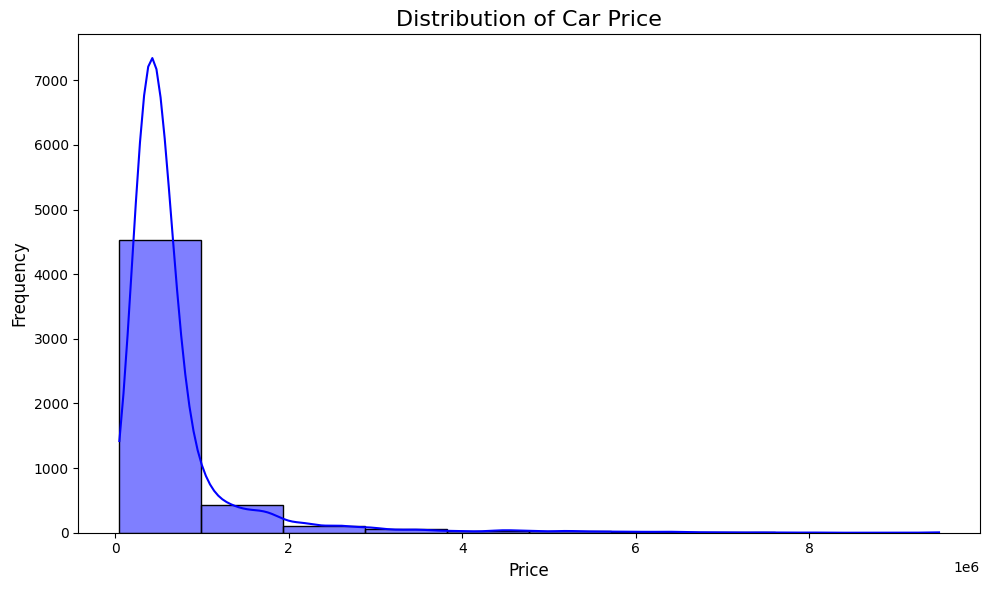

In [844]:
# Distribution of Car Price

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue', bins=10)  
plt.title('Distribution of Car Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


Observations:
- The plot shows a right-skewed distribution of car prices. This means that most cars are priced lower, while a smaller number of cars are 
  priced very high.
- Peak at Lower Price indicate cars are priced in the lower range.
- The long tail towards the higher end of the price range indicates presence of a few luxury, very expensive or high-end cars.
- The extreme values in the right tail might be considered outliers, representing very expensive or unique vehicles.

<Axes: xlabel='Price', ylabel='Density'>

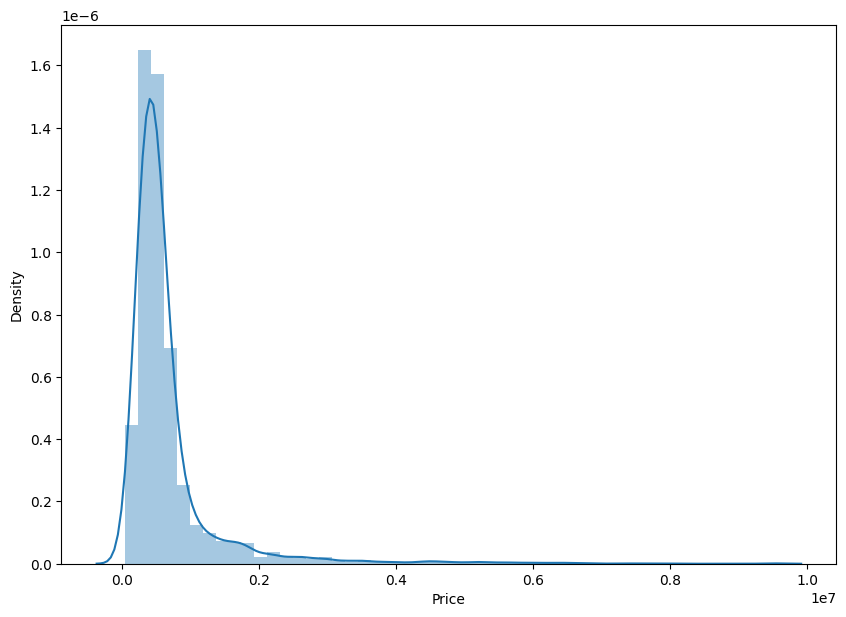

In [845]:
plt.figure(figsize= (10,7))
sns.distplot(df['Price'])

In [846]:
# Lets see the descriptive statistics for the Price column
df['Price'].describe()

count      5197.0
mean     675948.7
std      757767.1
min       45000.0
25%      340000.0
50%      480000.0
75%      675000.0
max     9500000.0
Name: Price, dtype: float64

- Average price for old car is 675948.7  and minimum price for old car avilable in  car dekho.com is 45000.  
- 75 percentile of the cars are below 6.750000e+05 this range which is quite good number. 

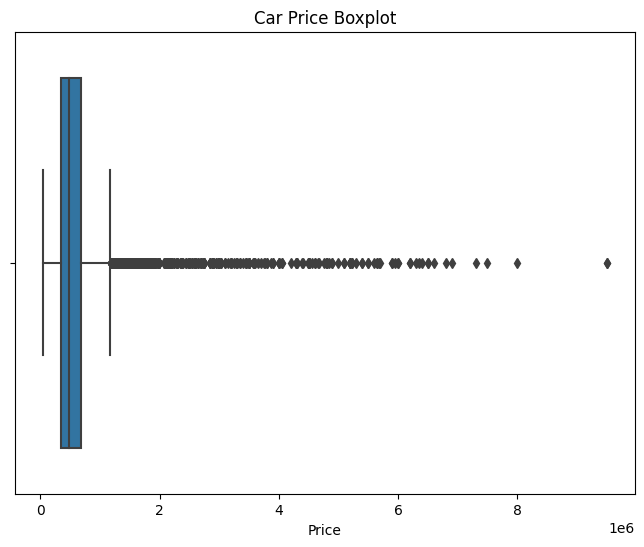

In [847]:
# Box Plot for Price Column Outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'])
plt.title('Car Price Boxplot')
plt.show()


Observations: 
- Most cars are priced lower since the majority of cars are clustered towards the lower price range.
- A few cars are very expensive since there are a few outliers with significantly higher prices.
- Price distribution is skewed meaning the data is not evenly distributed, with more cars at the lower end of the price spectrum.

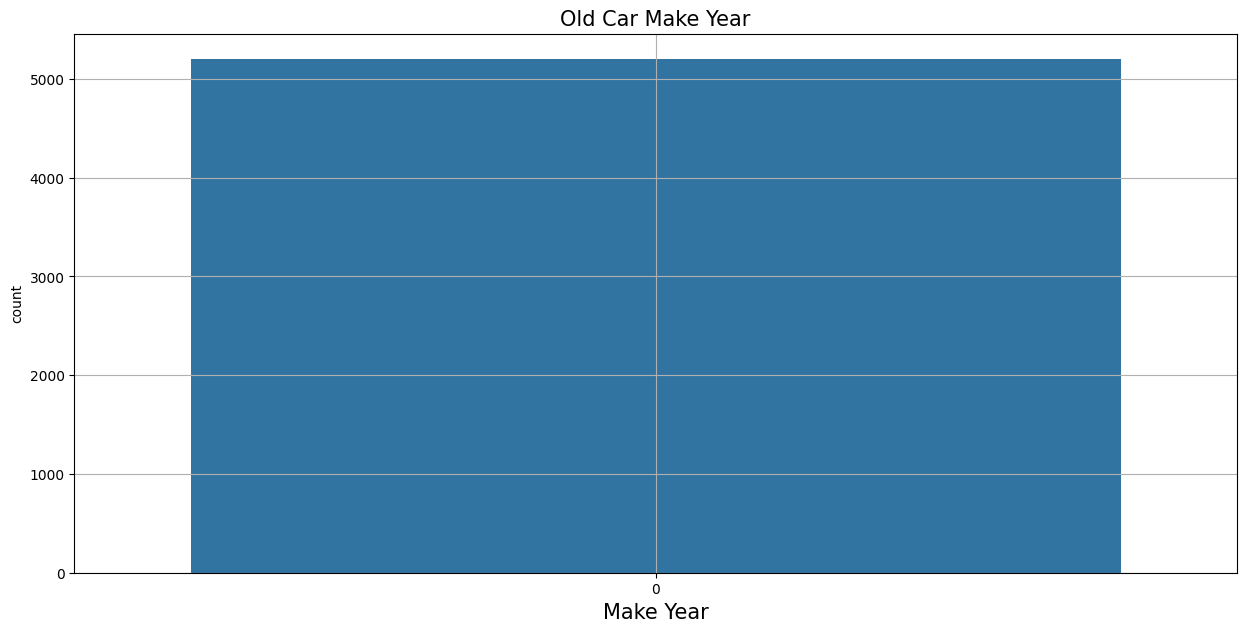

In [848]:
# Plot for Make Year

plt.figure(figsize= (15,7))
sns.countplot(df['Make_Year'])
plt.xlabel('Make Year', fontsize=15)
plt.title('Old Car Make Year', fontsize= 15)
plt.grid(True)
plt.show()

Observations:
- The oldest car we have for sale is one one car which was have make year 1995.  
- People are also selling their New cars which is having make year 2021.  
- Maximum cars we have from 2015 - 2018 Make year. 

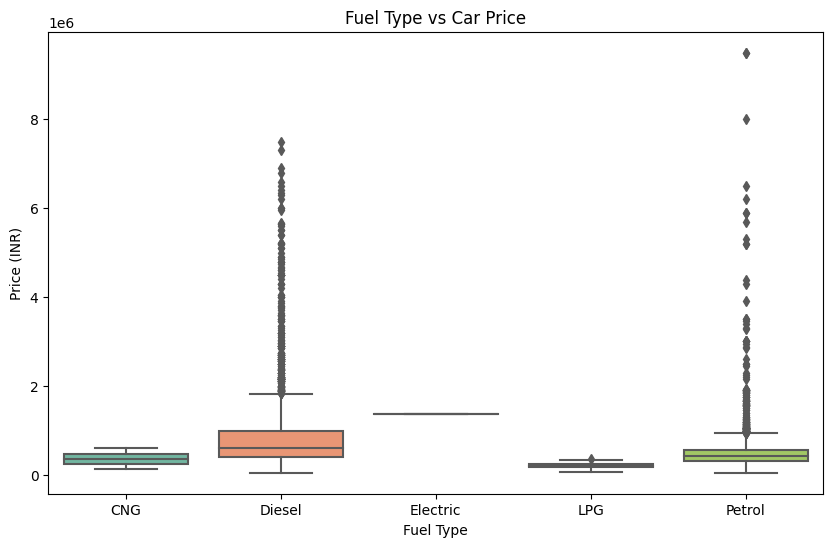

In [849]:
# Fuel Type Vs Price

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel', y='Price', data=df, palette='Set2')
plt.title('Fuel Type vs Car Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price (INR)')
plt.show()


Observations:
- The median price for petrol cars is significantly higher than other fuel types.
- Diesel cars have a wider range of prices compared to other fuel types.
- Electric, CNG, LPG, and Unknown fuel types have fewer data points and a narrower price range.
- The median price for petrol cars is significantly higher than other fuel types, suggesting that petrol cars are generally more expensive.
Generally, the boxplot reveals that fuel type is a significant factor influencing car prices, with petrol cars generally being more expensive than other fuel types.

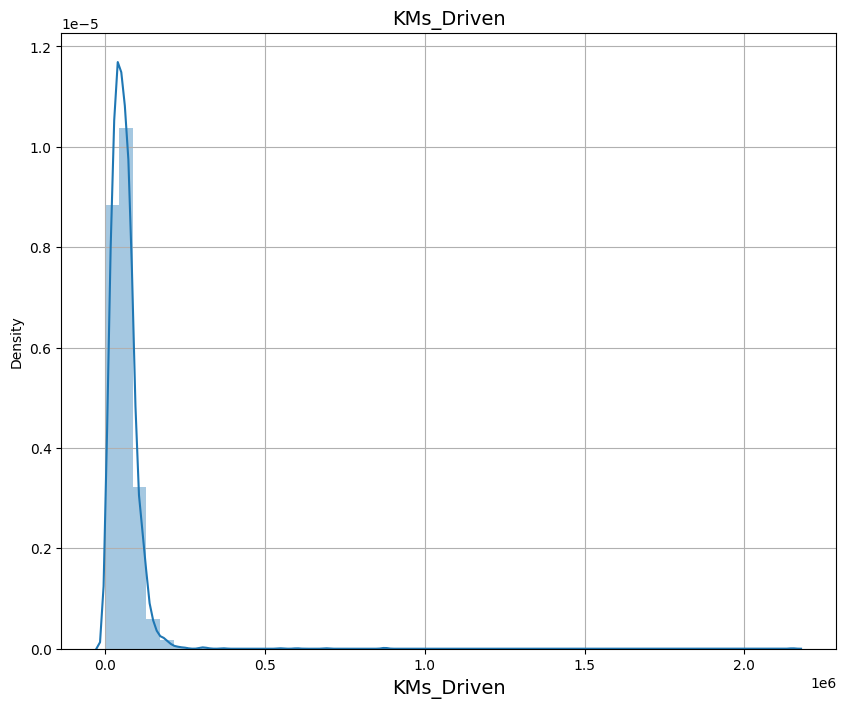

In [850]:
# KMs Driven

plt.figure(figsize=(10,8))
sns.distplot(df['KMs_Driven'])
plt.xlabel('KMs_Driven', fontsize=14)
plt.title('KMs_Driven', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- We can see KMs_Driven having highly positive skewness.  

In [851]:
df['KMs_Driven'].describe()

count      5197.0
mean      59076.1
std       50058.4
min         201.0
25%       32492.0
50%       54000.0
75%       77038.0
max     2150000.0
Name: KMs_Driven, dtype: float64

- We can see maximum values as 2150000.00 Kms due to this values we can see skewness in the data.  
- 75 Percentage of the cars are 77038.00 Kms driven. 
- The car which is having very less kms values 201.0 Kms, Is the newest car on for sale. 

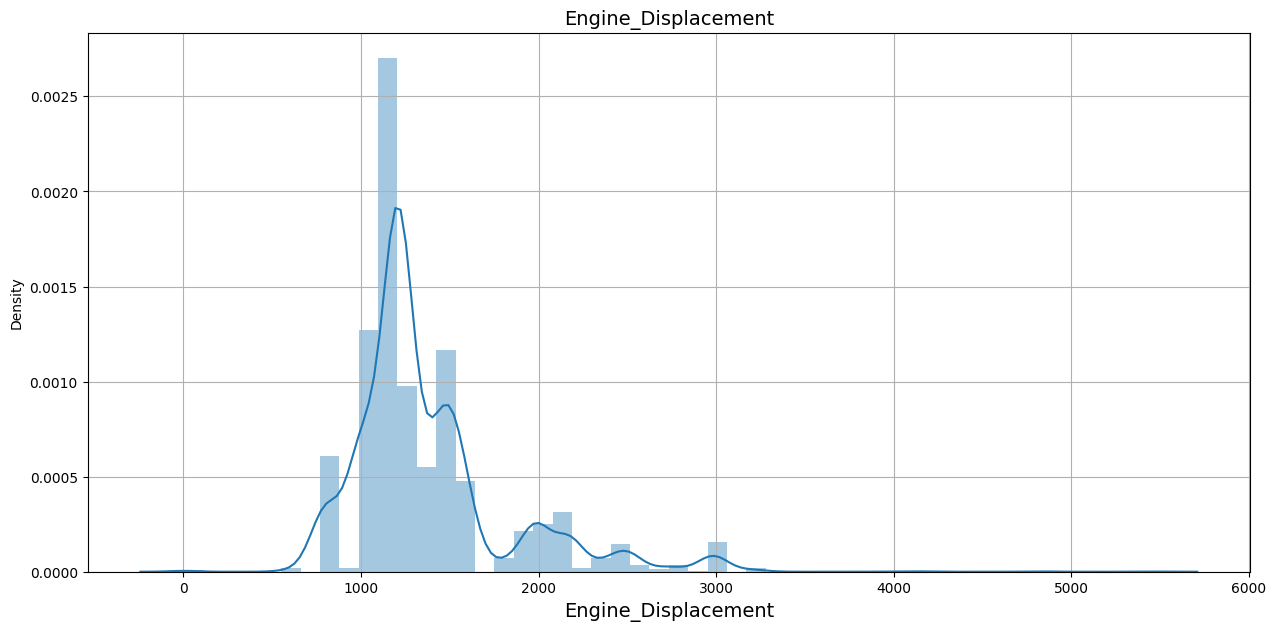

In [852]:
# Engine Displacement

plt.figure(figsize= (15,7))
sns.distplot(df['Engine_Displacement'])
plt.xlabel('Engine_Displacement', fontsize=14)
plt.title('Engine_Displacement', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- Engine_Displacement is having positive skewness.   
- Most of the cars having displacemnet in the range 1000-2000 CC.

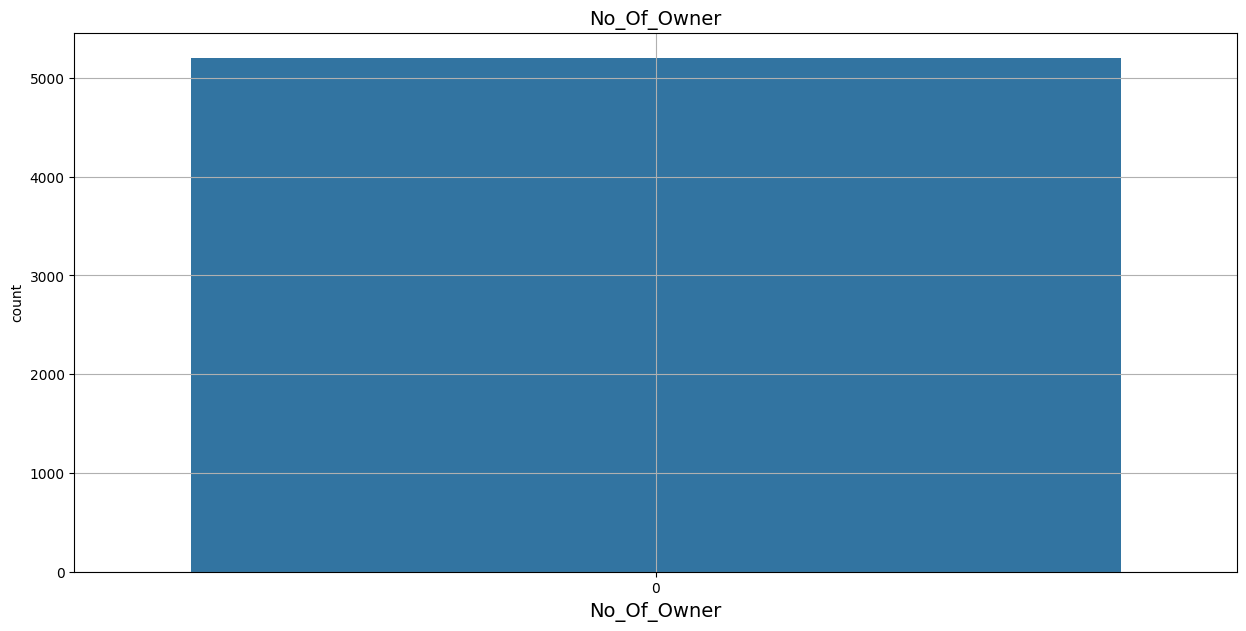

In [853]:
# Number of Owners

# Remove trailing spaces and convert to numeric representation
df['No_Of_Owner'] = df['No_Of_Owner'].str.strip().map({'First': 1, 'Second': 2, 'Third': 3, 'Fourth': 4, 'Test Drive Car': 5})

# Plot the countplot
plt.figure(figsize=(15, 7))
sns.countplot(df['No_Of_Owner'])
plt.xlabel('No_Of_Owner', fontsize=14)
plt.title('No_Of_Owner', fontsize=14)
plt.grid(True)
plt.show()


Observations:
- The countplot shows that the majority of cars(more than 4,000) in the dataset have only had one owner. This suggests that a significant portion of the cars are relatively new or have been well-maintained by their original owners.
- Cars with a single owner often have a better maintenance history, which can impact their reliability and resale value.
- The high number of single-owner cars might indicate a preference for newer or well-maintained vehicles among buyers.:
- Very less car are of second and third type.  
- Here we can see very less numbers for 4th & Above and test Drive cars, we can drop these values during feature selection.

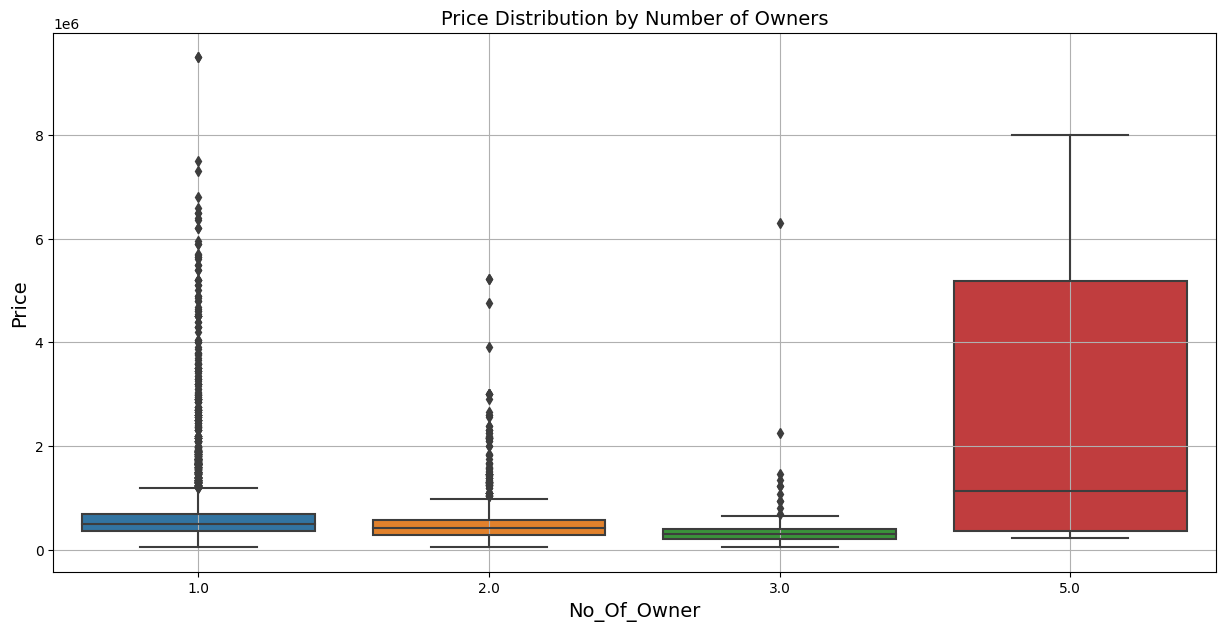

In [854]:
# Boxplot: 'No_Of_Owner' vs 'Price'

plt.figure(figsize=(15, 7))
sns.boxplot(x='No_Of_Owner', y='Price', data=df)
plt.xlabel('No_Of_Owner', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price Distribution by Number of Owners', fontsize=14)
plt.grid(True)
plt.show()


Observations:
- The number of owners is a significant factor influencing the price of a car. Cars with fewer owners, particularly single-owner cars, are generally more expensive due to factors like better maintenance history, lower mileage, and potentially higher perceived value.

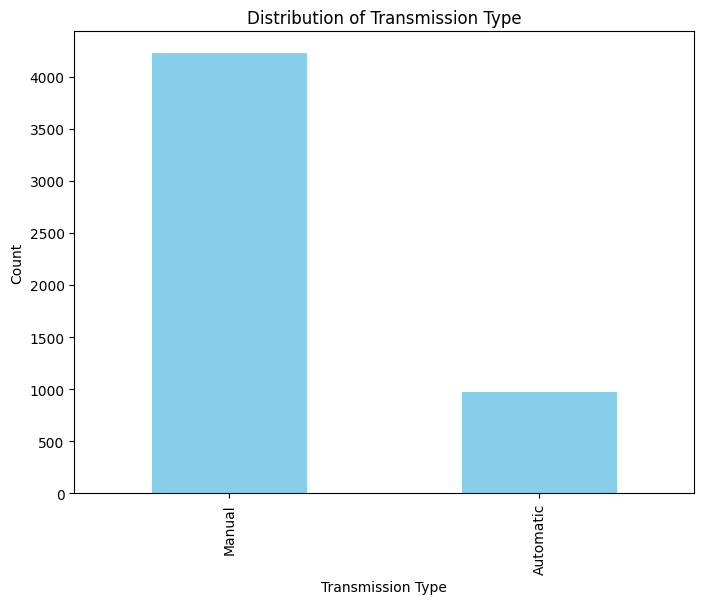

In [855]:
transmission_counts = df['Transmission'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
transmission_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()


Observations:
- Maximum cars having Manual Transmission type,we can say a larger portion of the market prefers manual transmission cars, possibly due to factors like cost, fuel efficiency, or driving preference. We can say people are selling their Manual cars.  

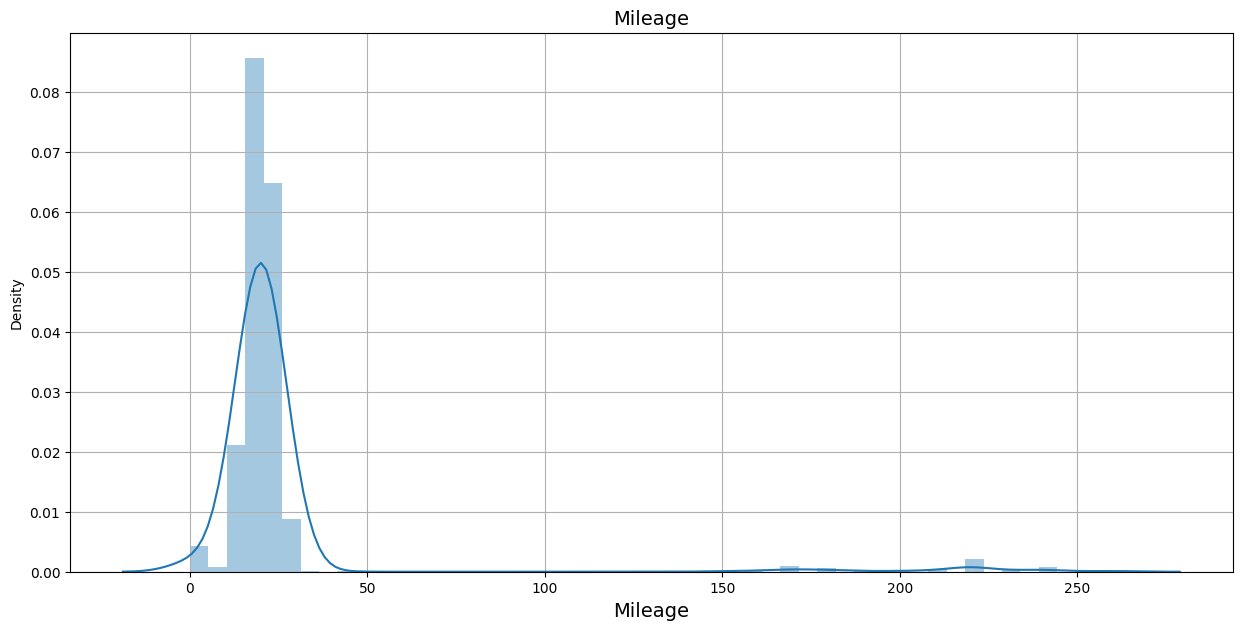

In [856]:
# Mileage

plt.figure(figsize= (15,7))
sns.distplot(df['Mileage'])
plt.xlabel('Mileage', fontsize=14)
plt.title('Mileage', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- We can see few cars having mileage more than 50 which not possible in old cars, these data are outliers.
- We will Remove such data. 

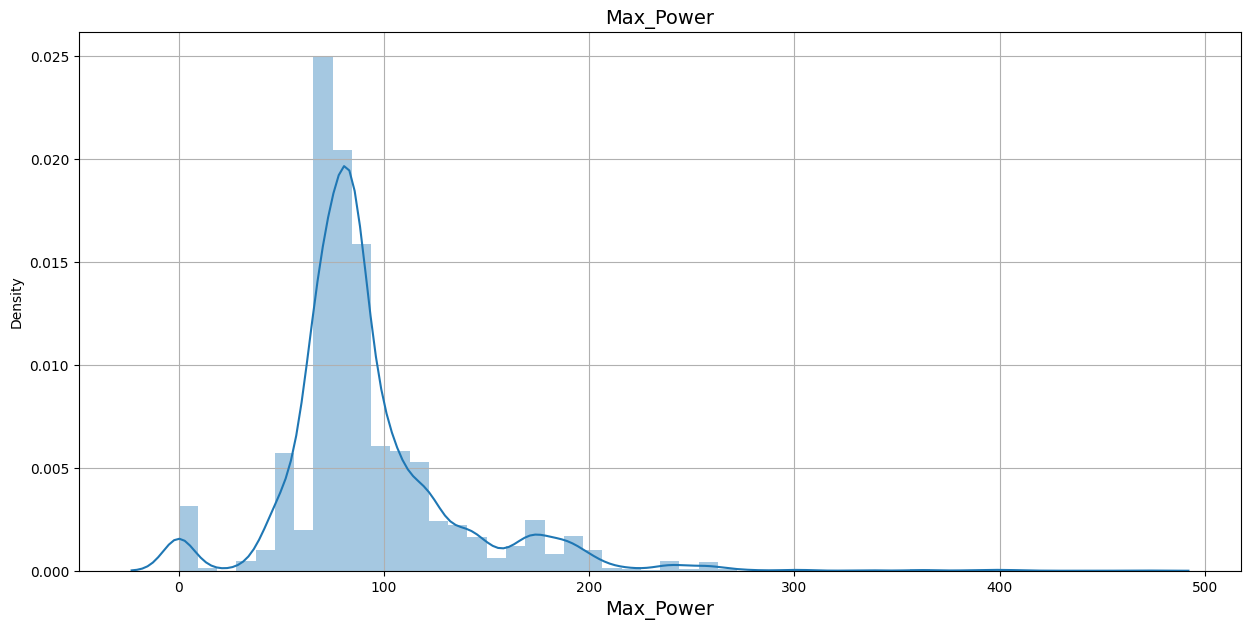

In [857]:
# Max Power

plt.figure(figsize= (15,7))
sns.distplot(df['Max_Power'])
plt.xlabel('Max_Power', fontsize=14)
plt.title('Max_Power', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- Data is slightly positive skewed.   
- Power almost zero or near to zero  not possible. 

In [858]:
# Torque

df['Torque']=df['Torque'].astype('float32')
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df['Torque']=df['Torque'].round(2)
df['Torque']

0      190.0
1      160.0
2      200.0
3      220.0
4       22.4
5      190.0
6      113.0
7       90.0
8      109.0
9      259.9
10     400.0
11     190.0
12      90.0
13     113.7
14     146.0
15     130.0
16       5.0
17      90.0
18       5.0
19      90.0
20     200.0
21     200.0
22     190.0
23     500.0
24     205.0
25     360.0
26     550.0
27     175.0
28     190.0
29     259.9
30     219.7
31      62.0
32     200.0
33     380.0
34      90.0
35      90.0
36     400.0
37      99.1
38      90.0
39     200.0
40     350.0
41     250.0
42     170.0
43     113.8
44      99.0
45       5.0
46     109.0
47     160.0
48     110.0
49      91.0
50     280.0
51     117.0
52     113.8
53      20.4
54      90.0
55     200.0
56     327.0
57     320.0
58     114.0
59     172.5
60      90.0
61     200.0
62     259.9
63      20.4
64      74.5
65     250.0
66      20.4
67     340.0
68     259.8
69     360.0
70     110.0
71      95.0
72     259.9
73     470.0
74     220.0
75     330.0
76     145.0

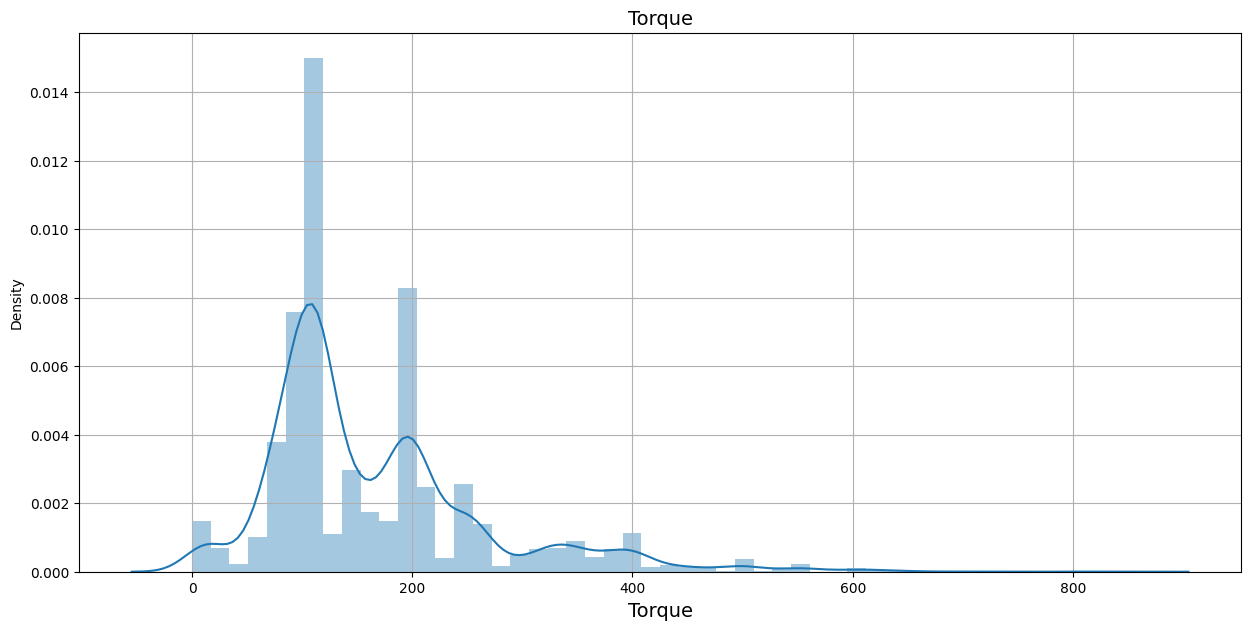

In [859]:
plt.figure(figsize= (15,7))
sns.distplot(df['Torque'])
plt.xlabel('Torque', fontsize=14)
plt.title('Torque', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- Torque having skewness maximum density lie between 100-200

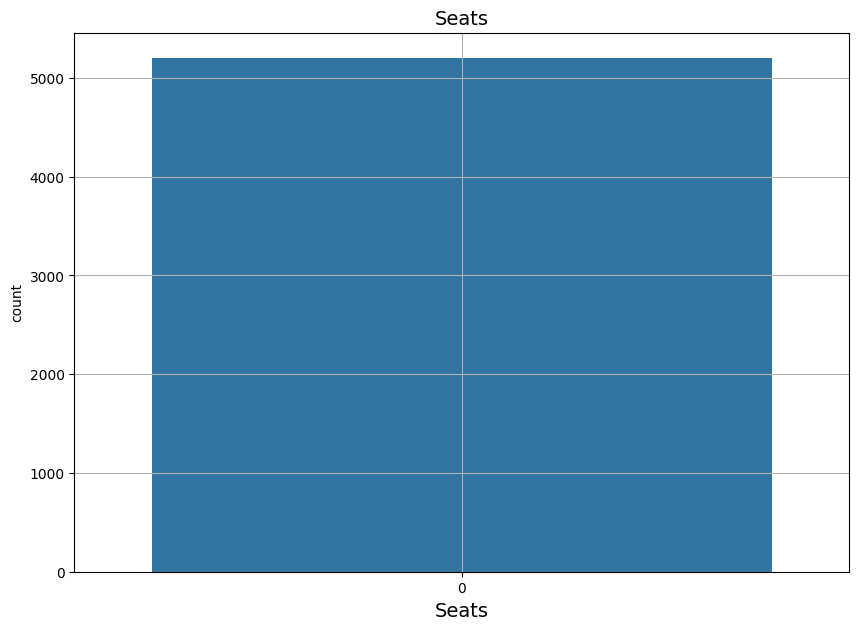

In [860]:
# Seats

plt.figure(figsize= (10,7))
sns.countplot(df['Seats'])
plt.xlabel('Seats', fontsize=14)
plt.title('Seats', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- Majority of the Cars listed are Five seater indicating a strong preference.
- There's a limited range of seat configurations, with most cars falling within the 2-9 seat range.
- Cars with 2, 3, 4, 6, 8, and 9 seats are relatively less common, suggesting that these configurations are less popular in the market

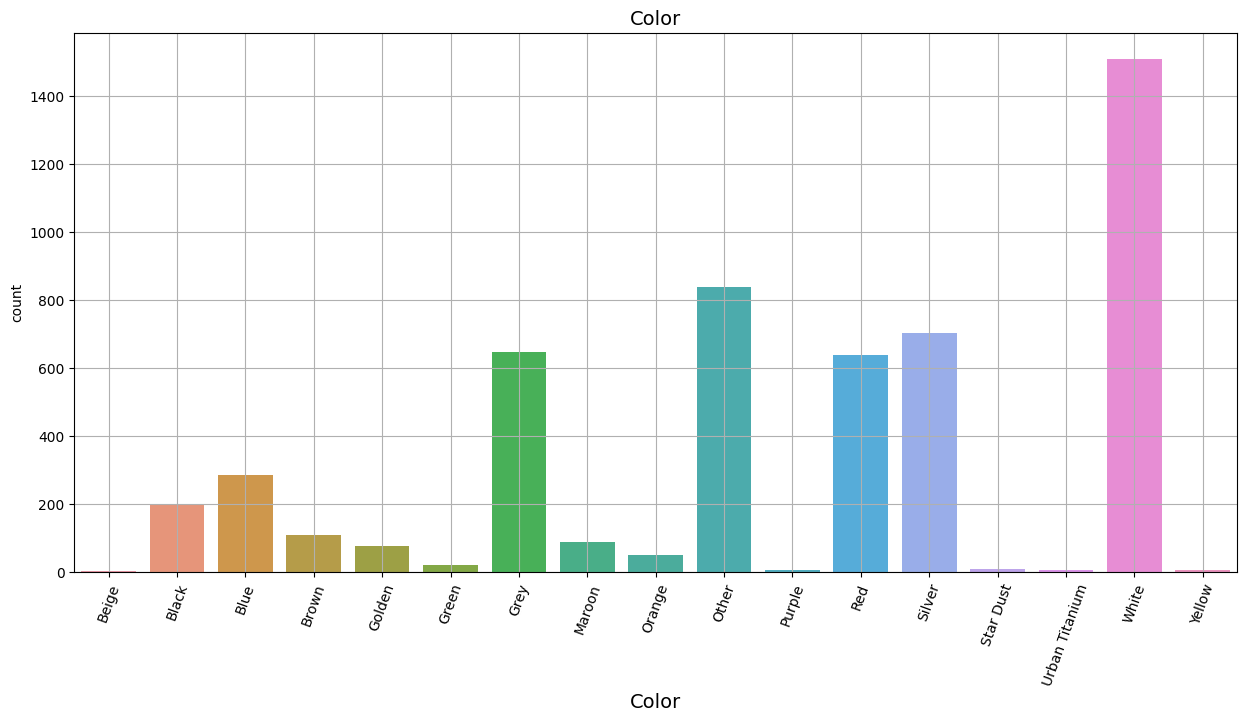

In [861]:
# Color

df['Color'] = df['Color'].astype('category')
plt.figure(figsize=(15,7))
sns.countplot(x=df['Color'])
plt.xlabel('Color', fontsize=14)
plt.title('Color', fontsize=14)
plt.xticks(rotation=70)
plt.grid(True)
plt.show()


In [862]:
df['Color'].value_counts()

White             1511
Other              839
Silver             703
Grey               648
Red                639
Blue               284
Black              198
Brown              109
Maroon              89
Golden              77
Orange              51
Green               21
Star Dust            8
Yellow               6
Urban Titanium       5
Purple               5
Beige                4
Name: Color, dtype: int64

Observations:
- White has the maximum count  indicating a preference for neutral and classic colors.
- Red,Silver and Grey are also quite popular.
- Blue, Black, Brown, Maroon, Golden, Orange and Green are also quite popular.
- Colors like Beige, Purple, Yellow, Urban Titanium and Stardust are less common, indicating a lower preference for these colors.
  

In [863]:
df['Color'].replace(to_replace=['Green','Star Dust', 'Yellow', 'Purple','Urban Titanium','Beige'],
                   value= 'White', inplace= True)

In [864]:
df['Color'].value_counts()

White     1560
Other      839
Silver     703
Grey       648
Red        639
Blue       284
Black      198
Brown      109
Maroon      89
Golden      77
Orange      51
Name: Color, dtype: int64

In [865]:
'''
df['Drive_Type'] = df['Drive_Type'].astype('category')
df['Drive_Type'].unique()
# Remove extra spaces or fix any unexpected values
df['Drive_Type'] = df['Drive_Type'].str.strip()  
df['Drive_Type'] = df['Drive_Type'].fillna('Unknown')  
'''


"\ndf['Drive_Type'] = df['Drive_Type'].astype('category')\ndf['Drive_Type'].unique()\n# Remove extra spaces or fix any unexpected values\ndf['Drive_Type'] = df['Drive_Type'].str.strip()  \ndf['Drive_Type'] = df['Drive_Type'].fillna('Unknown')  \n"

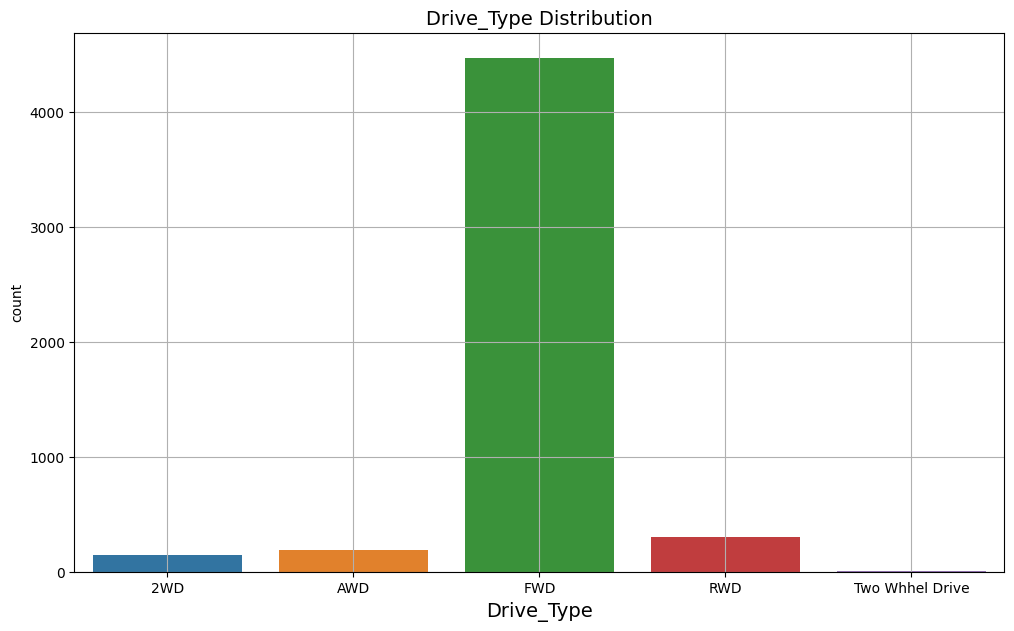

In [866]:
# Drive Type

plt.figure(figsize=(12, 7))
sns.countplot(x='Drive_Type', data=df)
plt.xlabel('Drive_Type', fontsize=14)
plt.title('Drive_Type Distribution', fontsize=14)
plt.grid(True)
plt.show()


Observations:
- We can see most of the cars are Front wheel Drive Type. 

In [867]:
# Steering Type

plt.figure(figsize= (12,7))
sns.countplot(df['Steering_Type'])
plt.xlabel('Steering_Type', fontsize=14)
plt.title('Steering_Type', fontsize= 14)
plt.grid(True)
plt.show()

ValueError: could not convert string to float: 'Power'

<Figure size 1200x700 with 0 Axes>

Observations;
- Majority of the cars are having Power Steering Type. 

In [ ]:
# Front Brake Type

plt.figure(figsize= (12,7))
sns.countplot(df['Front_Brake_Type'])
plt.xlabel('Front_Brake_Type', fontsize=14)
plt.title('Front_Brake_Type', fontsize= 14)
plt.grid(True)
plt.show()

ValueError: could not convert string to float: 'Ventilated Disc'

<Figure size 1200x700 with 0 Axes>

Observations:
- Discs brakes are the most common type of front brake used in cars, with Ventilated Disc being the most frequent variant.
- Multilateral Disc and Solid Disc brakes are significantly less common, suggesting that they are used in specific car models or segments.

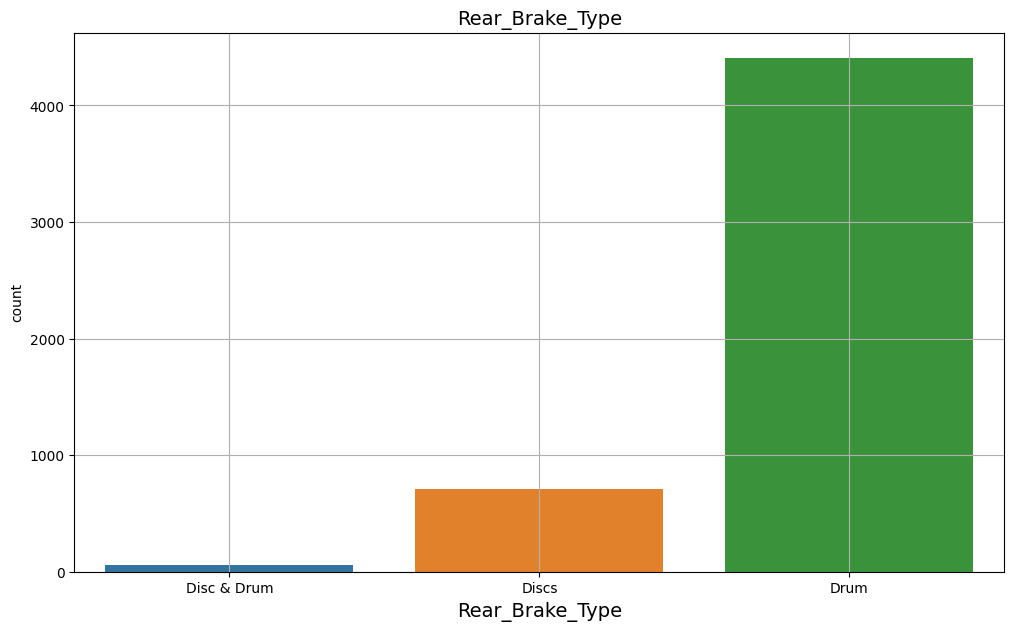

In [ ]:
# Rear Brake Type

plt.figure(figsize=(12, 7))
sns.countplot(x='Rear_Brake_Type', data=df)
plt.xlabel('Rear_Brake_Type', fontsize=14)
plt.title('Rear_Brake_Type', fontsize=14)
plt.grid(True)
plt.show()


Observations:
- Drum brakes are the most common type of rear brake used in cars.
- Disc brakes and Disc & Drum combinations are less common, suggesting that they are used in specific car models or segments.
 

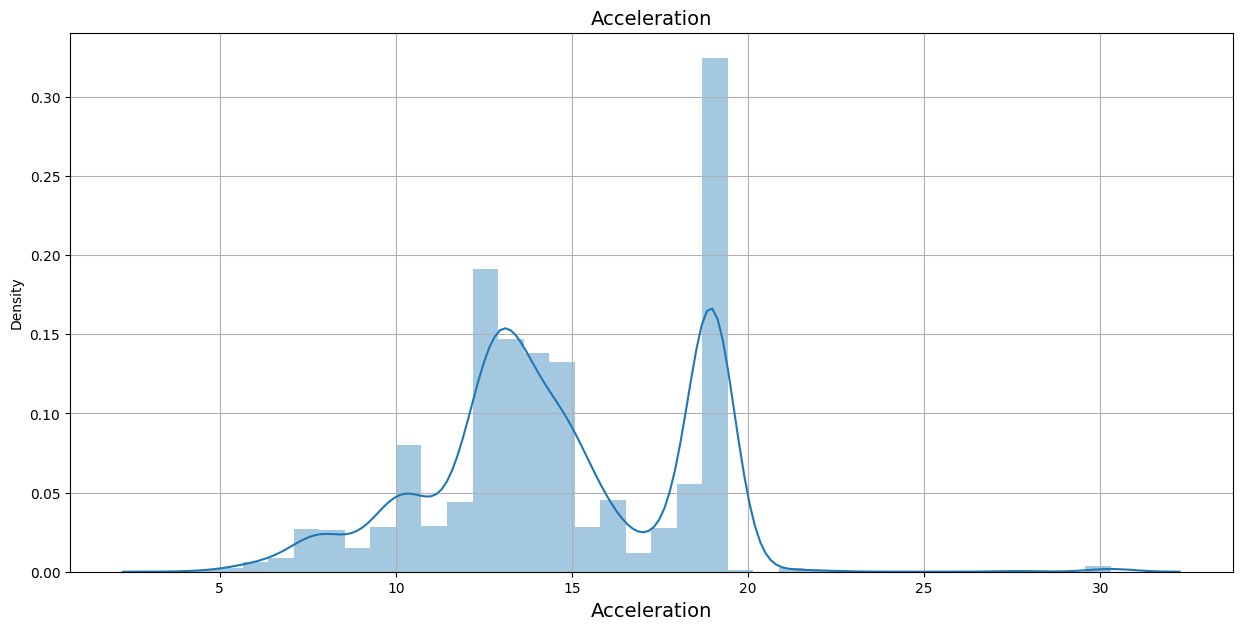

In [ ]:
# Acceleration

plt.figure(figsize= (15,7))
sns.distplot(df['Acceleration'])
plt.xlabel('Acceleration', fontsize=14)
plt.title('Acceleration', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- The first peak is centered around an acceleration value of 15, indicating a cluster of cars with moderate acceleration.
- The second peak is centered around an acceleration value of 20, suggesting a cluster of cars with higher acceleration capabilities.
- The distribution has a long tail towards higher acceleration values, indicating the presence of high-performance cars.
- There are less cars having accelertion less than 10.

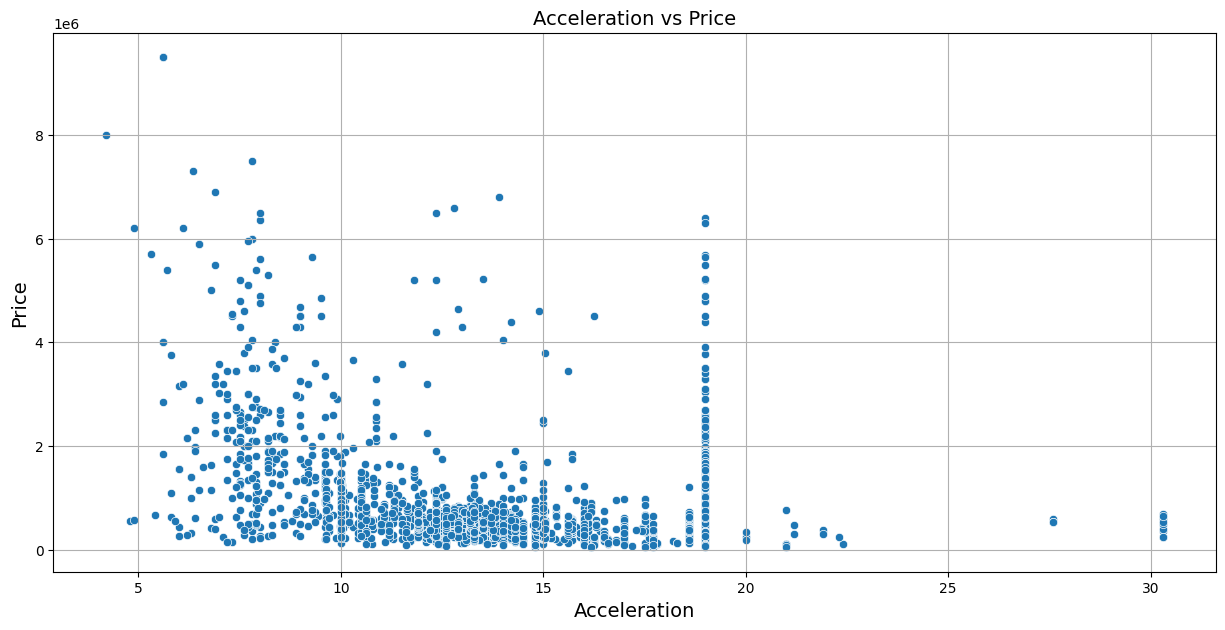

In [ ]:
# Acceleration vs Price scatter plot
plt.figure(figsize=(15,7))
sns.scatterplot(x='Acceleration', y='Price', data=df)
plt.xlabel('Acceleration', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Acceleration vs Price', fontsize=14)
plt.grid(True)
plt.show()


Observations:
- There appears to be a weak positive correlation between acceleration and price suggesting that, in general, cars with higher acceleration tend to be more expensive.
- The data points seem to cluster in certain regions of the plot, indicating that cars with specific acceleration ranges are more common.
- Cars with similar acceleration values can have significantly different prices, suggesting that other factors like brand, features, and model year also influence the price.

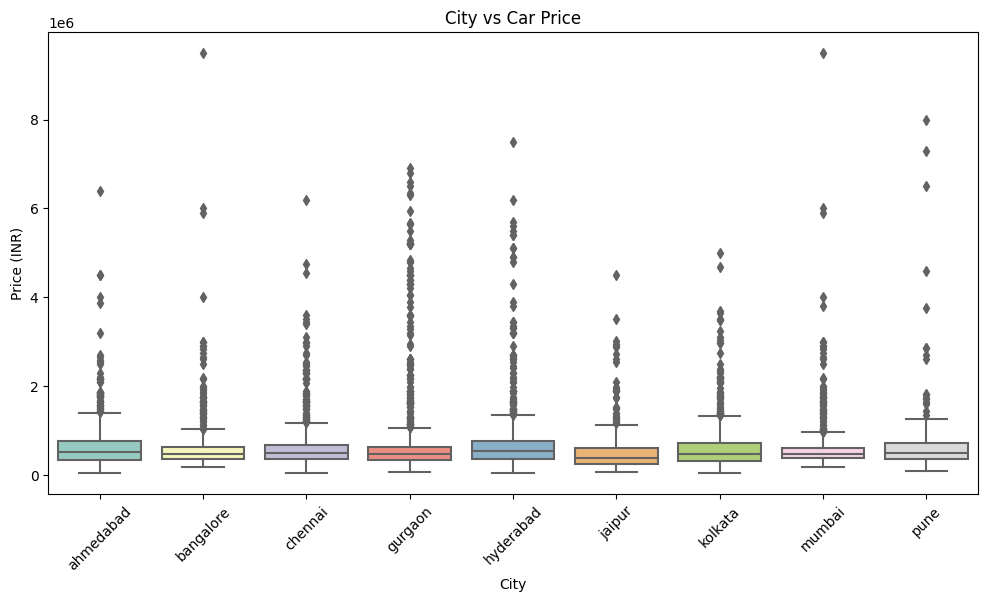

In [ ]:
# Price by Location

plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', data=df, palette='Set3')
plt.title('City vs Car Price')
plt.xlabel('City')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()


Observations:
- Cities like Mumbai and Delhi appear to have a wider range of prices, including some very expensive cars.
- Cities like Ahmedabad and Pune have a more concentrated price range, with fewer outliers.
- Understanding the price distribution in different cities can help car manufacturers and dealerships tailor their product offerings to specific regions.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Brand                5197 non-null   category
 1   Make_Year            5197 non-null   int64   
 2   Fuel                 5197 non-null   category
 3   KMs_Driven           5197 non-null   int64   
 4   Engine_Displacement  5197 non-null   int64   
 5   No_Of_Owner          5183 non-null   float64 
 6   Transmission         5197 non-null   category
 7   Mileage              5197 non-null   float64 
 8   Max_Power            5197 non-null   float64 
 9   Torque               5197 non-null   float32 
 10  Seats                5197 non-null   int64   
 11  Color                5197 non-null   category
 12  Gear_Box             5197 non-null   int64   
 13  Drive_Type           5104 non-null   category
 14  Steering_Type        5172 non-null   category
 15  Front_Brake_Type     

### Handling Missing Values

In [869]:
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner             14
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type              93
Steering_Type           25
Front_Brake_Type        24
Rear_Brake_Type         24
Acceleration           537
Price                    0
City                     0
dtype: int64

Observations:
- We have 537 null values which is maximum in Acceleration column,
- 24 null values in Rear_Brake_Type and Front_Brake_Type  
- 25 null values Steering_Type
- 93 null values in Drive_Type 
- 14 null values in No_of_Owners.

In [870]:
df['Drive_Type'].value_counts()

FWD                4466
RWD                 302
AWD                 187
2WD                 144
Two Whhel Drive       5
Name: Drive_Type, dtype: int64

- Here we can see FWD is higest occuring value, we will replace all the null in Drive type with FWD.

In [871]:
df['Drive_Type'].fillna('FWD', inplace=True)
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner             14
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type           25
Front_Brake_Type        24
Rear_Brake_Type         24
Acceleration           537
Price                    0
City                     0
dtype: int64

In [872]:
df['Steering_Type'].value_counts()

Power       4712
Electric     381
Manual        79
Name: Steering_Type, dtype: int64

- Here we can see Power type is higest occuring value, we will replace all the null with Power.

In [873]:
df['Steering_Type'].fillna('Power', inplace=True)
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner             14
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type        24
Rear_Brake_Type         24
Acceleration           537
Price                    0
City                     0
dtype: int64

In [874]:
df['Front_Brake_Type'].value_counts()

Discs                3069
Ventilated Disc      1970
Solid Disc            115
Multilateral Disc      19
Name: Front_Brake_Type, dtype: int64

- Here we can see Power type is Discs occuring value, we will replace all the null with Discs.

In [875]:
df['Front_Brake_Type'].fillna('Discs', inplace=True)
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner             14
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type         0
Rear_Brake_Type         24
Acceleration           537
Price                    0
City                     0
dtype: int64

In [876]:
df['Rear_Brake_Type'].value_counts()

Drum           4404
Discs           709
Disc & Drum      60
Name: Rear_Brake_Type, dtype: int64

- Here we can see Power type is Drum occuring value, we will replace all the null with Drum.

In [877]:
df['Rear_Brake_Type'].fillna('Drum', inplace=True)
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner             14
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type         0
Rear_Brake_Type          0
Acceleration           537
Price                    0
City                     0
dtype: int64

In [878]:
df['No_Of_Owner'].value_counts()

1.0    4190
2.0     893
3.0      82
5.0      18
Name: No_Of_Owner, dtype: int64

In [879]:
#df['No_Of_Owner'].fillna('1.0', inplace=True)
df['No_Of_Owner'].fillna(df['No_Of_Owner'].mode()[0], inplace=True)  # Fill with mode
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner              0
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type         0
Rear_Brake_Type          0
Acceleration           537
Price                    0
City                     0
dtype: int64

In [880]:
df['Acceleration'].describe()

count   4660.0
mean      14.6
std        3.5
min        4.2
25%       12.5
50%       14.0
75%       18.6
max       30.3
Name: Acceleration, dtype: float64

in Acceleration column we will fill nan with mean of that column.

In [881]:
#df['Acceleration'].fillna(value =14.6, inplace=True)
df['Acceleration'].fillna(df['Acceleration'].median(), inplace=True) 
df.isnull().sum()

Brand                  0
Make_Year              0
Fuel                   0
KMs_Driven             0
Engine_Displacement    0
No_Of_Owner            0
Transmission           0
Mileage                0
Max_Power              0
Torque                 0
Seats                  0
Color                  0
Gear_Box               0
Drive_Type             0
Steering_Type          0
Front_Brake_Type       0
Rear_Brake_Type        0
Acceleration           0
Price                  0
City                   0
dtype: int64

In [882]:
df.isnull().sum()

Brand                  0
Make_Year              0
Fuel                   0
KMs_Driven             0
Engine_Displacement    0
No_Of_Owner            0
Transmission           0
Mileage                0
Max_Power              0
Torque                 0
Seats                  0
Color                  0
Gear_Box               0
Drive_Type             0
Steering_Type          0
Front_Brake_Type       0
Rear_Brake_Type        0
Acceleration           0
Price                  0
City                   0
dtype: int64

### Bivariate Analysis

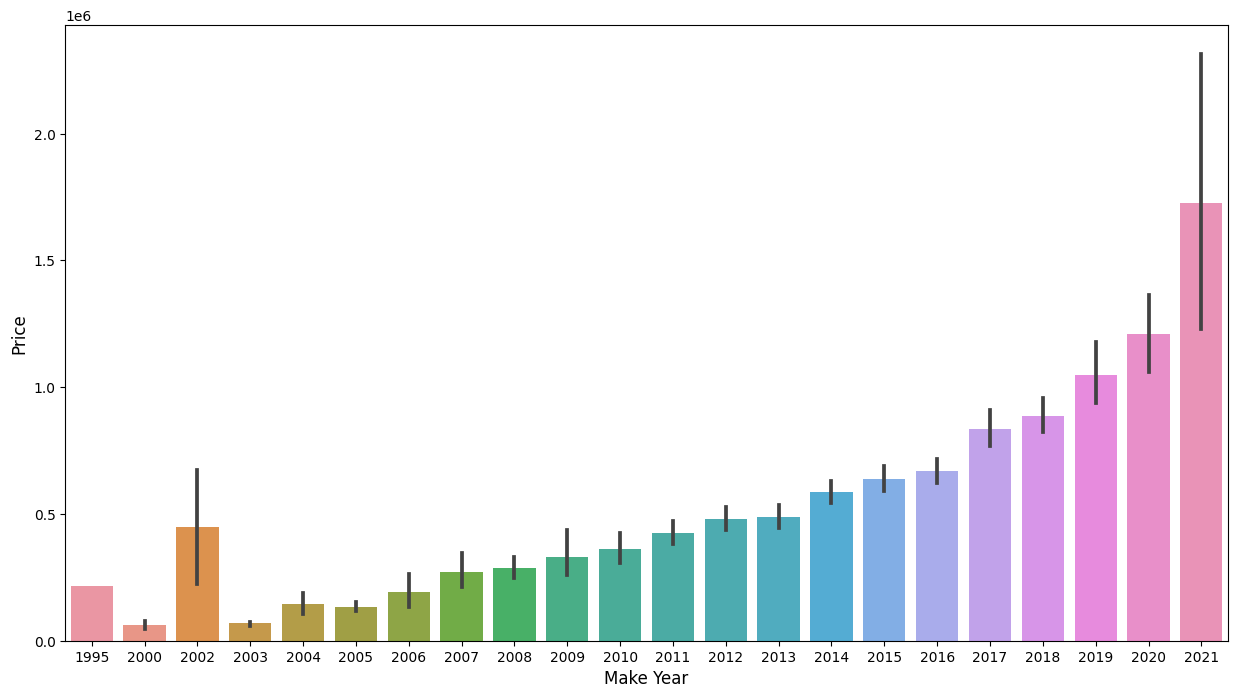

In [883]:
# Lets analyse the Price and Make Year relation

plt.figure(figsize= (15,8))
sns.barplot(x='Make_Year', y='Price', data= df)
plt.xlabel('Make Year', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.show()


- We can see clearly the cars having latest make year are having higher price as compare to older cars.  

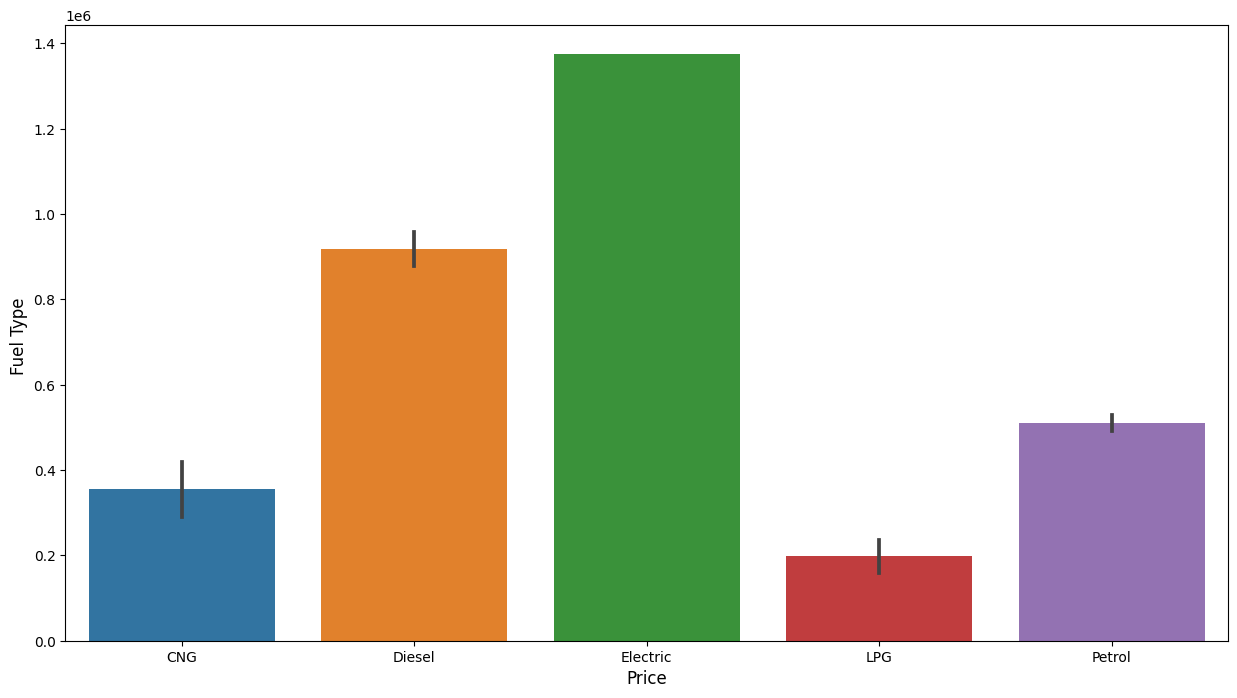

In [884]:
# Lets analyse the Price and Fuel relation

plt.figure(figsize= (15,8))
sns.barplot(x='Fuel', y='Price', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('Fuel Type ', fontsize= 12)
plt.show()

- From the graph we can see, electric cars are having higher price than other type of fuel type.  
- If we compare between petrol and diesel, diesel cars are having higher price than the petrol cars.  

In [885]:
# Lets check the electric car and price  available in our data
df[df['Fuel']=='Electric']

Brand  Make_Year      Fuel  KMs_Driven  \
2039  Toyota Camry Hybrid       2014  Electric       70000   

      Engine_Displacement  No_Of_Owner Transmission  Mileage  Max_Power  \
2039                 2494          1.0    Automatic     19.2      157.7   

      Torque  Seats Color  Gear_Box Drive_Type Steering_Type Front_Brake_Type  \
2039   213.0      5  Grey         6        FWD         Power  Ventilated Disc   

     Rear_Brake_Type  Acceleration    Price     City  
2039           Discs          10.8  1375000  kolkata

We can see we have only one car which is electric type and having very high price, lets drop this column

In [886]:
df.drop(2039, inplace= True)

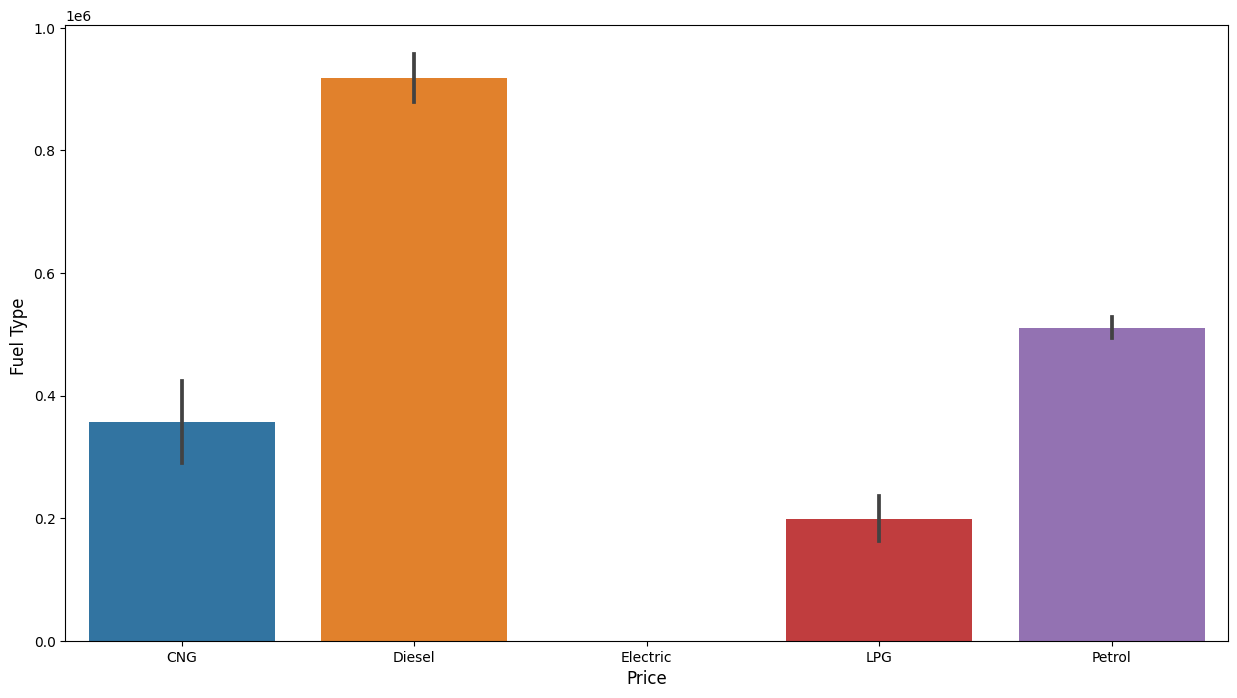

In [887]:
# Lets analyse Fuel again after droping the Electric car

plt.figure(figsize= (15,8))
sns.barplot(x='Fuel', y='Price', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('Fuel Type ', fontsize= 12)
plt.show()

- Here we can see Diesel Cars are Higher in Price.

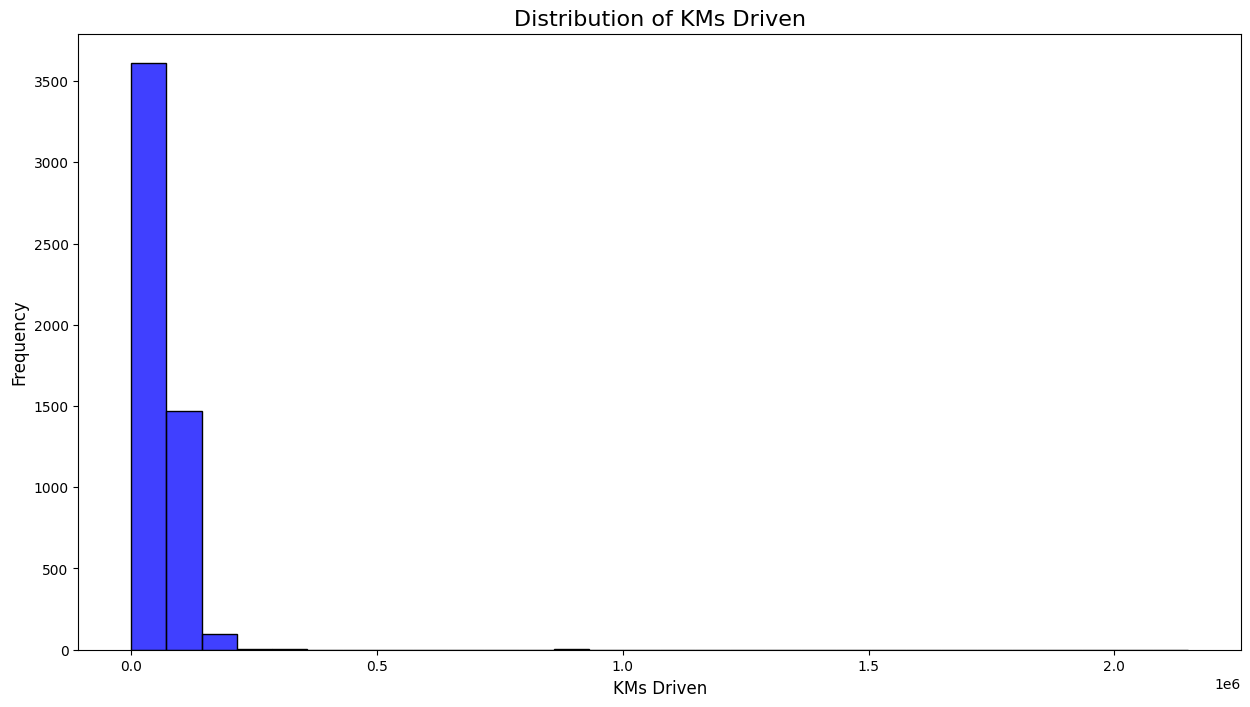

In [ ]:
# Lets analyse the Price and Kms_driven relation

plt.figure(figsize=(15, 8))
sns.histplot(df['KMs_Driven'], kde=False, bins=30, color='blue')  # Adjust bins for granularity
plt.title('Distribution of KMs Driven', fontsize=16)
plt.xlabel('KMs Driven', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

- Here We can say Higher the value of KM driven lower the price of the car.  
- Initially when the KMs Driven are high, price lies in range 0.0-0.25

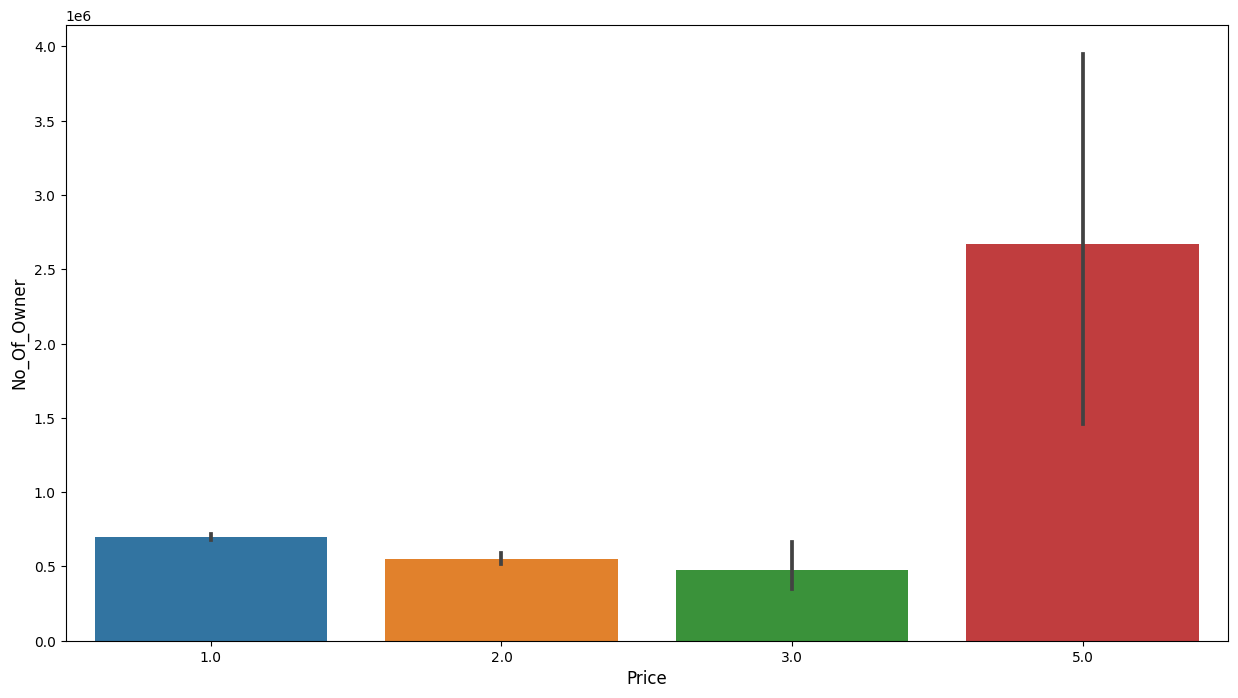

In [ ]:
# Lets analyse the Price and No of Owner

plt.figure(figsize= (15,8))
sns.barplot(x='No_Of_Owner', y='Price', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('No_Of_Owner', fontsize= 12)
plt.show()

- From the above Graph we can say test drive cars are having higher price as compare to other cars.  
- After that First owner cars having higher price as compare to second, third and above owners.

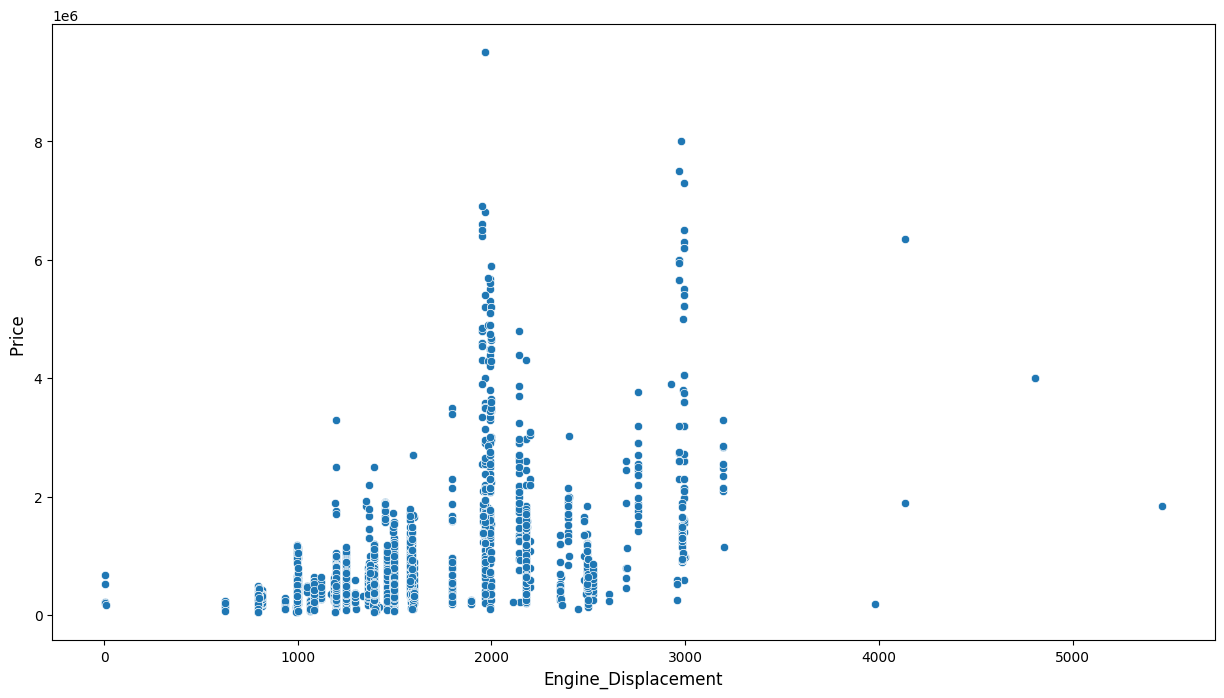

In [ ]:
# Lets analyse the Price and Engine_Displacement relation

plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Engine_Displacement', data= df)
plt.xlabel('Engine_Displacement', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

- We can see cars prices are higher for cars having Engine_Displacement greater than 2000 and equal to 2000 

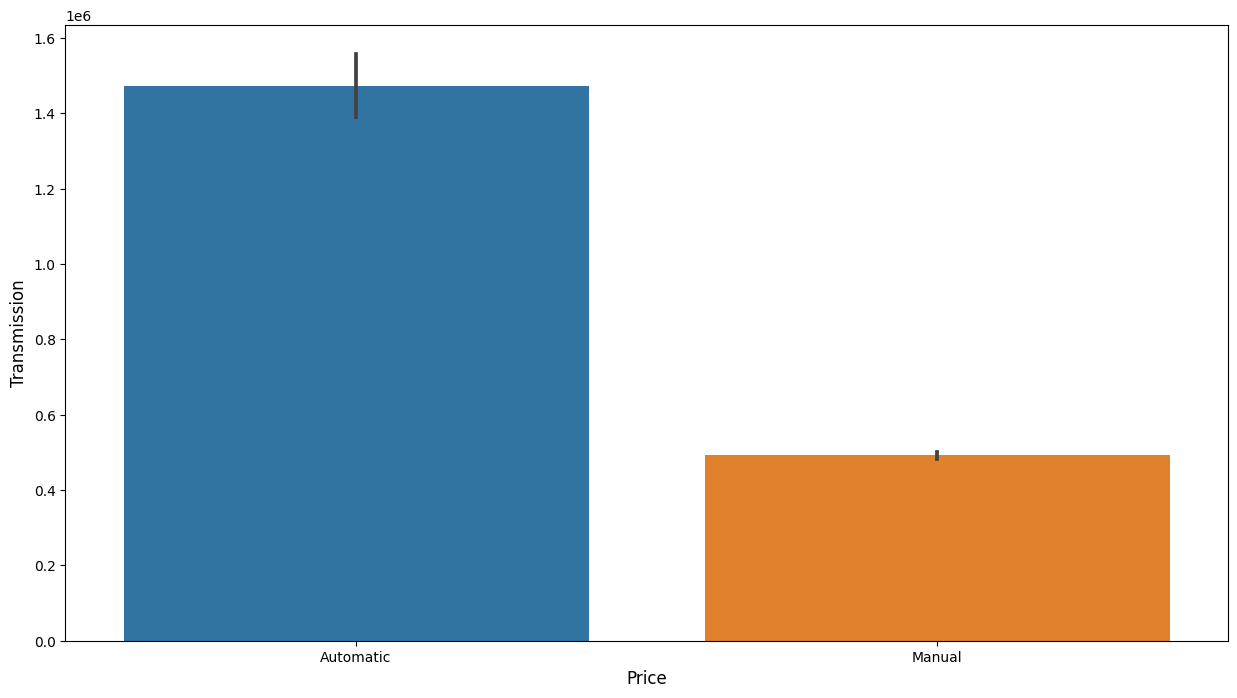

In [ ]:
# Lets analyse the Price and Transmission

plt.figure(figsize= (15,8))
sns.barplot(x='Transmission', y='Price', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('Transmission', fontsize= 12)
plt.show()

- Automatic transmisssion cars have a higher price as compare to Manual. 

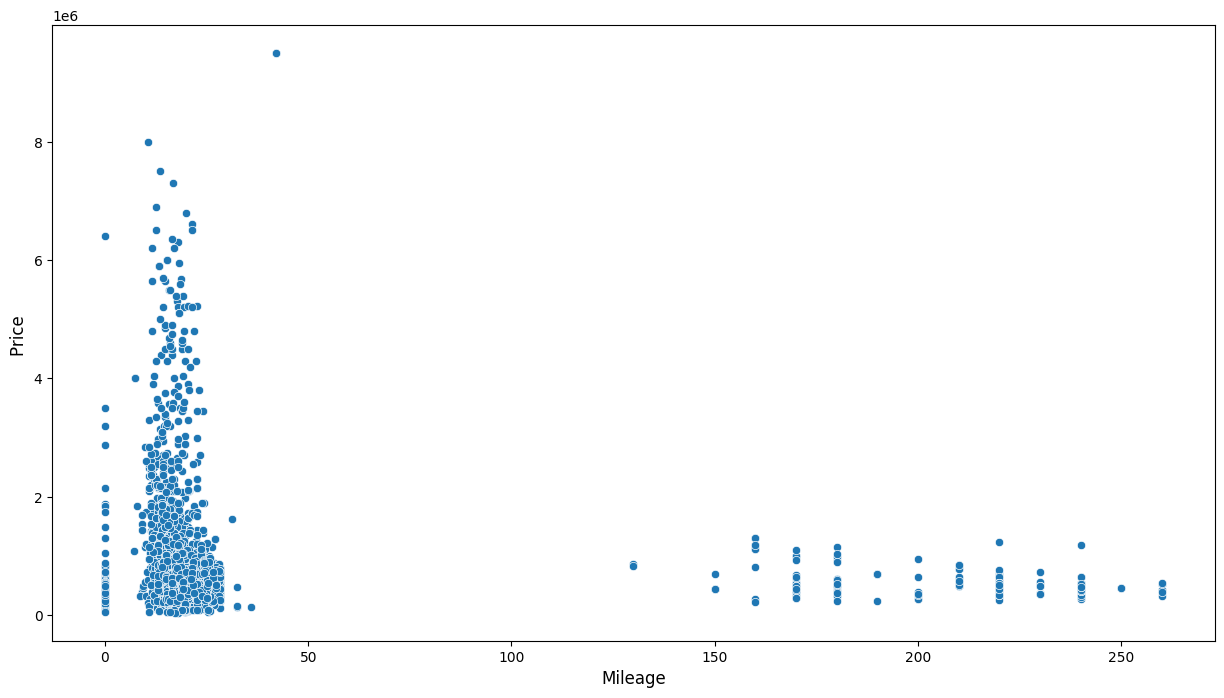

In [ ]:
# Lets analyse the Price and Mileage relation

plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Mileage', data= df)
plt.xlabel('Mileage', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

- There is a weak negative correlation between mileage and price meaning that as the mileage of a car increases, its price tends to decrease.

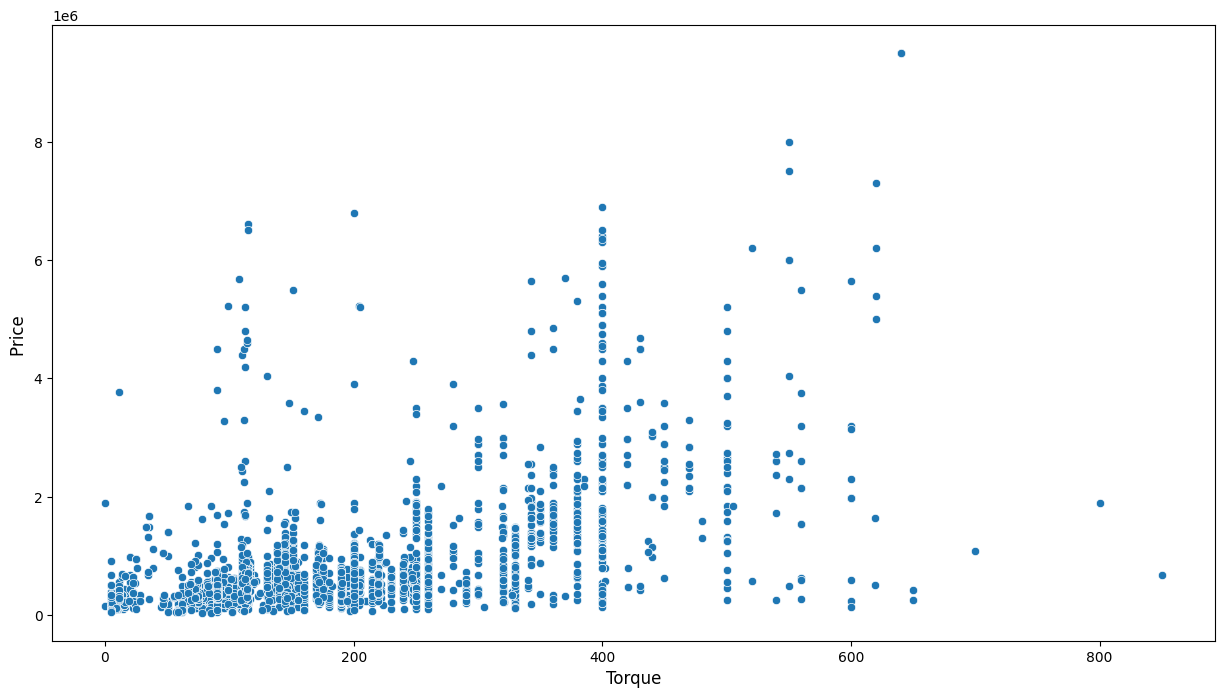

In [ ]:
# Lets analyse the Price and Torque relation

plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Torque', data= df)
plt.xlabel('Torque', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

- With increase in value of Torque, the price also increases.

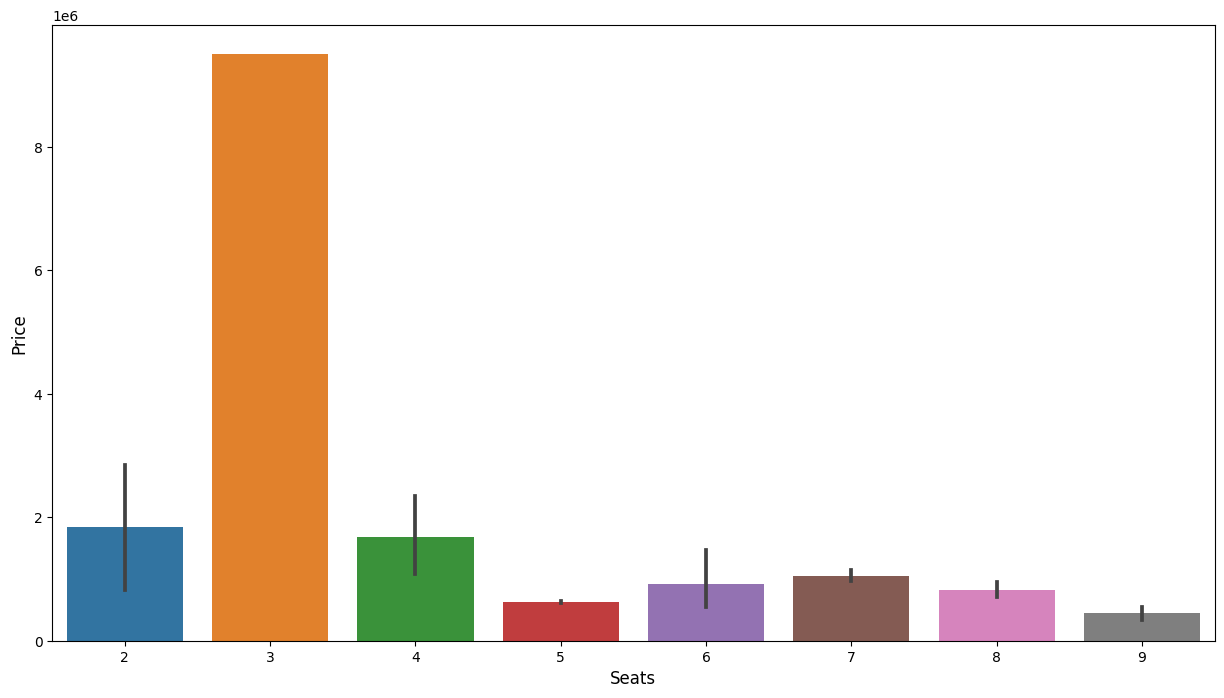

In [ ]:
# Lets analyse the Price and Seats

plt.figure(figsize= (15,8))
sns.barplot(x='Seats', y='Price', data= df)
plt.xlabel('Seats', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.show()

- Cars having 3 seats are having higher price.   
- Cars with 5 seats is having less prices as compare to other.

In [ ]:
df[df['Seats']==3]

Brand  Make_Year    Fuel  KMs_Driven  \
455  Volvo XC 90 Excellence       2017  Petrol       47000   
580  Volvo XC 90 Excellence       2017  Petrol       47000   

     Engine_Displacement  No_Of_Owner Transmission  Mileage  Max_Power  \
455                 1969          1.0    Automatic     42.0      401.4   
580                 1969          1.0    Automatic     42.0      401.4   

     Torque  Seats   Color  Gear_Box Drive_Type Steering_Type  \
455   640.0      3  Silver         8        AWD         Power   
580   640.0      3  Silver         8        AWD         Power   

    Front_Brake_Type Rear_Brake_Type  Acceleration    Price       City  
455            Discs           Discs           5.6  9500000     mumbai  
580            Discs           Discs           5.6  9500000  bangalore

- Here we car see which car is having higher price with 3 seating capacity, which is not possible. 
- We will drop this two rows from dataframe.

In [890]:
df= df.drop([455, 580], axis=0)

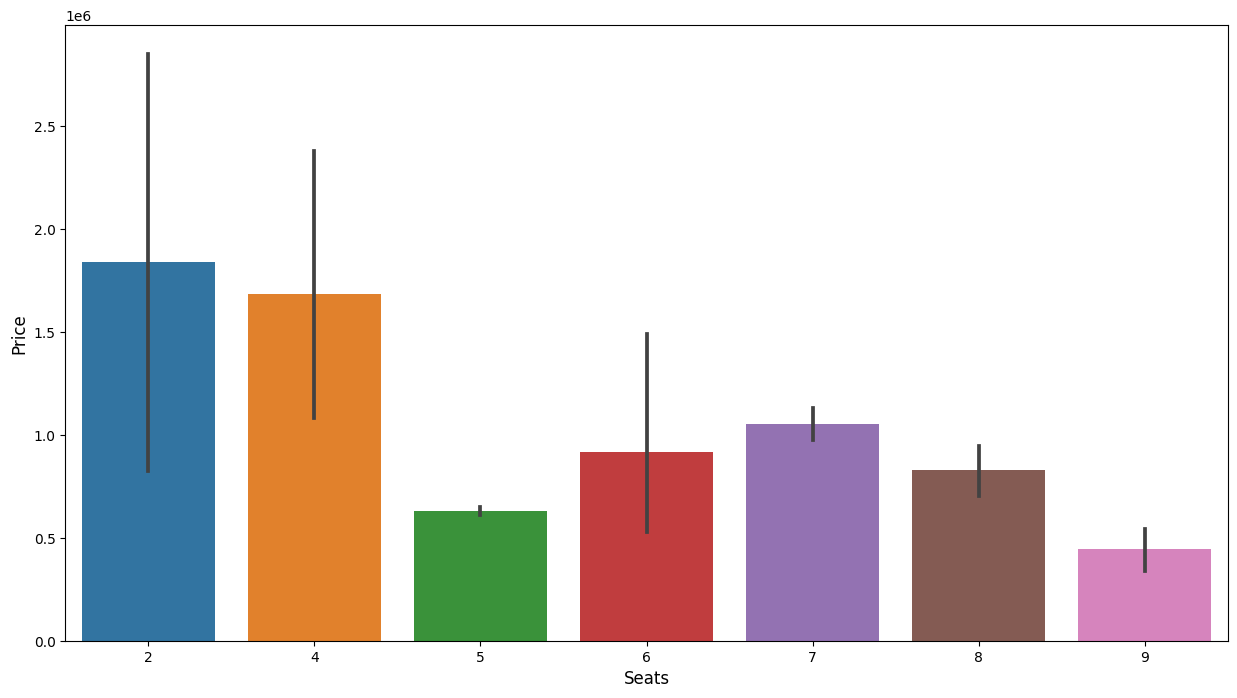

In [891]:
# Lets analyse the Price and Seats again

plt.figure(figsize= (15,8))
sns.barplot(x='Seats', y='Price', data= df)
plt.xlabel('Seats', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.show()

- After droping the car with seats 3, we can see 2 and 4 seater cars having higher Price and 5 seater cars being more economical. 

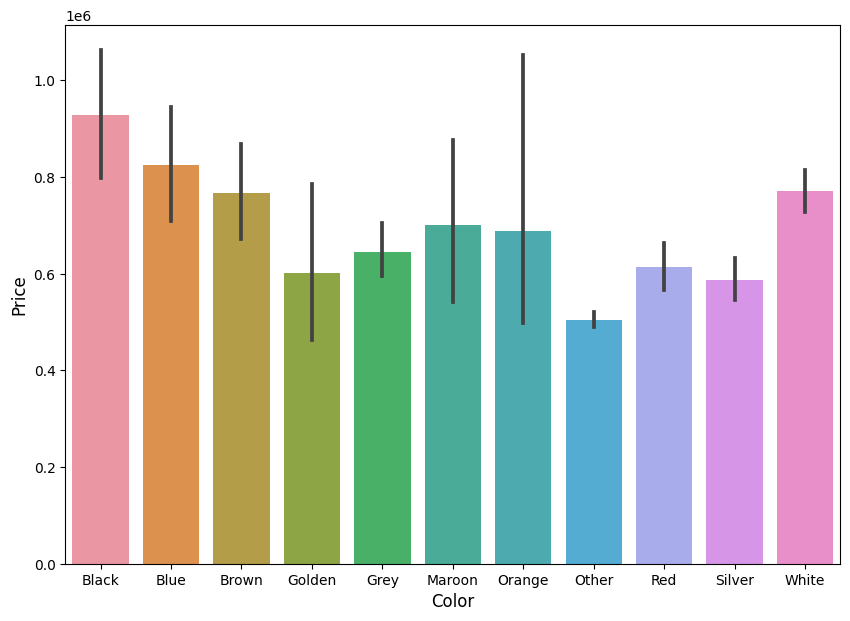

In [892]:
# Lets analyse the Color factor on the Price

plt.figure(figsize= (10,7))
sns.barplot(x='Color', y='Price', data=df)
plt.xlabel('Color', fontsize=12)
plt.ylabel('Price', fontsize= 12)
plt.show()

- Here we can see there is no direct relation of color with Price.  
- In our data Black cars having higher Price as compared to others.
- Blue and white also have hiher price

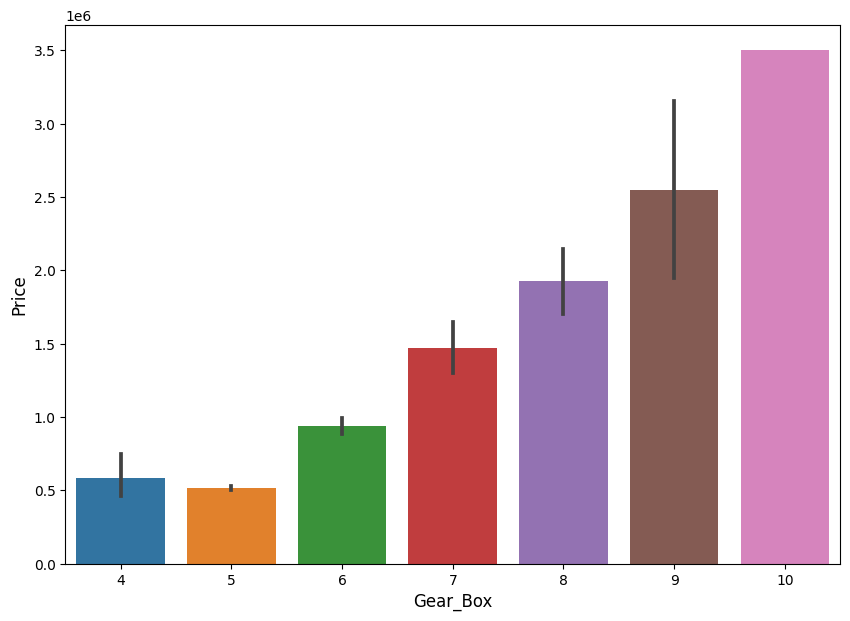

In [893]:
# Lets analyse the Price on the basis of the Gear_box

plt.figure(figsize= (10,7))
sns.barplot(x='Gear_Box', y='Price', data= df)
plt.xlabel('Gear_Box', fontsize=12)
plt.ylabel('Price', fontsize= 12)
plt.show()

- We can clearly see with increase in the number of gears the price of cars increases.

In [894]:
# Lets see Rows having cars with 10 Gears 
df[df['Gear_Box']==10]

Brand  Make_Year    Fuel  KMs_Driven  \
3187  Ford Endeavour Titanium Plus       2020  Diesel        4500   

      Engine_Displacement  No_Of_Owner Transmission  Mileage  Max_Power  \
3187                 1996          1.0    Automatic     13.9      167.6   

      Torque  Seats  Color  Gear_Box Drive_Type Steering_Type  \
3187   420.0      7  White        10        RWD         Power   

     Front_Brake_Type Rear_Brake_Type  Acceleration    Price     City  
3187            Discs           Discs          19.0  3500000  chennai

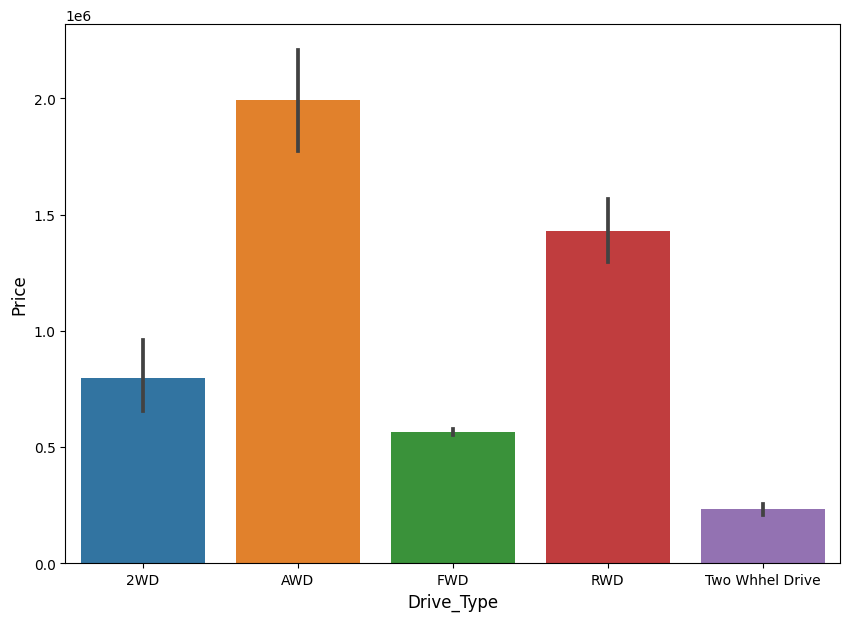

In [895]:
# Analysing Drive_Type with respect to price of the cars

plt.figure(figsize= (10,7))
sns.barplot(x='Drive_Type', y='Price', data= df)
plt.xlabel('Drive_Type', fontsize=12)
plt.ylabel('Price', fontsize= 12)
plt.show()

- We can see All Wheel Drive cars are having higher price as compare to the Front Wheel Drive and Rear Wheel Drive cars.

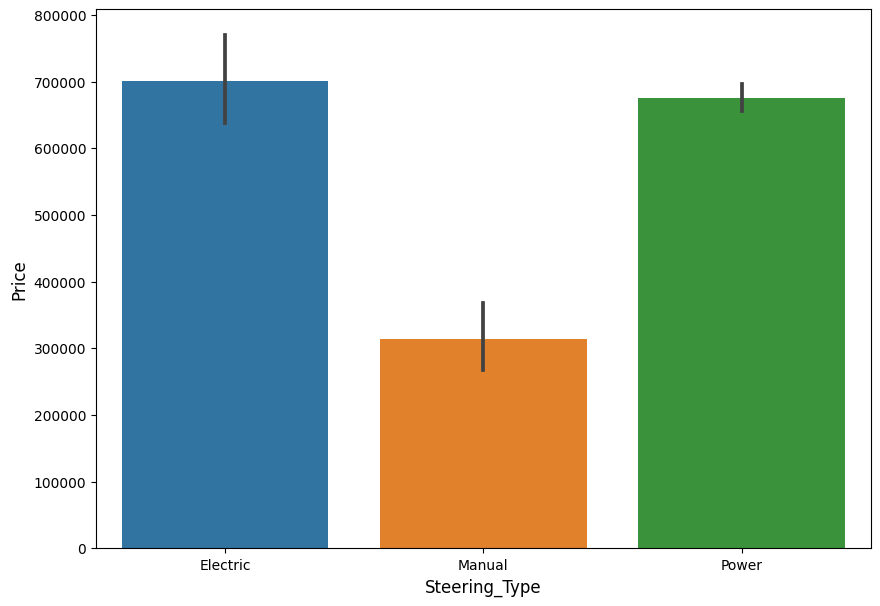

In [ ]:
# Analysing Steering_Type with respect to price of the cars

plt.figure(figsize= (10,7))
sns.barplot(x='Steering_Type', y='Price', data= df)
plt.xlabel('Steering_Type', fontsize=12)
plt.ylabel('Price', fontsize= 12)
plt.show()

- Power and Electric Steering type almost have equal price.  
- Manual Steering systems are rare and having very low price.

Text(0, 0.5, 'Price')

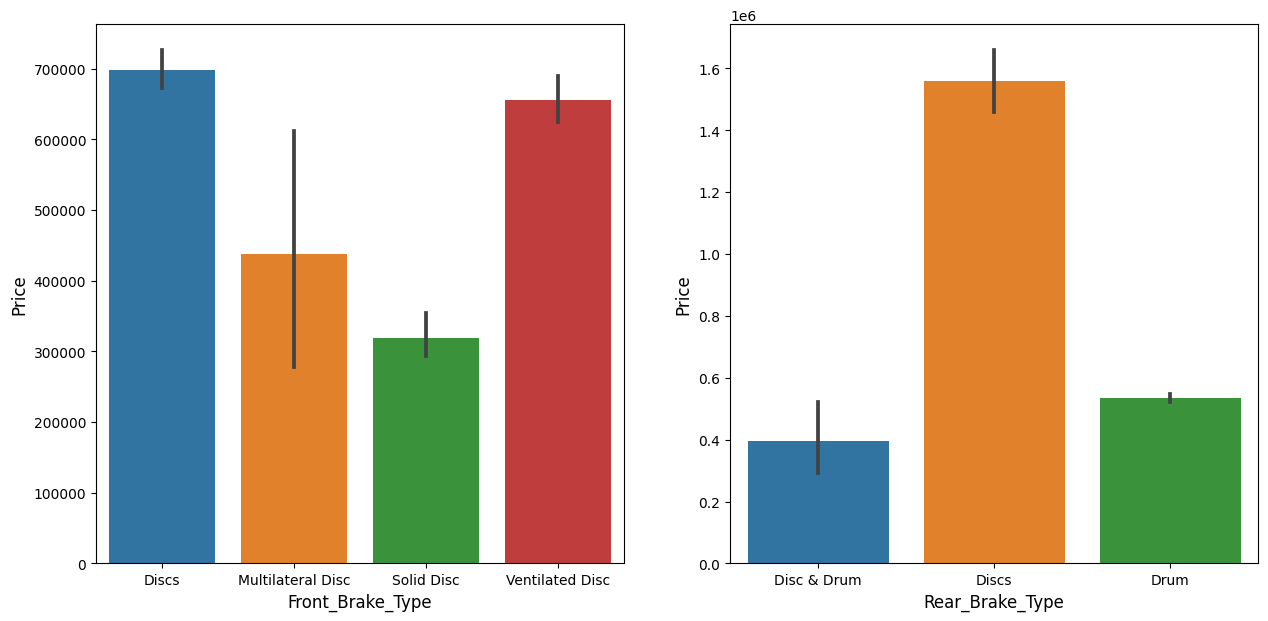

In [ ]:
# Analysing Brake_Type with respect to Price of the cars

plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.barplot(x='Front_Brake_Type', y='Price', data= df)
plt.xlabel('Front_Brake_Type', fontsize=12)
plt.ylabel('Price', fontsize= 12)

plt.subplot(1,2,2)
sns.barplot(x='Rear_Brake_Type', y='Price', data= df)
plt.xlabel('Rear_Brake_Type', fontsize=12)
plt.ylabel('Price', fontsize= 12)

- We can see Cars having Discs type breaks are higher in price than the other types of breaks for both.

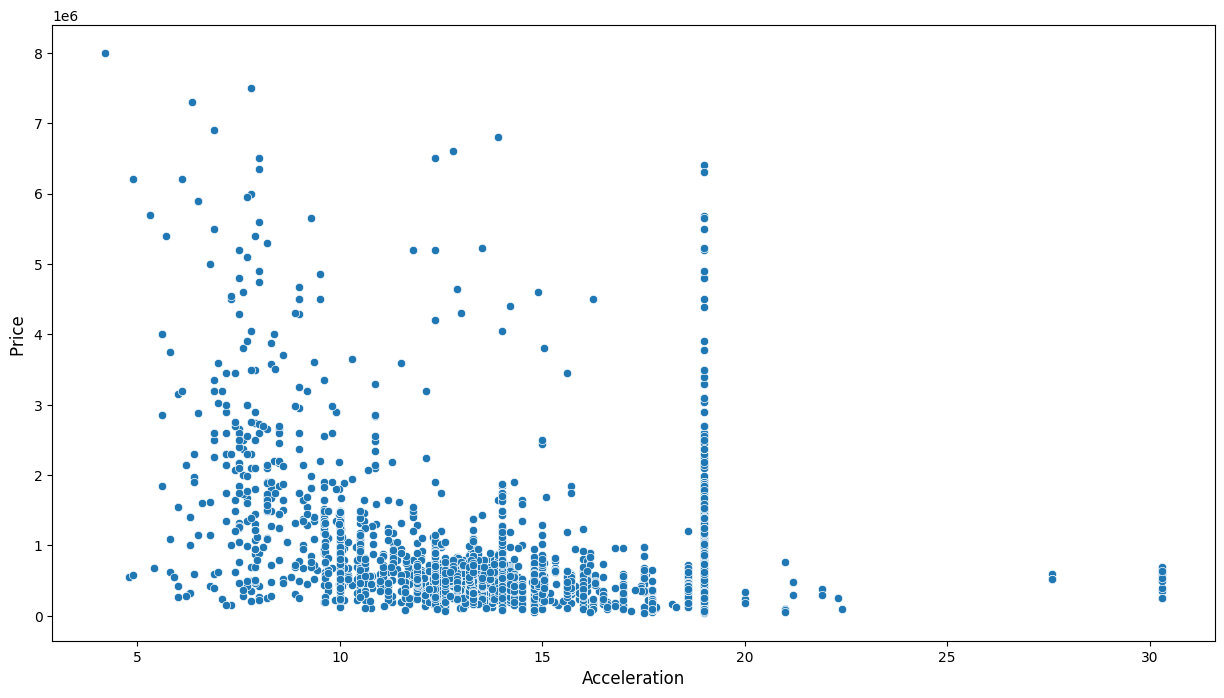

In [ ]:
# Let's analyze Acceleration vs Price

plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Acceleration', data= df)
plt.xlabel('Acceleration', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

- While there seems to be a slight positive trend, the correlation between acceleration and price is relatively weak suggesting that while higher acceleration might correlate with higher prices, other factors like brand, model, and features play a significant role. 

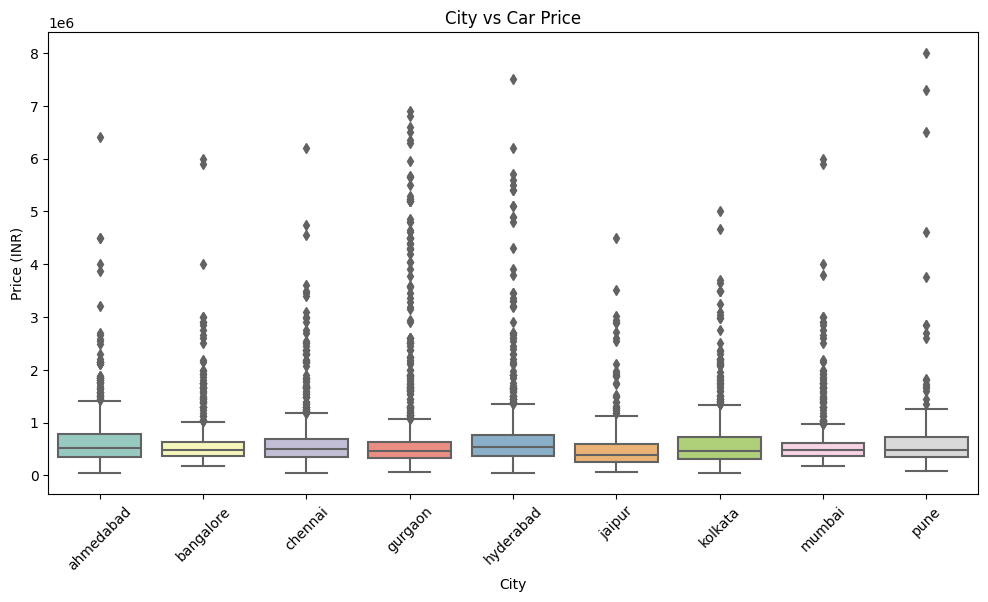

In [ ]:
# Let's Analyze Location vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', data=df, palette='Set3')
plt.title('City vs Car Price')
plt.xlabel('City')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()


- There is significant variation in car prices across different cities.
- In conclusion, the city can influence the price of a car, with certain cities having higher-priced cars.

### Feature Engineering
In this step of the project we will extract all the required features for our model development and convert the categorical features
into numerical feature.

In [896]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5194 entries, 0 to 5196
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Brand                5194 non-null   category
 1   Make_Year            5194 non-null   int64   
 2   Fuel                 5194 non-null   category
 3   KMs_Driven           5194 non-null   int64   
 4   Engine_Displacement  5194 non-null   int64   
 5   No_Of_Owner          5194 non-null   float64 
 6   Transmission         5194 non-null   category
 7   Mileage              5194 non-null   float64 
 8   Max_Power            5194 non-null   float64 
 9   Torque               5194 non-null   float32 
 10  Seats                5194 non-null   int64   
 11  Color                5194 non-null   category
 12  Gear_Box             5194 non-null   int64   
 13  Drive_Type           5194 non-null   category
 14  Steering_Type        5194 non-null   category
 15  Front_Brake_Type     

In [897]:
# Selecting columns with 'category' dtype
categorical_features = df.select_dtypes(include=['category'])
categorical_features.head()

Brand    Fuel Transmission   Color Drive_Type  \
0           Maruti Swift LDI BSIV  Diesel       Manual   White        FWD   
1            Ford Figo Diesel ZXI  Diesel       Manual    Grey        FWD   
2  Maruti S-Cross 2017-2020 Alpha  Diesel       Manual  Silver        FWD   
3          Hyundai i20 Active 1.4  Diesel       Manual   White        FWD   
4            Hyundai i20 1.4 CRDi  Diesel       Manual   White        FWD   

  Steering_Type Front_Brake_Type Rear_Brake_Type       City  
0         Power  Ventilated Disc            Drum  ahmedabad  
1         Power  Ventilated Disc            Drum  ahmedabad  
2         Power            Discs           Discs  ahmedabad  
3         Power            Discs            Drum  ahmedabad  
4         Power            Discs            Drum  ahmedabad

In [898]:
for col in categorical_features:
    print('\n%s column: '%col)
    print(df[col].value_counts())
    print('*'*20)


Brand column: 
Maruti Wagon R VXI                         59
Maruti Wagon R LXI                         41
Hyundai Verna 1.6 SX                       34
2016 Hyundai Grand i10                     34
2015 Hyundai Grand i10                     33
2014 Maruti Swift                          32
Toyota Innova Crysta 2016-2020             32
BMW 3 Series 320d                          31
Hyundai Grand i10 1.2                      30
Maruti Alto 800 LXI                        29
2018 Renault KWID                          29
2017 Hyundai Grand i10                     28
2018 Hyundai i20                           28
2015 Maruti Swift                          27
2017 Hyundai i20                           26
2013 Hyundai i10                           25
Honda City i VTEC                          25
Hyundai Creta 1.6 CRDi                     25
2017 Maruti Baleno                         25
2018 Maruti Baleno                         25
2016 Maruti Swift                          24
Volkswagen Vento 1

We can see CNG  and LPG Based cars are very less in numbers. we can drop these row.   
We can drop Multilateral Disc type or replace it with disc  
Disc & Drum    also can be droped

In [899]:
df = df[df.Fuel != 'CNG']

In [900]:
df = df[df.Fuel != 'LPG']

In [901]:
df = df[df.No_Of_Owner != 'Fourth & Above ']

In [902]:
df = df[df.Color != 'Orange']

In [903]:
df = df[df.Front_Brake_Type != 'Multilateral Disc']

In [904]:
df = df[df.Rear_Brake_Type != 'Disc & Drum']

In [905]:
df.columns

Index(['Brand', 'Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Transmission', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type',
       'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration', 'Price', 'City'],
      dtype='object')

In [906]:
for col in categorical_features:
    print('\n%s column: '%col)
    print(df[col].value_counts())
    print('*'*20)


Brand column: 
Maruti Wagon R VXI                         59
Hyundai Verna 1.6 SX                       34
2015 Hyundai Grand i10                     33
2016 Hyundai Grand i10                     32
Toyota Innova Crysta 2016-2020             32
2014 Maruti Swift                          32
Maruti Wagon R LXI                         31
BMW 3 Series 320d                          31
Maruti Alto 800 LXI                        29
2018 Renault KWID                          29
2018 Hyundai i20                           28
2015 Maruti Swift                          27
Hyundai Grand i10 1.2                      27
2017 Hyundai i20                           26
2013 Hyundai i10                           25
2017 Maruti Baleno                         25
Honda City i VTEC                          25
2018 Maruti Baleno                         25
Hyundai Creta 1.6 CRDi                     25
2017 Hyundai Grand i10                     24
2016 Maruti Swift                          24
Volkswagen Vento 1

- All the categorical feature are nominal, We will be using pandas get dummies to encode our categorical values. 

In [907]:
# Applying get dummies of panda for one hot encoding 
data_new= pd.get_dummies(df, drop_first=True)

data_new.head()

Make_Year  KMs_Driven  Engine_Displacement  No_Of_Owner  Mileage  \
0       2014      100821                 1248          1.0     25.2   
1       2012      102456                 1399          2.0     20.0   
2       2017       86698                 1248          1.0     25.1   
3       2015       60603                 1396          1.0     21.2   
4       2012      145814                 1396          1.0     23.0   

   Max_Power  Torque  Seats  Gear_Box  Acceleration   Price  \
0       74.0   190.0      5         5          14.8  304000   
1       68.0   160.0      5         5          14.8  110000   
2       88.5   200.0      5         5          13.4  660000   
3       88.7   220.0      5         6          15.0  490000   
4       90.0    22.4      5         6          13.0  236000   

   Brand_2008 Maruti Alto  Brand_2009 Hyundai i10  Brand_2009 Maruti Swift  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

   Brand_2009 Maruti Swift Dzire  Brand_2010 Honda City  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Brand_2010 Hyundai i20  Brand_2010 Maruti Alto  Brand_2010 Maruti Alto K10  \
0                       0                       0                           0   
1                       0                       0                           0   
2                       0                       0                           0   
3                       0                       0                           0   
4                       0                       0                           0   

   Brand_2010 Maruti Swift  Brand_2010 Maruti Swift Dzire  \
0                        0                              0   
1                        0                              0   
2                        0                              0   
3                        0                              0   
4                        0                              0   

   Brand_2011 Honda City  Brand_2011 Hyundai i10  Brand_2011 Hyundai i20  \
0                      0                       0                       0   
1                      0                       0                       0   
2                      0                       0                       0   
3                      0                       0                       0   
4                      0                       0                       0   

   Brand_2011 Maruti Alto  Brand_2011 Maruti Alto K10  Brand_2011 Maruti SX4  \
0                       0                           0                      0   
1                       0                           0                      0   
2                       0                           0                      0   
3                       0                           0                      0   
4                       0                           0                      0   

   Brand_2011 Maruti Swift  Brand_2011 Maruti Swift Dzire  \
0                        0                              0   
1                        0                              0   
2                        0                              0   
3                        0                              0   
4                        0                              0   

   Brand_2011 Maruti Wagon R  Brand_2011 Maruti Zen Estilo  \
0                          0                             0   
1                          0                             0   
2                          0

In [908]:
# New shape of the data 
data_new.shape

(5035, 1300)

### Correlation Analysis

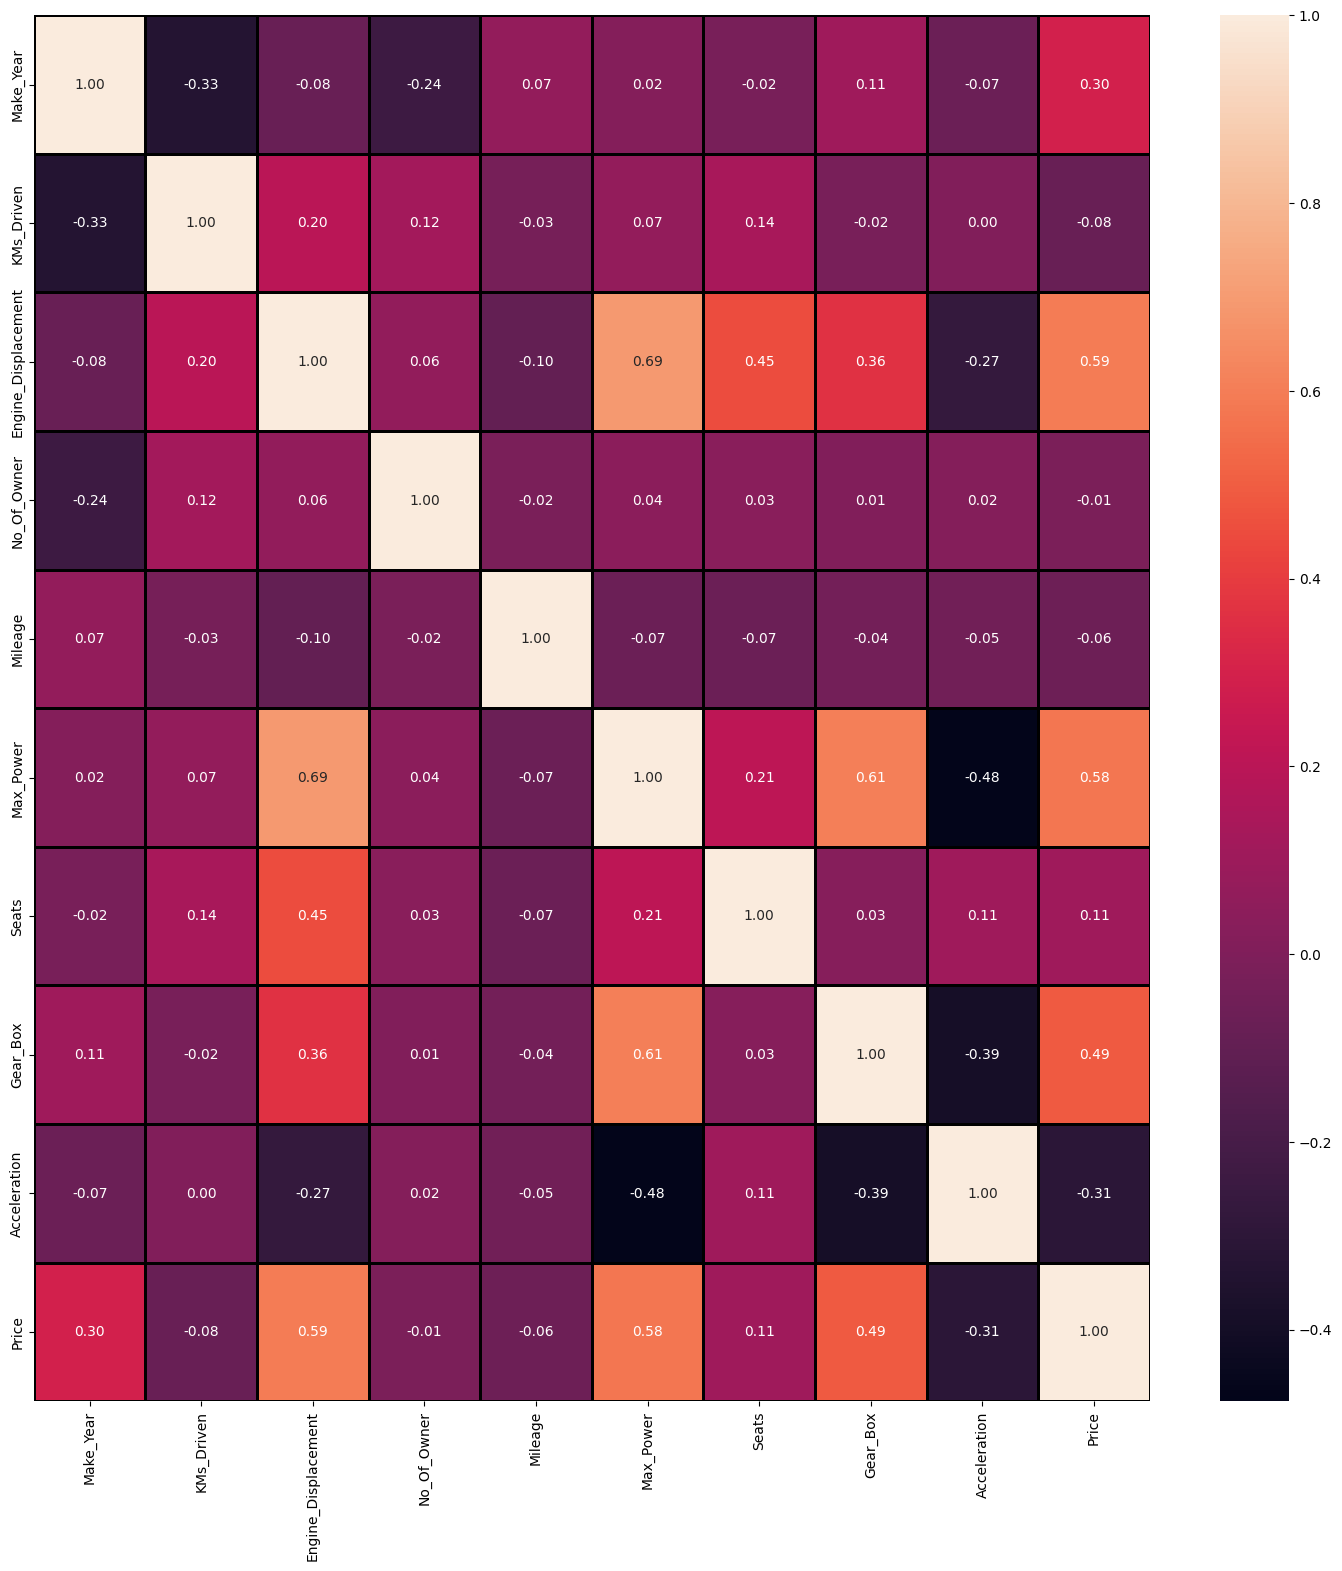

In [909]:
plt.figure(figsize = (18, 18))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, linewidths=1, linecolor='black', fmt='.2f')
plt.show()



Strong Positive Correlations:
- Make Year and Price: Newer cars tend to be more expensive.
- Engine Displacement, Max Power, and Torque: These variables are highly correlated, indicating that larger engines often produce more power and torque.
Moderate Positive Correlations:
- Acceleration and Price: Cars with higher acceleration tend to be more expensive.
- Mileage and No_Of_Owner: Cars with higher mileage often have more owners.
Negative Correlations:
- Mileage and Price: As mileage increases, the price tends to decrease.
- No_Of_Owner and Price: Cars with more owners tend to be less expensive.

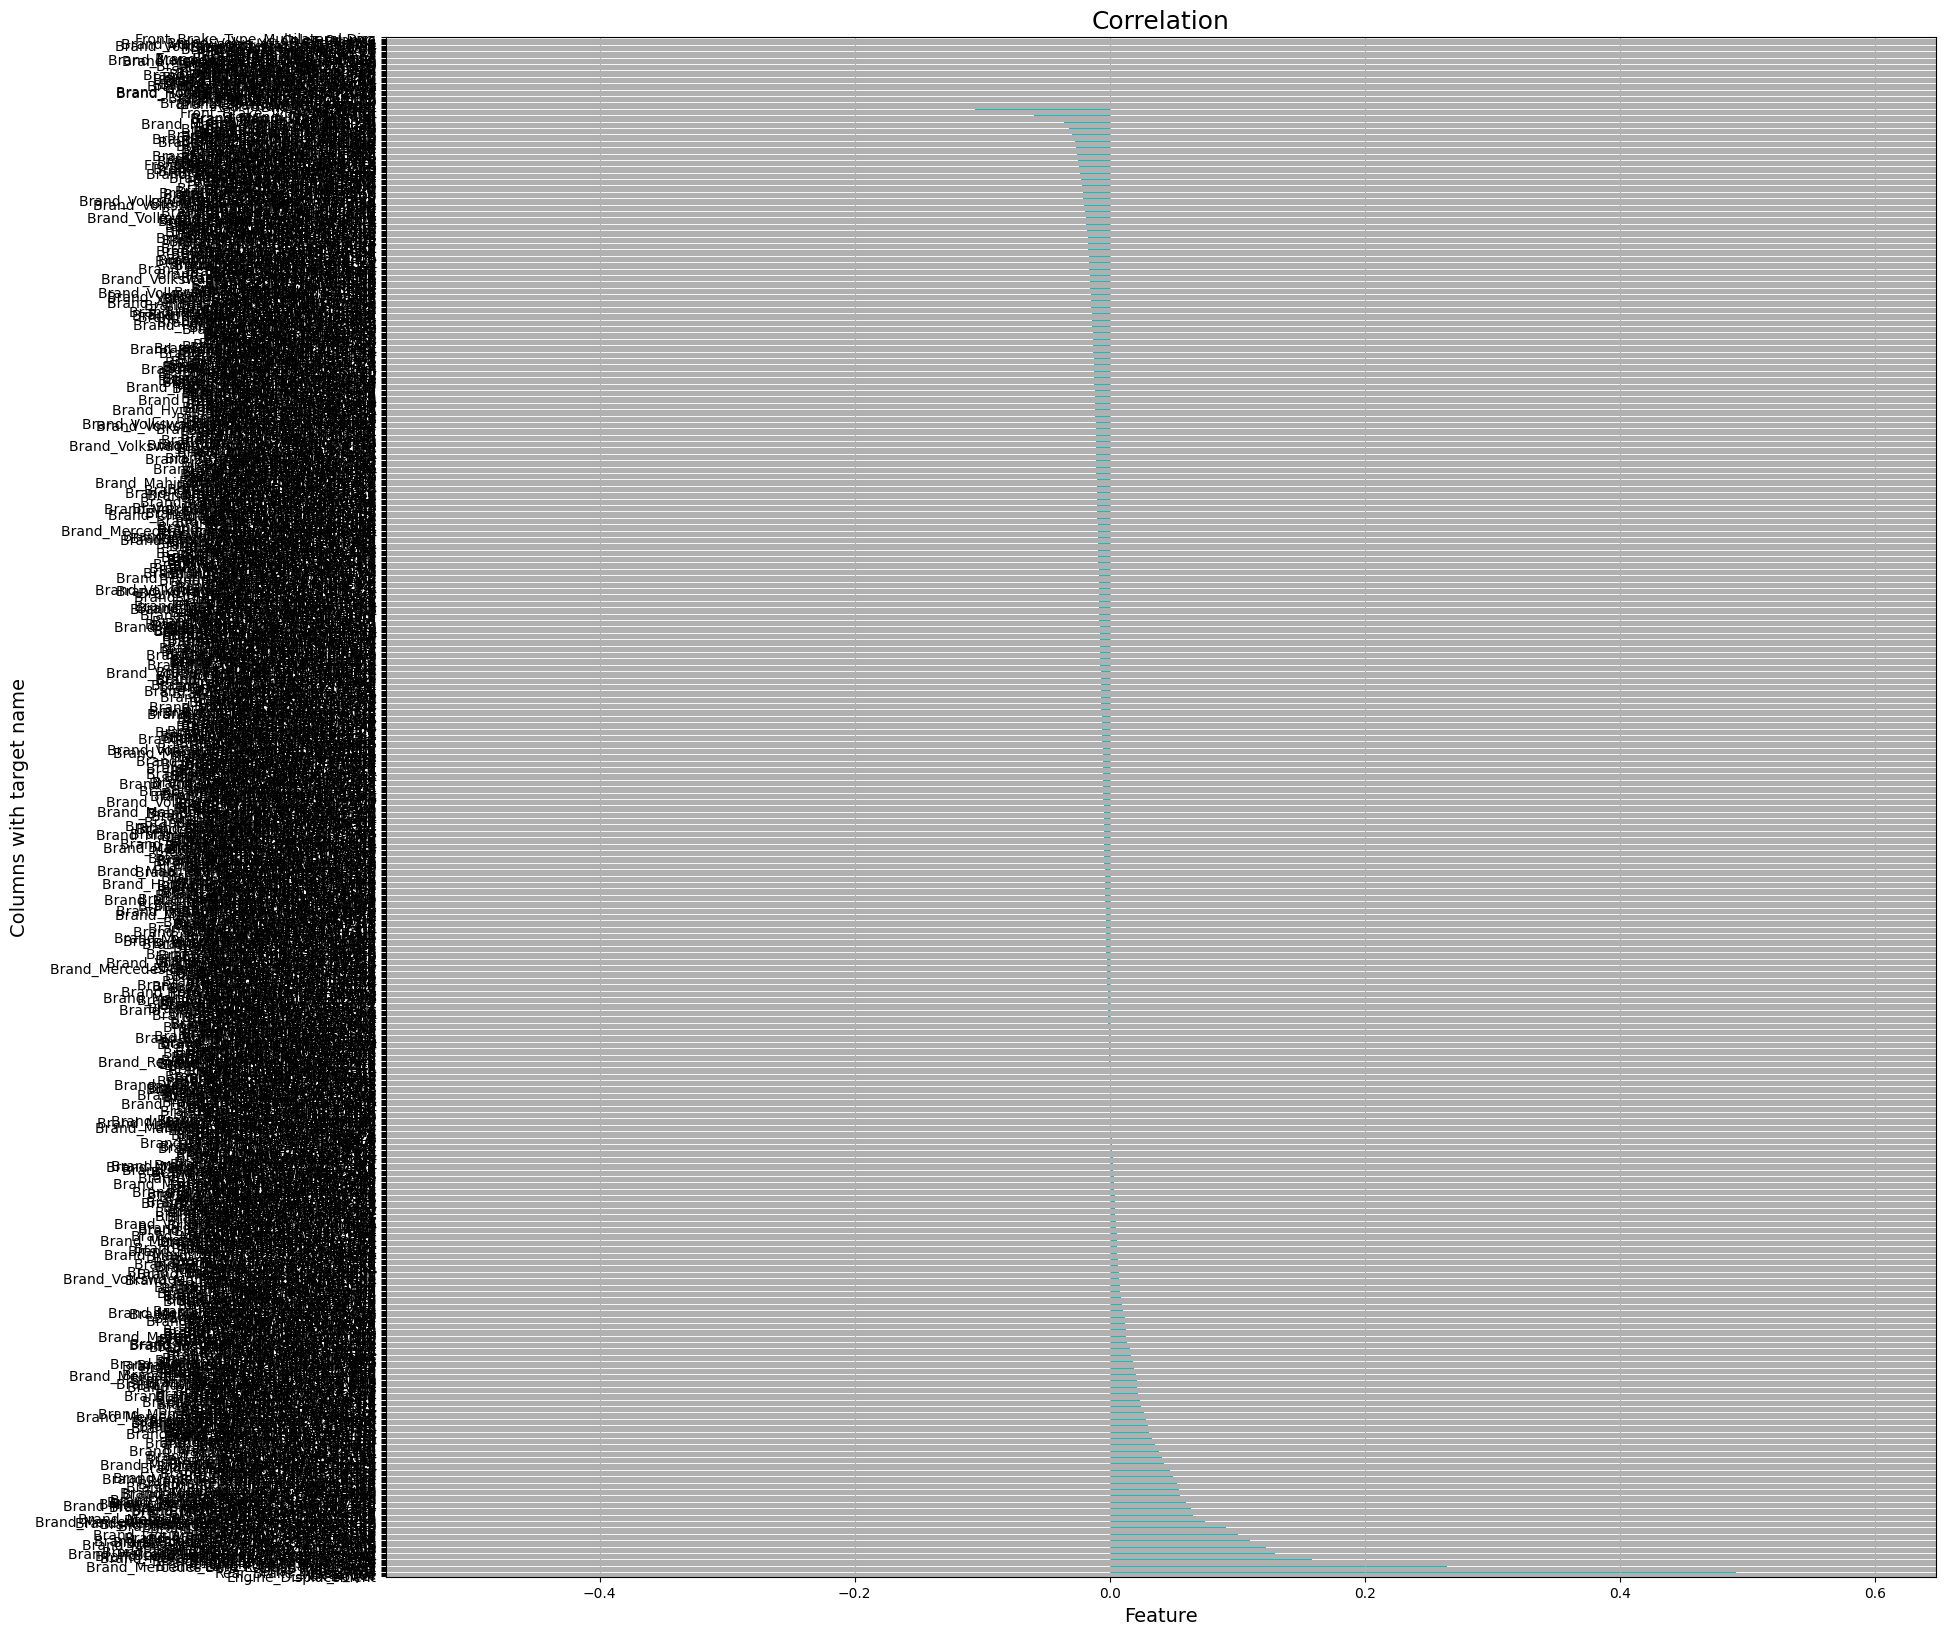

In [ ]:
plt.figure(figsize=(20,20))
data_new.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.grid(True)
plt.show()

Here we can see Features on the Right side of the 0.0 are having positive corelation with the target,  
and Features on the left of the 0.0 are having negative or 0 correlation.

#### Checking for Outliers

We will check the outliers present in the numerical columns.

<Axes: >

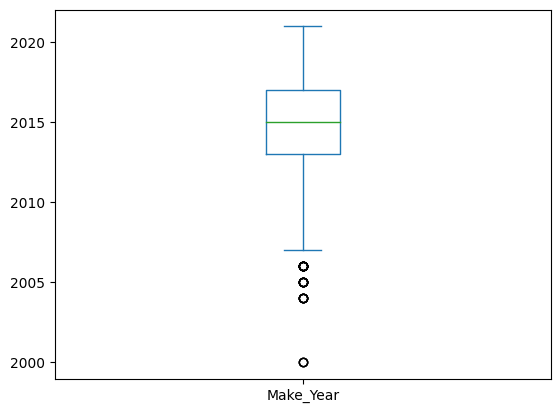

In [910]:
data_new['Make_Year'].plot.box()

In Make years we are having very less outliers, 

<Axes: >

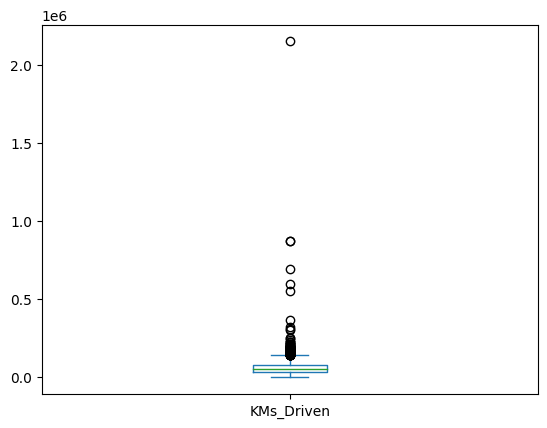

In [911]:
data_new['KMs_Driven'].plot.box()

We have many outlier in the KMs_Driven

<Axes: >

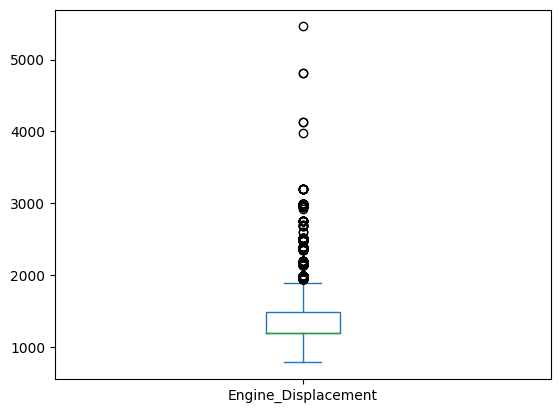

In [912]:
data_new['Engine_Displacement'].plot.box()

Engine_Displacement also having outliers 

<Axes: >

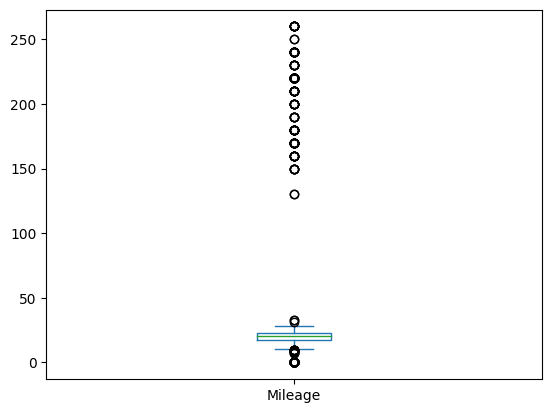

In [913]:
data_new['Mileage'].plot.box()

The values above 35 are outliers 

<Axes: >

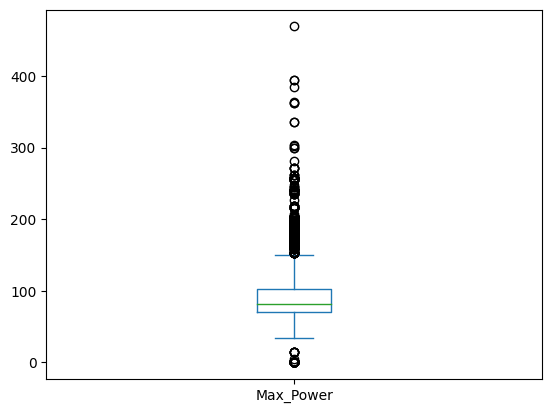

In [914]:
data_new['Max_Power'].plot.box()

Max_Power also having outliers 

<Axes: >

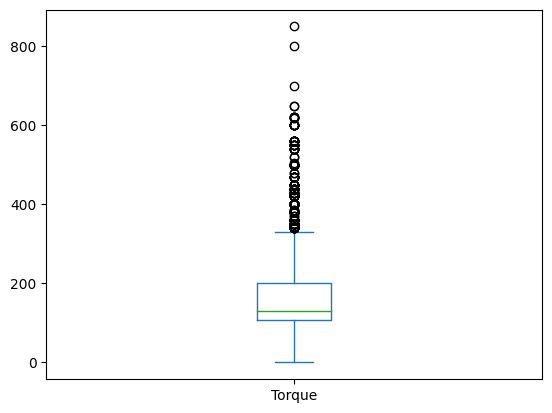

In [915]:
data_new['Torque'].plot.box()

We have outliers in Torque column also.

<Axes: >

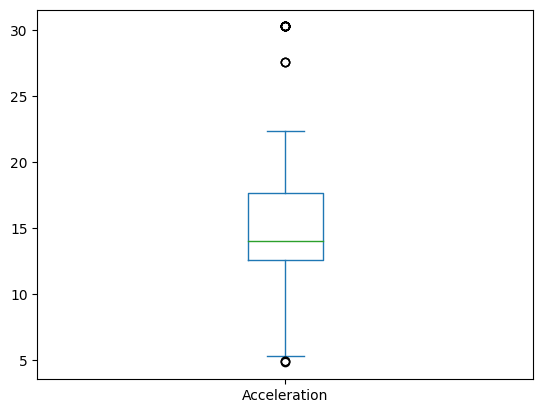

In [916]:
data_new['Acceleration'].plot.box()

#### Removing Outliers

In [917]:
from scipy.stats import zscore

z = np.abs(zscore(data_new))
outliers = np.where(z > 3)

In [918]:
df_new = data_new[(z<3).all(axis=1)]
print(data_new.shape)
print(df_new.shape)

(5035, 1300)
(0, 1300)


In [919]:
Loss_percentage=(5026-3252)/5026*100
print(Loss_percentage)

35.29645841623557


Here we can see loss percentage of the dats is 35.29 percentage, we will try other method lets check.

Lets Try IQR method to remove outlires.

In [920]:
Q1 = data_new.quantile(0.25)

Q3 = data_new.quantile(0.75)
IQR = Q3-Q1
print (IQR)

Make_Year                                            4.0
KMs_Driven                                       44703.0
Engine_Displacement                                301.0
No_Of_Owner                                          0.0
Mileage                                              5.1
Max_Power                                           32.2
Torque                                              91.8
Seats                                                0.0
Gear_Box                                             0.0
Acceleration                                         5.1
Price                                           330750.0
Brand_2008 Maruti Alto                               0.0
Brand_2009 Hyundai i10                               0.0
Brand_2009 Maruti Swift                              0.0
Brand_2009 Maruti Swift Dzire                        0.0
Brand_2010 Honda City                                0.0
Brand_2010 Hyundai i20                               0.0
Brand_2010 Maruti Alto         

In [922]:
df_IQR = data_new[~((data_new < (Q1-1.5*IQR)) | (data_new > (Q3+ 1.5*IQR))).any(axis=1)]
print(df_new.shape)

(0, 1300)


In [923]:
Loss_percentage=(5026-531)/5026*100
print(Loss_percentage)

89.43493832073219


The Percentage loss of data is nearly 90 percent, when using IQR method, we will no remove any oulier,
We will proceed to next step without removing them. 

#### Checking Skewness

In [924]:
data_new.skew()

Make_Year                                       -0.6
KMs_Driven                                      17.2
Engine_Displacement                              1.9
No_Of_Owner                                      2.9
Mileage                                          5.1
Max_Power                                        1.8
Torque                                           1.6
Seats                                            3.0
Gear_Box                                         2.4
Acceleration                                     0.2
Price                                            4.3
Brand_2008 Maruti Alto                          50.2
Brand_2009 Hyundai i10                          35.4
Brand_2009 Maruti Swift                         50.2
Brand_2009 Maruti Swift Dzire                   40.9
Brand_2010 Honda City                           71.0
Brand_2010 Hyundai i20                          35.4
Brand_2010 Maruti Alto                          35.4
Brand_2010 Maruti Alto K10                    

In [925]:
# Lets remove the skewness
data_new['KMs_Driven'] = np.sqrt( data_new['KMs_Driven'] )
data_new['Engine_Displacement'] = np.sqrt( data_new['Engine_Displacement'] )
data_new['Mileage'] = np.sqrt( data_new['Mileage'] )
data_new['Max_Power'] = np.sqrt( data_new['Max_Power'] )
data_new['Torque'] = np.sqrt( data_new['Torque'] )
data_new['Acceleration'] = np.sqrt( data_new['Acceleration'] )


### Feature Scaling and Feature Selection

In [928]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from joblib import Parallel, delayed

# Separate the features (X) and the target variable (y)
X = data_new.drop(columns=['Price'])
y = data_new['Price']

# 2. Check for missing values and handle them
print("Missing values before imputation:")
print(X.isnull().sum())

Missing values before imputation:
Make_Year                                        0
KMs_Driven                                       0
Engine_Displacement                              0
No_Of_Owner                                      0
Mileage                                          0
Max_Power                                        0
Torque                                           0
Seats                                            0
Gear_Box                                         0
Acceleration                                     0
Brand_2008 Maruti Alto                           0
Brand_2009 Hyundai i10                           0
Brand_2009 Maruti Swift                          0
Brand_2009 Maruti Swift Dzire                    0
Brand_2010 Honda City                            0
Brand_2010 Hyundai i20                           0
Brand_2010 Maruti Alto                           0
Brand_2010 Maruti Alto K10                       0
Brand_2010 Maruti Swift                         

In [929]:
X.shape, y.shape

((5035, 1299), (5035,))

In [930]:
# Replace infinite values with NaN (in case any are present)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill any remaining NaNs with median values or handle them as appropriate
X.fillna(X.median(), inplace=True)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check for NaNs after scaling
if np.isnan(X_scaled).any():
    print("NaN values found after scaling.")

# Convert scaled features back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


#### Recursive Feature Elimination

In [ ]:

# Initialize the model for RFE with a higher step size to reduce the iterations
model = LinearRegression()
n_features_to_select = 20
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=5)

# Fit RFE on the data
X_rfe = rfe.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[rfe.support_].tolist()

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rfe)

# Convert to DataFrame with selected feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Calculate VIF in parallel
def calculate_vif(i):
    return variance_inflation_factor(X_scaled_df.values, i)

vif_values = Parallel(n_jobs=-1)(delayed(calculate_vif)(i) for i in range(X_scaled_df.shape[1]))

# Create VIF DataFrame
vif_data = pd.DataFrame({
    "Feature": selected_features,
    "VIF": vif_values
})

print(vif_data)
print(f"Selected Features:\n{selected_features}")



KeyboardInterrupt: 

#### Select KBest

In [ ]:
# Apply SelectKBest

# Select 20 best features
k = 20
selector = SelectKBest(score_func=f_regression, k=k)
X_kbest = selector.fit_transform(X_scaled, y)  # Apply to X_scaled_df, not X_scaled

# Get the names of the selected features
selected_features = X_scaled.columns[selector.get_support()]  # Match columns with selector support mask

# Convert selected features back to a DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

print(f"Selected Features:\n{selected_features}")
X_kbest_df.head()

Selected Features:
Index(['Make_Year', 'Engine_Displacement', 'Max_Power', 'Torque', 'Gear_Box',
       'Acceleration', 'Brand_BMW 3 Series 320d', 'Brand_BMW 6 Series GT',
       'Brand_BMW X3 xDrive 20d', 'Brand_Land Rover Range Rover',
       'Brand_Mercedes-Benz E-Class Exclusive E',
       'Brand_Porsche Panamera Diesel', 'Fuel_Diesel', 'Fuel_Petrol',
       'Transmission_Manual', 'Drive_Type_AWD', 'Drive_Type_FWD',
       'Drive_Type_RWD', 'Rear_Brake_Type_Discs', 'Rear_Brake_Type_Drum'],
      dtype='object')


Make_Year  Engine_Displacement  Max_Power  Torque  Gear_Box  Acceleration  \
0       -0.3                 -0.3       -0.3     0.4      -0.4           0.1   
1       -1.0                  0.1       -0.5     0.1      -0.4           0.1   
2        0.7                 -0.3        0.0     0.5      -0.4          -0.3   
3        0.0                  0.1        0.0     0.7       0.8           0.2   
4       -1.0                  0.1        0.1    -2.1       0.8          -0.4   

   Brand_BMW 3 Series 320d  Brand_BMW 6 Series GT  Brand_BMW X3 xDrive 20d  \
0                     -0.1                   -0.0                     -0.0   
1                     -0.1                   -0.0                     -0.0   
2                     -0.1                   -0.0                     -0.0   
3                     -0.1                   -0.0                     -0.0   
4                     -0.1                   -0.0                     -0.0   

   Brand_Land Rover Range Rover  Brand_Mercedes-Benz E-Class Exclusive E  \
0                          -0.0                                     -0.0   
1                          -0.0                                     -0.0   
2                          -0.0                                     -0.0   
3                          -0.0                                     -0.0   
4                          -0.0                                     -0.0   

   Brand_Porsche Panamera Diesel  Fuel_Diesel  Fuel_Petrol  \
0                           -0.0          1.2         -1.2   
1                           -0.0          1.2         -1.2   
2                           -0.0          1.2         -1.2   
3                           -0.0          1.2         -1.2   
4                           -0.0          1.2         -1.2   

   Transmission_Manual  Drive_Type_AWD  Drive_Type_FWD  Drive_Type_RWD  \
0                  0.5            -0.2             0.4            -0.2   
1                  0.5            -0.2             0.4            -0.2   
2                  0.5            -0.2             0.4            -0.2   
3                  0.5            -0.2             0.4            -0.2   
4                  0.5            -0.2             0.4            -0.2   

   Rear_Brake_Type_Discs  Rear_Brake_Type_Drum  
0                   -0.4                   0.4  
1                   -0.4                   0.4  
2                    2.5                  -2.5  
3                   -0.4                   0.4  
4                   -0.4                   0.4

In [938]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_kbest_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_kbest_df.values, i) for i in range(X_kbest_df.shape[1])]

# Display features with high VIF
print(vif_data)


                                    Feature  VIF
0                                 Make_Year  1.1
1                       Engine_Displacement  2.5
2                                 Max_Power  2.7
3                                    Torque  3.8
4                                  Gear_Box  1.8
5                              Acceleration  1.4
6                   Brand_BMW 3 Series 320d  1.1
7                     Brand_BMW 6 Series GT  1.0
8                   Brand_BMW X3 xDrive 20d  1.0
9              Brand_Land Rover Range Rover  1.0
10  Brand_Mercedes-Benz E-Class Exclusive E  1.0
11            Brand_Porsche Panamera Diesel  1.0
12                              Fuel_Diesel  inf
13                              Fuel_Petrol  inf
14                      Transmission_Manual  1.4
15                           Drive_Type_AWD  2.5
16                           Drive_Type_FWD  4.0
17                           Drive_Type_RWD  3.0
18                    Rear_Brake_Type_Discs  inf
19                  

In [939]:
X_kbest_df = X_kbest_df.drop(columns=['Fuel_Petrol', 'Rear_Brake_Type_Drum'])


In [940]:
# Recalculate VIF after dropping features
vif_data = pd.DataFrame()
vif_data["Feature"] = X_kbest_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_kbest_df.values, i) for i in range(X_kbest_df.shape[1])]
print(vif_data)


                                    Feature  VIF
0                                 Make_Year  1.1
1                       Engine_Displacement  2.5
2                                 Max_Power  2.7
3                                    Torque  3.8
4                                  Gear_Box  1.8
5                              Acceleration  1.4
6                   Brand_BMW 3 Series 320d  1.1
7                     Brand_BMW 6 Series GT  1.0
8                   Brand_BMW X3 xDrive 20d  1.0
9              Brand_Land Rover Range Rover  1.0
10  Brand_Mercedes-Benz E-Class Exclusive E  1.0
11            Brand_Porsche Panamera Diesel  1.0
12                              Fuel_Diesel  2.0
13                      Transmission_Manual  1.4
14                           Drive_Type_AWD  2.5
15                           Drive_Type_FWD  4.0
16                           Drive_Type_RWD  3.0
17                    Rear_Brake_Type_Discs  2.0


In [941]:
X_kbest_df.columns

Index(['Make_Year', 'Engine_Displacement', 'Max_Power', 'Torque', 'Gear_Box',
       'Acceleration', 'Brand_BMW 3 Series 320d', 'Brand_BMW 6 Series GT',
       'Brand_BMW X3 xDrive 20d', 'Brand_Land Rover Range Rover',
       'Brand_Mercedes-Benz E-Class Exclusive E',
       'Brand_Porsche Panamera Diesel', 'Fuel_Diesel', 'Transmission_Manual',
       'Drive_Type_AWD', 'Drive_Type_FWD', 'Drive_Type_RWD',
       'Rear_Brake_Type_Discs'],
      dtype='object')

#### Principal Component Analysis

In [942]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


X = data_new.drop(columns=['Price'])  # Features
y = data_new['Price']  # Target variable

# Check for any NaN values in X
print("Checking for NaNs in the dataset before transformation:")
print(X.isna().sum())  

# Replace infinite values with NaN (in case any are present)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill any remaining NaNs with median values or handle them as appropriate
X.fillna(X.median(), inplace=True)

Checking for NaNs in the dataset before transformation:
Make_Year                                        0
KMs_Driven                                       0
Engine_Displacement                              0
No_Of_Owner                                      0
Mileage                                          0
Max_Power                                        0
Torque                                           0
Seats                                            0
Gear_Box                                         0
Acceleration                                     0
Brand_2008 Maruti Alto                           0
Brand_2009 Hyundai i10                           0
Brand_2009 Maruti Swift                          0
Brand_2009 Maruti Swift Dzire                    0
Brand_2010 Honda City                            0
Brand_2010 Hyundai i20                           0
Brand_2010 Maruti Alto                           0
Brand_2010 Maruti Alto K10                       0
Brand_2010 Maruti Swift   

In [943]:
# Scaling the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

# Check for NaNs after scaling
if np.isnan(X_scaled).any():
    print("NaN values found after scaling.")

# Apply PCA to reduce dimensionality (keeping 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA Transformed Shape: {X_pca.shape}") 

PCA Transformed Shape: (5035, 1151)


In [944]:
# Feature selection using RandomForestRegressor on PCA-transformed data
rf_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf_model.fit(X_pca, y)

# Get feature importances from the PCA components
feature_importances = pd.DataFrame(rf_model.feature_importances_, columns=['importance'], index=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Selecting the top features
top_important_features = feature_importances.nlargest(50, 'importance').index
print("Top Important PCA Components (based on RandomForest):")
print(top_important_features)

# Feature selection using Lasso on PCA-transformed data
lasso = Lasso(alpha=0.01, random_state=42)
lasso_selector = SelectFromModel(lasso, threshold='mean')  # Select features above the mean importance
lasso_selector.fit(X_pca, y)

# Get the boolean mask for the selected features
selected_features_mask = lasso_selector.get_support()

# Get the corresponding PCA feature names
selected_pca_features = [f'PC{i+1}' for i in range(X_pca.shape[1]) if selected_features_mask[i]]
print("Selected PCA components based on Lasso:", selected_pca_features)


Top Important PCA Components (based on RandomForest):
Index(['PC1', 'PC2', 'PC33', 'PC4', 'PC329', 'PC19', 'PC560', 'PC312', 'PC761',
       'PC23', 'PC28', 'PC184', 'PC10', 'PC22', 'PC237', 'PC772', 'PC43',
       'PC41', 'PC222', 'PC71', 'PC155', 'PC20', 'PC84', 'PC178', 'PC161',
       'PC69', 'PC27', 'PC330', 'PC13', 'PC777', 'PC44', 'PC15', 'PC150',
       'PC199', 'PC50', 'PC45', 'PC59', 'PC200', 'PC74', 'PC223', 'PC47',
       'PC116', 'PC26', 'PC778', 'PC83', 'PC38', 'PC72', 'PC982', 'PC601',
       'PC52'],
      dtype='object')
Selected PCA components based on Lasso: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC9', 'PC10', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC39', 'PC41', 'PC42', 'PC45', 'PC47', 'PC49', 'PC54', 'PC56', 'PC68', 'PC69', 'PC71', 'PC73', 'PC79', 'PC80', 'PC84', 'PC85', 'PC89', 'PC90', 'PC110', 'PC111', 'PC1

In [945]:
# Get the intersection of top features from RandomForest and Lasso
common_features = list(set(top_important_features) & set(selected_pca_features))

print("Common PCA Components based on RandomForest and Lasso:")
print(common_features)


Common PCA Components based on RandomForest and Lasso:
['PC84', 'PC312', 'PC28', 'PC23', 'PC10', 'PC761', 'PC26', 'PC1', 'PC150', 'PC237', 'PC20', 'PC27', 'PC161', 'PC13', 'PC777', 'PC178', 'PC22', 'PC33', 'PC329', 'PC47', 'PC2', 'PC601', 'PC69', 'PC71', 'PC15', 'PC19', 'PC155', 'PC41', 'PC4', 'PC184', 'PC45']


In [946]:

# Create a DataFrame with selected PCA components
X_pca_selected = pd.DataFrame(
    X_pca[:, [int(f[2:]) - 1 for f in common_features]], 
    columns=common_features
)

X_pca_selected.head(3)


PC84  PC312  PC28  PC23  PC10  PC761  PC26  PC1  PC150  PC237  PC20  PC27  \
0  -0.2    0.4   0.2  -1.8  -0.7    0.5   0.3  0.2   -0.2   -0.4  -0.1  -0.7   
1  -0.0    0.0  -0.3   0.5  -0.2   -0.1   0.7 -0.0   -0.3    0.6   0.1  -0.2   
2  -0.1   -1.0  -1.1   1.0  -0.2    0.1   0.4  2.1   -0.6   -0.1   0.1   0.7   

   PC161  PC13  PC777  PC178  PC22  PC33  PC329  PC47  PC2  PC601  PC69  PC71  \
0    0.2   0.2    0.0   -0.0  -0.3   1.3    0.6   0.1  2.5   -0.0   0.2   0.5   
1   -0.4  -1.7    0.1   -1.2  -0.3  -0.7   -0.2   0.0  3.1    0.0  -0.0  -0.0   
2    0.1   1.7   -0.1   -0.6   0.2   2.0    0.4   0.6  0.0    0.0  -0.0   0.3   

   PC15  PC19  PC155  PC41  PC4  PC184  PC45  
0  -1.4  -0.2    0.1  -0.1 -0.9    0.0   0.0  
1   0.1   0.4    0.3  -0.0  0.1   -1.1   0.1  
2   0.5   2.6   -0.4   0.1 -0.1    0.5  -0.6

In [947]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])], index=X.columns)
loadings_selected = loadings[common_features]

# Display the loadings for each selected principal component
for pc in common_features:
    print(f"\nTop features contributing to {pc}:")
    print(loadings[pc].sort_values(ascending=False).head(10))


Top features contributing to PC84:
Brand_2015 Maruti Ciaz            0.5
Brand_2017 Maruti Wagon R         0.3
Brand_2015 Maruti Swift Dzire     0.3
Brand_Maruti Alto K10 2010-2014   0.2
Brand_Ford EcoSport 1.5 DV5       0.2
Brand_Toyota Innova 2.5 VX        0.2
Brand_Maruti Alto K10 VXI         0.1
Brand_2015 Maruti Wagon R         0.1
Brand_Tata Tiago 1.2 Revotron     0.1
Brand_Hyundai Creta 1.6 SX        0.1
Name: PC84, dtype: float64

Top features contributing to PC312:
Brand_Mercedes-Benz E-Class Exclusive E   0.4
Brand_Hyundai Verna 1.6 VTVT              0.2
Brand_Volkswagen Ameo 1.2 MPI             0.2
Brand_2015 Volkswagen Polo                0.2
Brand_2017 Volkswagen Polo                0.2
Brand_Hyundai Creta 1.4 CRDi              0.2
Brand_Maruti Swift LDI                    0.2
Brand_Mitsubishi Pajero Sport 4X4         0.1
Brand_Jaguar XE Prestige                  0.1
Brand_2017 Ford Figo                      0.1
Name: PC312, dtype: float64

Top features contributing to PC

## MODELING


In [948]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline

### Modeling based on Select KBest Features

#### Linear Regression and Decison Tree Models

In [949]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_kbest_df, y, test_size=0.2, random_state=42)

# Define the parameter grids for hyperparameter tuning
linear_params = {
    'linearregressor__fit_intercept': [True, False]
}

tree_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']  
}

# Create a pipeline for Linear Regression 
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('linearregressor', LinearRegression())  
])

# Linear Regression with GridSearchCV
linear_grid_search = GridSearchCV(linear_pipeline, linear_params, cv=5, scoring='neg_mean_squared_error')
linear_grid_search.fit(X_train, y_train)

# Best Linear Regression model
best_linear_model = linear_grid_search.best_estimator_
y_pred_linear = best_linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression Results")
print("Best Parameters:", linear_grid_search.best_params_)
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)
print()

# Decision Tree Regression with GridSearchCV
tree_model = DecisionTreeRegressor(random_state=42)
tree_grid_search = GridSearchCV(tree_model, tree_params, cv=5, scoring='neg_mean_squared_error', error_score='raise')
tree_grid_search.fit(X_train, y_train)

# Best Decision Tree model
best_dt_model = tree_grid_search.best_estimator_
y_pred_tree = best_dt_model.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression Results")
print("Best Parameters:", tree_grid_search.best_params_)
print("Mean Squared Error:", tree_mse)
print("R-squared:", tree_r2)


Linear Regression Results
Best Parameters: {'linearregressor__fit_intercept': True}
Mean Squared Error: 217513729342.1555
R-squared: 0.5968643308507156

Decision Tree Regression Results
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error: 107045898047.04897
R-squared: 0.8016032373248466


#### Random Forest Regressor

In [950]:

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('randomforest', RandomForestRegressor(random_state=42))
])
# Define the parameter grid for Random Forest Regressor
rf_params = {
    'n_estimators': [100, 150, 200],  # Number of trees
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],        # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV to search over hyperparameters with fewer iterations
rf_random_search = RandomizedSearchCV(rf_model, rf_params, n_iter=10, cv=5, 
                                      scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
rf_random_search.fit(X_train, y_train)

# Best Random Forest model
best_rf_model = rf_random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)  # RMSE is the square root of MSE
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Display the results
print("Random Forest Regressor Results")
print("Best Parameters:", rf_random_search.best_params_)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R-squared:", rf_r2)
print("Mean Absolute Error (MAE):", rf_mae)


Random Forest Regressor Results
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Mean Squared Error (MSE): 122211302905.90637
Root Mean Squared Error (RMSE): 349587.33230182464
R-squared: 0.7734959741457108
Mean Absolute Error (MAE): 130078.20996308987


#### Gradient Boosting Regressor

In [951]:

# Gradient Boosting Pipeline
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gradientboosting', GradientBoostingRegressor(random_state=42))
])
# Define the parameter grid for Gradient Boosting Regressor
gb_params = {
    'n_estimators': [100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinking
    'max_depth': [3, 5, 10],  # Maximum depth of individual trees
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum samples required at a leaf node
    'subsample': [0.8, 1.0]  # Fraction of samples used for fitting
}

# Create a Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Use RandomizedSearchCV to search over hyperparameters with fewer iterations
gb_random_search = RandomizedSearchCV(gb_model, gb_params, n_iter=10, cv=5, 
                                      scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
gb_random_search.fit(X_train, y_train)

# Best Gradient Boosting model
best_gb_model = gb_random_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_rmse = np.sqrt(gb_mse)  # RMSE is the square root of MSE
gb_mae = mean_absolute_error(y_test, y_pred_gb)

# Display the results
print("Gradient Boosting Regressor Results")
print("Best Parameters:", gb_random_search.best_params_)
print("Mean Squared Error (MSE):", gb_mse)
print("Root Mean Squared Error (RMSE):", gb_rmse)
print("R-squared:", gb_r2)
print("Mean Absolute Error (MAE):", gb_mae)


Gradient Boosting Regressor Results
Best Parameters: {'subsample': 0.8, 'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}
Mean Squared Error (MSE): 104661130450.41655
Root Mean Squared Error (RMSE): 323513.72528907727
R-squared: 0.8060231186985031
Mean Absolute Error (MAE): 124879.71729697126


### Modeling on PCA Data

In [ ]:
# Check the shapes
print(X_pca_selected.shape) 
print(data_new.shape)      
print(y.shape)              

In [ ]:
# Split the data into training and testing sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_pca_selected, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_b)
X_test_scaled = scaler.transform(X_test_b)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from joblib import Parallel, delayed

# Initialize models
rf_model2 = RandomForestRegressor(random_state=42)
gb_model2 = GradientBoostingRegressor(random_state=42)
dt_model2 = DecisionTreeRegressor(random_state=42)

# Optimized Hyperparameter tuning grids
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt_param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Parallelized random search function
def random_search(estimator, param_grid, X, y):
    search = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, n_iter=8, cv=3, random_state=42, n_jobs=-1)
    search.fit(X, y)
    return search.best_estimator_

# Run searches in parallel
best_rf_model2, best_gb_model2, best_dt_model2 = Parallel(n_jobs=3)(
    delayed(random_search)(model, param_grid, X_train_pca, y_train_b)
    for model, param_grid in zip([rf_model2, gb_model2, dt_model2], [rf_param_grid, gb_param_grid, dt_param_grid])
)

# Output best models
best_rf_model2, best_gb_model2, best_dt_model2

In [ ]:
# Define an evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Predict and evaluate each model
y_pred_rf = best_rf_model2.predict(X_test_pca)
y_pred_gb = best_gb_model2.predict(X_test_pca)
y_pred_dt = best_dt_model2.predict(X_test_pca)

# Evaluate Random Forest
rf_mse, rf_rmse, rf_mae, rf_r2 = evaluate_model(y_test_b, y_pred_rf)
print("Random Forest Results")
print(f"MSE: {rf_mse}, RMSE: {rf_rmse}, MAE: {rf_mae}, R-squared: {rf_r2}\n")

# Evaluate Gradient Boosting
gb_mse, gb_rmse, gb_mae, gb_r2 = evaluate_model(y_test_b, y_pred_gb)
print("Gradient Boosting Results")
print(f"MSE: {gb_mse}, RMSE: {gb_rmse}, MAE: {gb_mae}, R-squared: {gb_r2}\n")

# Evaluate Decision Tree
dt_mse, dt_rmse, dt_mae, dt_r2 = evaluate_model(y_test_b, y_pred_dt)
print("Decision Tree Results")
print(f"MSE: {dt_mse}, RMSE: {dt_rmse}, MAE: {dt_mae}, R-squared: {dt_r2}\n")

## EVALUATION

### Models based on SelectKBest

Linear Regression Evaluation Results
Mean Squared Error (MSE): 217513729342.1555
Root Mean Squared Error (RMSE): 466383.67182198336
R-squared: 0.5968643308507156
Mean Absolute Error (MAE): 248710.33018747246



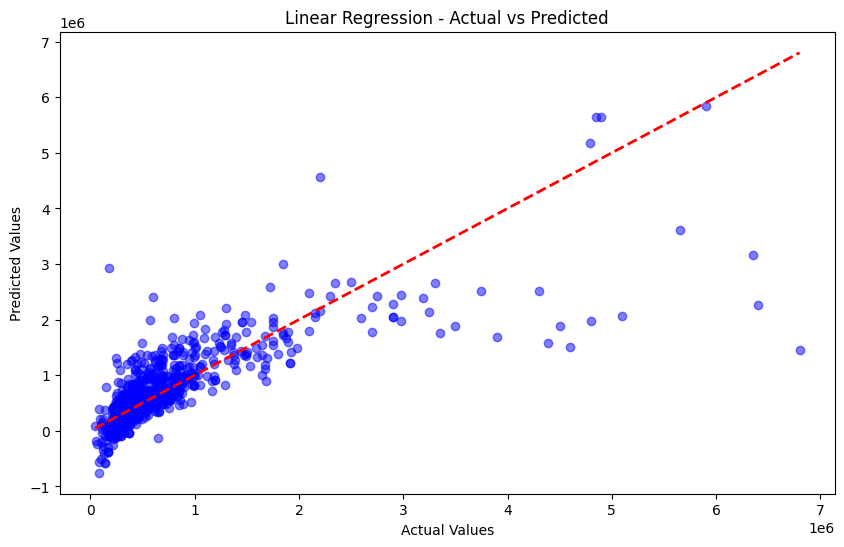

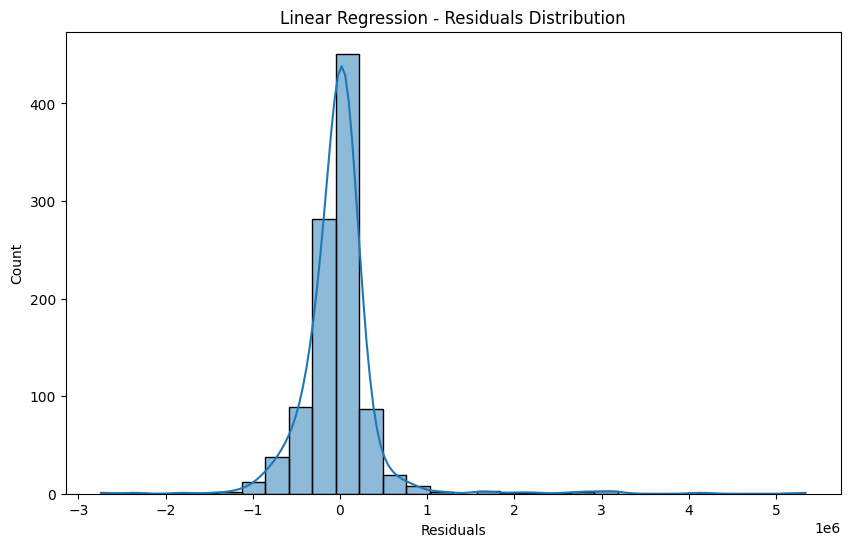

Decision Tree Regressor Evaluation Results
Mean Squared Error (MSE): 107045898047.04897
Root Mean Squared Error (RMSE): 327178.69436601305
R-squared: 0.8016032373248466
Mean Absolute Error (MAE): 134542.1696556648



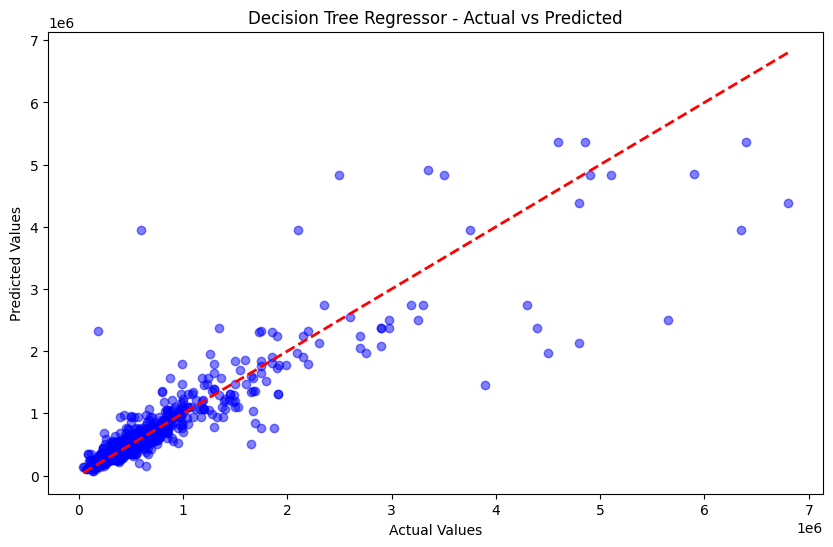

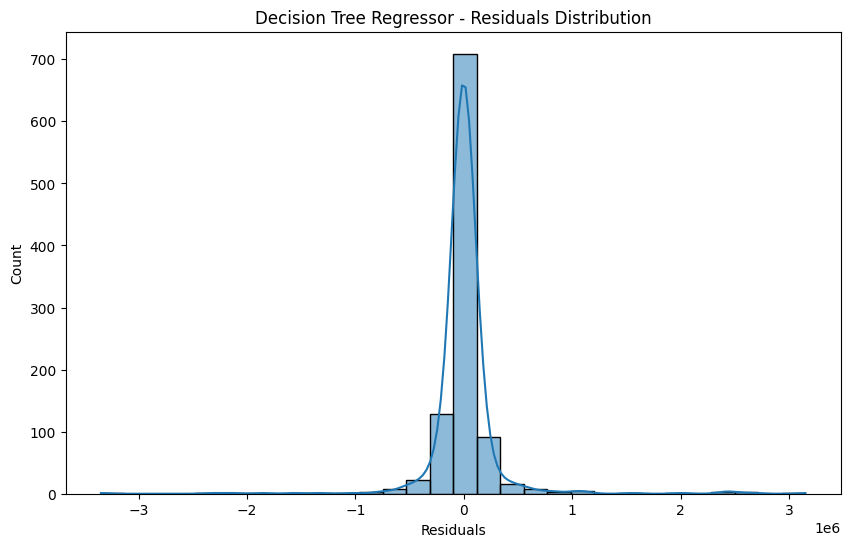

Random Forest Regressor Evaluation Results
Mean Squared Error (MSE): 122211302905.90637
Root Mean Squared Error (RMSE): 349587.33230182464
R-squared: 0.7734959741457108
Mean Absolute Error (MAE): 130078.20996308987



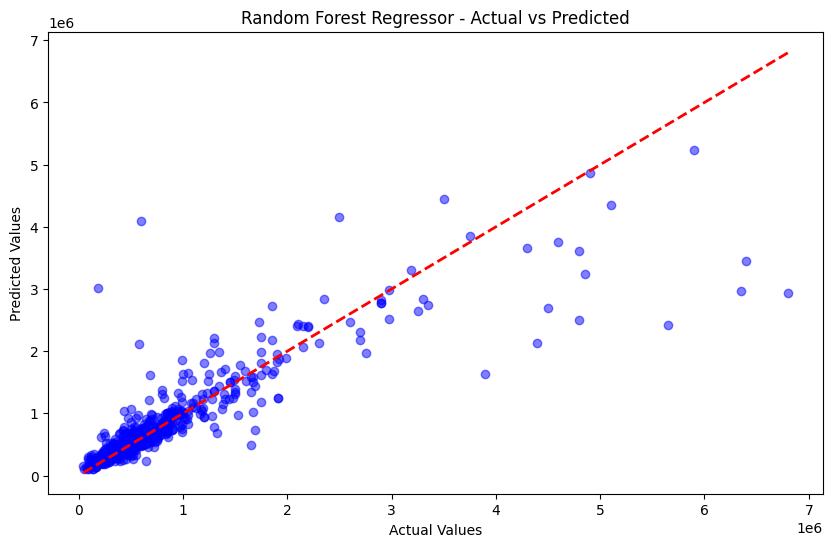

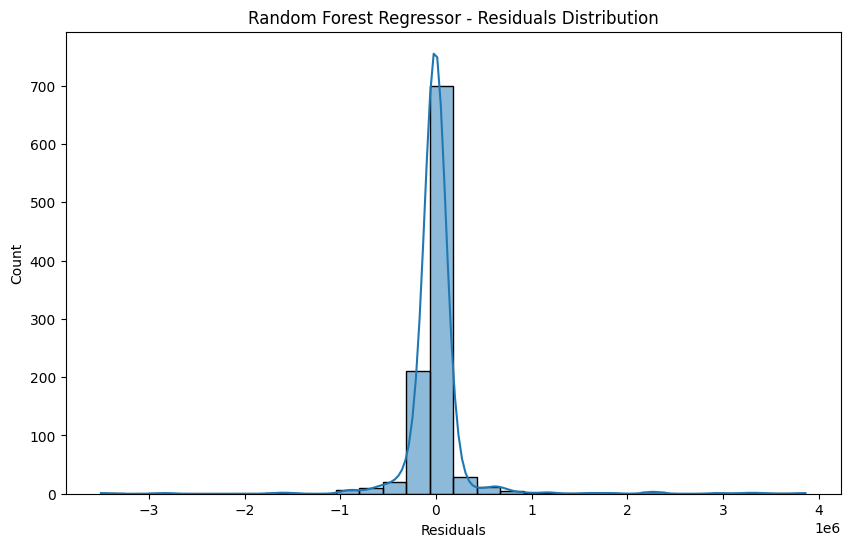

Gradient Boosting Regressor Evaluation Results
Mean Squared Error (MSE): 104661130450.41655
Root Mean Squared Error (RMSE): 323513.72528907727
R-squared: 0.8060231186985031
Mean Absolute Error (MAE): 124879.71729697126



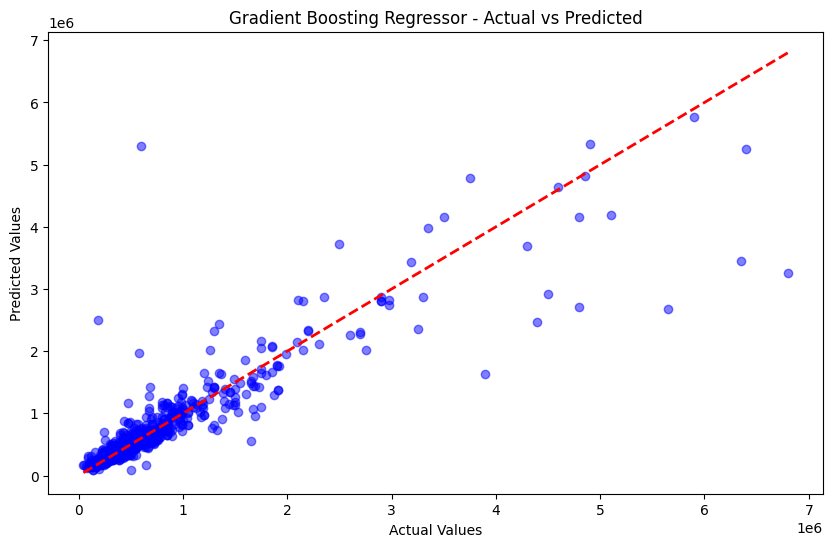

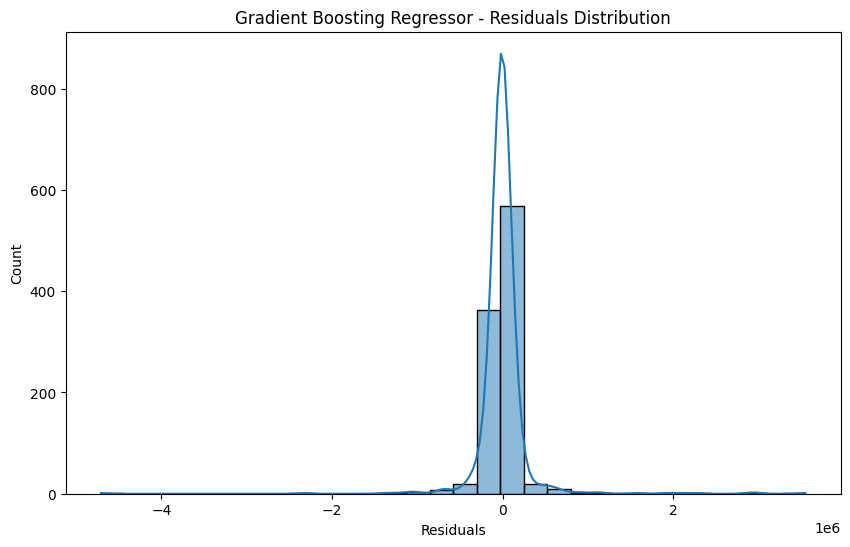

In [952]:

# Function to evaluate and visualize model performance
def evaluate_model(model, X_test, y_test, model_name):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{model_name} Evaluation Results")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared:", r2)
    print("Mean Absolute Error (MAE):", mae)
    print()
    
    # Plotting Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.show()
    
    # Plotting Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.xlabel("Residuals")
    plt.title(f"{model_name} - Residuals Distribution")
    plt.show()

# Evaluate each model
evaluate_model(best_linear_model, X_test, y_test, "Linear Regression")
evaluate_model(best_dt_model, X_test, y_test, "Decision Tree Regressor")
evaluate_model(best_rf_model, X_test, y_test, "Random Forest Regressor")
evaluate_model(best_gb_model, X_test, y_test, "Gradient Boosting Regressor")

#### Analysis of Model's Perfomance

Train-Test Split: 80% - 20%

1. Linear Regression
Mean Squared Error (MSE): 
Root Mean Squared Error (RMSE): 
R-squared (R²): 05969
Mean Absolute Error (MAE): 
Analysis:
- The MSE and RMSE are quite large, indicating that the model's predictions have a significant deviation from the true values.
- R-squared is 0.5969, which suggests the model explains about 59.7% of the variance in the target variable. This is a decent result but shows room for improvement.
- The MAE of indicates that, on average, the model's predictions are off by around 250,000 units, which is considerable depending on the scale of your target variable.
- Highest errors (MSE, RMSE, and MAE) compared to other models.
- Linear Regression performs poorly, likely due to its inability to handle nonlinear relationships or complex interactions in the data.
  
1. Decision Tree Regressor
Mean Squared Error (MSE): 
Root Mean Squared Error (RMSE): 
R-squared (R²): 0.8016
Mean Absolute Error (MAE): 155,132.03
Analysis:
- The MSE and RMSE values are significantly lower than those of Linear Regression, suggesting better predictive accuracy.
- The R-squared value of 0.8016 indicates that the model explains about 80.2% of the variance in the target variable, which is an improvement over Linear Regression.
- The MAE is also lower , showing the model's predictions are, on average, closer to the actual values.
- Moderate RMSE and MAE but still slightly behind Gradient Boosting.
-Maybe overfitting, as Decision Trees are prone to capturing noise if not pruned or tuned.
  
1. Random Forest Regressor
Mean Squared Error (MSE): 
Root Mean Squared Error (RMSE): 
R-squared (R²): 0.
Mean Absolute Error (MAE): 139,293.39
Analysis:
- The MSE and RMSE are further reduced compared to Decision Tree, indicating an even better fit to the data.
- The R-squared value of  shows that the model explains about  of the variance, which is a significant improvement over both Linear Regression and Decision Tree models.
- The MAE of  suggests that Random Forest makes predictions that are closer to the true values, on average, compared to the previous models.
- Performs better than Linear Regression but is outperformed by Gradient Boosting in all metrics.
- Lower MAE compared to Decision Tree, showing it is more robust to outliers and noise.
Typically excels with more data and complex relationships.
  
1. Gradient Boosting Regressor
Mean Squared Error (MSE): 
Root Mean Squared Error (RMSE): 
R-squared (R²): 0.806
Mean Absolute Error (MAE): 
Analysis:
- The MSE and RMSE are the lowest among all models, indicating that Gradient Boosting has the smallest prediction errors.
- The R-squared value of 0.806 indicates that the model explains about 81% of the variance in the target variable, the highest among all models.
- The MAE of  suggests that, on average, the model's predictions are off by about 135,125 units, which is the smallest error among the models tested.
- 
Comparison & Conclusion:
- Gradient Boosting Regressor consistently outperforms all other models across all evaluation metrics:
It has the lowest MSE, RMSE, and MAE.
It also achieves the highest R-squared (0.806), meaning it explains the most variance in the target variable.
- Decision Tree and Random Forest also show strong performance.
- Linear Regression is the weakest of the models tested. Despite providing reasonable results, it has higher error metrics (MSE, RMSE, and MAE), and a lower R-squared.

Recommendation:
- Given that Gradient Boosting Regressor outperforms the other models in terms of predictive accuracy, it would be the best choice for your modeling task.It is the best model, achieving the lowest MSE, RMSE, and MAE, and the highest R-squared value. It provides the most accurate predictions and explains the most variance in the target variable.
- However, if you need faster training times and less complexity, Random Forest or Decision Tree might still be viable alternatives

### Models based on PCA

In [ ]:
# Define the evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, r2, rmse, mae

# Make predictions on the test set using the best models
y_pred_rf = best_rf_model2.predict(X_test_pca)
y_pred_gb = best_gb_model2.predict(X_test_pca)

# Evaluate the Random Forest model
rf_mse, rf_r2, rf_rmse, rf_mae = evaluate_model(y_test_b, y_pred_rf)

# Evaluate the Gradient Boosting model
gb_mse, gb_r2, gb_rmse, gb_mae = evaluate_model(y_test_b, y_pred_gb)

# Print evaluation results for Random Forest
print("Random Forest Results")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}\n")

# Print evaluation results for Gradient Boosting
print("Gradient Boosting Results")
print(f"Mean Squared Error: {gb_mse}")
print(f"R-squared: {gb_r2}")
print(f"RMSE: {gb_rmse}")
print(f"MAE: {gb_mae}\n")


In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Function for visualizing model performance
def visualize_model_performance(y_true, y_pred, model_name):
    # Scatter plot: Actual vs. Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5, color='blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - Actual vs. Predicted")

    # Residual plot: Residuals (Errors) distribution
    residuals = y_true - y_pred
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True, color='purple', bins=30)
    plt.axvline(0, color='red', linestyle='--')
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title(f"{model_name} - Residuals Distribution")

    plt.tight_layout()
    plt.show()

# Visualize Random Forest results
print("Random Forest Results")
visualize_model_performance(y_test_b, y_pred_rf, "Random Forest")

# Visualize Gradient Boosting results
print("Gradient Boosting Results")
visualize_model_performance(y_test_b, y_pred_gb, "Gradient Boosting")


### Analysis of Model Performance with PCA:
Train-Test Split:80% - 20%

1. Random Forest with PCA:
- MSE and RMSE are high, which indicates that the predictions have considerable errors.
- The R-squared value of 0.6099 suggests that Random Forest with PCA explains about 60.99% of the variance in the target variable, which is a moderate result.
- The MAE of 222,838.96 indicates that the average prediction error is 222,838 units, which is relatively large compared to other models (without PCA).
- Overall, Random Forest with PCA does not perform as well as in the earlier model (without PCA).
  
2. Gradient Boosting with PCA:
- MSE and RMSE are still large, but smaller than those of Random Forest with PCA, indicating Gradient Boosting is more accurate.
- The R-squared value of 0.7116 shows that this model explains about 71.16% of the variance, which is a good result.
- The MAE of 205,954.49 is lower than Random Forest’s MAE, meaning Gradient Boosting with PCA has better predictive accuracy, even though both models have high error metrics.
  
Comparison and Conclusion with PCA:
- Gradient Boosting with PCA performs better than Random Forest with PCA in all key metrics:
R-squared (Gradient Boosting = 0.7116 vs Random Forest = 0.6099): Gradient Boosting explains more variance in the data.
MSE, RMSE, and MAE: Gradient Boosting has lower error values, meaning its predictions are closer to the actual values.
- Random Forest with PCA shows a more substantial loss in performance compared to its original state (without PCA), indicating that PCA might have led to some loss of important feature information, which affected the model's accuracy.
- Gradient Boosting with PCA still performs relatively well, but there is a slight reduction in its performance compared to the model without PCA. However, it is still the better model when compared to Random Forest with PCA.


## RECOMMENDATIONS

Improve Model Performance:

Feature Engineering: Identify and add interaction terms or nonlinear transformations if relevant.
Hyperparameter Tuning: Use techniques like GridSearchCV or RandomizedSearchCV to optimize parameters for Decision Tree, Random Forest, and Gradient Boosting models.
Cross-Validation: Evaluate models using k-fold cross-validation to ensure performance generalizes across datasets.
Consider Ensemble Techniques:

Combine predictions from Gradient Boosting and Random Forest to form a hybrid ensemble that could improve robustness.
Assess Residuals:

Analyze residuals to check for patterns or outliers that may indicate areas for improvement.

## MODEL DEPLOYMENT

In [953]:
import joblib
import streamlit as st
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Model Training
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'gb_model.joblib')
joblib.dump(scaler, 'scaler.pkl')  # If using StandardScaler or any other preprocessing


['scaler.pkl']

In [ ]:
import sklearn
print(sklearn.__version__)
